# IMPORTING REQUIRED LIBRARIES

In [54]:
!pip install tabula-py

In [55]:
!pip install JPype1

In [56]:
!java -version

java version "21.0.1" 2023-10-17 LTS
Java(TM) SE Runtime Environment (build 21.0.1+12-LTS-29)
Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)


In [3]:
import tabula
import os
import pandas as pd
import numpy as np
from tabula import read_pdf
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
# Replace "/path/to/your/java" with the actual path to your Java installation directory
java_home ="C:/Program Files/Java"

# Set JAVA_HOME environment variable
os.environ["JAVA_HOME"] = java_home

# Update PATH to include the Java bin directory
os.environ["PATH"] = f"{os.environ['PATH']}:{java_home}/bin"

# SETTING & CHANGING CUREENT WORKING DIRECTORY

In [5]:
os.chdir("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2")

In [6]:
os.getcwd()

'C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2'

## SOURCE

2004-2011= http://164.100.161.239/sectors/agri_html/State-wise%20Estimates%20of%20Value%20of%20Output%20from%20Agriculture.pdf

2011-2021= https://mospi.gov.in/sites/default/files/publication_reports/Agr_forestry-fishingBrochure2023N_0.pdf 

# EXTRACTING DATA 

## CEREALS 2004-11

In [61]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Paddy",36),
    ("Wheat", 38),
    ("Jowar", 40),
    ("Bajra",42),
    ("Maize",46),
    ("Ragi", 48),
    ("Small Millets",50),
    ("Other Cereals",52),
    ("Total Cereals",54)    
]

# Initializing an empty DataFrame to store the results
Cereal04_11 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 36, 9)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", "Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Cereal04_11 = Cereal04_11.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Cereal04_11)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1194656392.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereal04_11 = Cereal04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1194656392.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereal04_11 = Cereal04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1194656392.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereal04_11 = Cereal04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1194656392.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  C

       Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0          Paddy  347795  375040  341831  363061  377462  363836  391652   
1          Wheat   19044   20890   20660   25882   23740   24358   27715   
2          Jowar   90524   98531   75262  111274   98850   86364   89676   
3          Bajra   16251   23855    9976   20451   11061    8003   17786   
4          Maize  120898  135218  127269  157838  142439  140926  208842   
5           Ragi   77359   79387   31873   65568   59098   57343   71007   
6  Small Millets    1194    1038     853     681     595     507     461   
7  Other Cereals      95      70      49       1       1      20      22   
8  Total Cereals  673159  734028  607773  744755  713246  681359  807161   

  State/U.Ts  
0  Karnataka  
1  Karnataka  
2  Karnataka  
3  Karnataka  
4  Karnataka  
5  Karnataka  
6  Karnataka  
7  Karnataka  
8  Karnataka  


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1194656392.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereal04_11 = Cereal04_11.append(crop_KA, ignore_index=True)


In [62]:
Cereal04_11

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0          Paddy  347795  375040  341831  363061  377462  363836  391652   
1          Wheat   19044   20890   20660   25882   23740   24358   27715   
2          Jowar   90524   98531   75262  111274   98850   86364   89676   
3          Bajra   16251   23855    9976   20451   11061    8003   17786   
4          Maize  120898  135218  127269  157838  142439  140926  208842   
5           Ragi   77359   79387   31873   65568   59098   57343   71007   
6  Small Millets    1194    1038     853     681     595     507     461   
7  Other Cereals      95      70      49       1       1      20      22   
8  Total Cereals  673159  734028  607773  744755  713246  681359  807161   

  State/U.Ts  
0  Karnataka  
1  Karnataka  
2  Karnataka  
3  Karnataka  
4  Karnataka  
5  Karnataka  
6  Karnataka  
7  Karnataka  
8  Karnataka

In [63]:
Cereal04_11=Cereal04_11.drop("State/U.Ts",axis=1)
Cereal04_11

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11
0          Paddy  347795  375040  341831  363061  377462  363836  391652
1          Wheat   19044   20890   20660   25882   23740   24358   27715
2          Jowar   90524   98531   75262  111274   98850   86364   89676
3          Bajra   16251   23855    9976   20451   11061    8003   17786
4          Maize  120898  135218  127269  157838  142439  140926  208842
5           Ragi   77359   79387   31873   65568   59098   57343   71007
6  Small Millets    1194    1038     853     681     595     507     461
7  Other Cereals      95      70      49       1       1      20      22
8  Total Cereals  673159  734028  607773  744755  713246  681359  807161

## CEREALS 2011-21

In [64]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Paddy",42),
    #("Wheat", 38),
    ("Jowar", 46),
    ("Bajra",48),
    ("Maize",52),
    ("Ragi", 54),
    ("Small Millets",56),
    #("Other Cereals",58),
    ("Total Cereals",40)    
]

# Initializing an empty DataFrame to store the results
Cereals11_21 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 38, 12)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19","2019-20","2020-21","Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Cereals11_21 = Cereals11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Cereals11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3095911435.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereals11_21 = Cereals11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3095911435.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereals11_21 = Cereals11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3095911435.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereals11_21 = Cereals11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3095911435.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

       Commodity    2011-12    2012-13    2013-14    2014-15    2015-16  \
0          Paddy   676718.0   577894.0   613768.0   608189.0   519077.0   
1          Jowar   222671.0   251126.0   251507.0   224199.0   182369.0   
2          Bajra    27497.0    28189.0    32739.0    24530.0    14363.0   
3          Maize   433419.0   368698.0   422757.0   447105.0   351191.0   
4           Ragi   120369.0    92264.0   111691.0   122934.0   112420.0   
5  Small Millets     1064.0     1009.0     1172.0     1063.0      885.0   
6  Total Cereals  1510339.0  1345707.0  1465103.0  1466788.0  1203521.0   

     2016-17    2017-18    2018-19    2019-20    2020-21 State/U.Ts  
0   448047.0   518958.0   589561.0   624739.0   736826.0  Karnataka  
1   161576.0   217768.0   170285.0   188484.0   172547.0  Karnataka  
2    25287.0    28357.0    17445.0    36308.0    27250.0  Karnataka  
3   351646.0   408862.0   398693.0   451776.0   568922.0  Karnataka  
4    81284.0   121697.0    64113.0   110155.0   1

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3095911435.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cereals11_21 = Cereals11_21.append(crop_KA, ignore_index=True)


In [65]:
wheat=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=44)
data_array = np.array(wheat)
wheat_new = data_array.reshape(1,38,19)
WHEAT = pd.DataFrame(wheat_new[0], columns=["2011-12","2012-13","2013-14","2014-15","Unnamed: 0","2015-16","Unnamed: 1",
                                            "2016-17","Unnamed: 2","2017-18","Unnamed: 3","2018-19","Unnamed: 4",
                                            "2019-20","Unnamed: 5","2020-21","Unnamed: 6","S.No.","State/U.Ts"])


WHEAT
# Replace extra spaces in column names
WHEAT.columns = WHEAT.columns.str.strip()

# Correct the list of column names
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']

# Drop the specified columns
WHEAT = WHEAT.drop(columns=columns_to_drop)


Wheat_KA = WHEAT[WHEAT['State/U.Ts']=='Karnataka']

Wheat_KA.reset_index(drop=True, inplace=True)


# Insert a new column named "Commodity" at position 1 (second column)
Wheat_KA.insert(0, "Commodity", ["Wheat"])

col=["State/U.Ts","S.No."]
Wheat_KA=Wheat_KA.drop(columns=col)

Wheat_KA

Commodity  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0     Wheat  28537.0  26467.0  31051.0  38591.0  23066.0  25347.0  34045.0   

   2018-19  2019-20  2020-21  
0  24191.0  26570.0  38750.0

In [66]:
ocereals=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=58)
data_array = np.array(ocereals)
ocereals_new = data_array.reshape(1, 38, 22)

# Create a new DataFrame with specific column names
OCEREALS = pd.DataFrame(ocereals_new[0], columns=["2011-12", "Unnamed: 0", "2012-13", "Unnamed: 1", "2013-14", "Unnamed: 2", "2014-15",
                                                  "Unnamed: 3", "2015-16", "Unnamed: 4", "2016-17", "Unnamed: 5", "2017-18", "Unnamed: 6",
                                                  "2018-19", "Unnamed: 7", "2019-20", "Unnamed: 8", "2020-21", "Unnamed: 9", "S.No.", "State/U.Ts"])


OtherCereals_KA = OCEREALS[OCEREALS['State/U.Ts']=='Karnataka']
OtherCereals_KA.reset_index(drop=True, inplace=True)


#Insert a new column named "Commodity" at position 1 (second column)
OtherCereals_KA.insert(0, "Commodity", ["Other Cereals"])

column = ['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3',
         'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9']
OtherCereals_KA=OtherCereals_KA.drop(columns=column)

col=["Unnamed: 4","Unnamed: 5","State/U.Ts","S.No."]
OtherCereals_KA=OtherCereals_KA.drop(columns=col)


OtherCereals_KA

Commodity 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18  \
0  Other Cereals    64.0    60.0   419.0   177.0   149.0   141.0   165.0   

  2018-19 2019-20 2020-21  
0   157.0   177.0   186.0

In [67]:
Cereal11_21=Cereals11_21.drop("State/U.Ts",axis=1)

In [68]:
Cereal11_21=pd.concat([Cereal11_21,Wheat_KA,OtherCereals_KA])

In [69]:
Cereal11_21

Commodity    2011-12    2012-13    2013-14    2014-15    2015-16  \
0          Paddy   676718.0   577894.0   613768.0   608189.0   519077.0   
1          Jowar   222671.0   251126.0   251507.0   224199.0   182369.0   
2          Bajra    27497.0    28189.0    32739.0    24530.0    14363.0   
3          Maize   433419.0   368698.0   422757.0   447105.0   351191.0   
4           Ragi   120369.0    92264.0   111691.0   122934.0   112420.0   
5  Small Millets     1064.0     1009.0     1172.0     1063.0      885.0   
6  Total Cereals  1510339.0  1345707.0  1465103.0  1466788.0  1203521.0   
0          Wheat    28537.0    26467.0    31051.0    38591.0    23066.0   
0  Other Cereals       64.0       60.0      419.0      177.0      149.0   

     2016-17    2017-18    2018-19    2019-20    2020-21  
0   448047.0   518958.0   589561.0   624739.0   736826.0  
1   161576.0   217768.0   170285.0   188484.0   172547.0  
2    25287.0    28357.0    17445.0    36308.0    27250.0  
3   351646.0   408862.0   398693.0   451776.0   568922.0  
4    81284.0   121697.0    64113.0   110155.0   129627.0  
5      594.0     2307.0     1471.0     3264.0     1723.0  
6  1093923.0  1332159.0  1265916.0  1441473.0  1675831.0  
0    25347.0    34045.0    24191.0    26570.0    38750.0  
0      141.0      165.0      157.0      177.0      186.0

# Merging Cereals 2004-05 and Cereals 2011-21 

In [70]:
Cereals=pd.merge(Cereal04_11,Cereal11_21,on="Commodity",how="outer")
Cereals

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0          Paddy  347795  375040  341831  363061  377462  363836  391652   
1          Wheat   19044   20890   20660   25882   23740   24358   27715   
2          Jowar   90524   98531   75262  111274   98850   86364   89676   
3          Bajra   16251   23855    9976   20451   11061    8003   17786   
4          Maize  120898  135218  127269  157838  142439  140926  208842   
5           Ragi   77359   79387   31873   65568   59098   57343   71007   
6  Small Millets    1194    1038     853     681     595     507     461   
7  Other Cereals      95      70      49       1       1      20      22   
8  Total Cereals  673159  734028  607773  744755  713246  681359  807161   

     2011-12    2012-13    2013-14    2014-15    2015-16    2016-17  \
0   676718.0   577894.0   613768.0   608189.0   519077.0   448047.0   
1    28537.0    26467.0    31051.0    38591.0    23066.0    25347.0   
2   222671.0   251126.0   251507.0   224199.0   182369.0   161576.0   
3    27497.0    28189.0    32739.0    24530.0    14363.0    25287.0   
4   433419.0   368698.0   422757.0   447105.0   351191.0   351646.0   
5   120369.0    92264.0   111691.0   122934.0   112420.0    81284.0   
6     1064.0     1009.0     1172.0     1063.0      885.0      594.0   
7       64.0       60.0      419.0      177.0      149.0      141.0   
8  1510339.0  1345707.0  1465103.0  1466788.0  1203521.0  1093923.0   

     2017-18    2018-19    2019-20    2020-21  
0   518958.0   589561.0   624739.0   736826.0  
1    34045.0    24191.0    26570.0    38750.0  
2   217768.0   170285.0   188484.0   172547.0  
3    28357.0    17445.0    36308.0    27250.0  
4   408862.0   398693.0   451776.0   568922.0  
5   121697.0    64113.0   110155.0   129627.0  
6     2307.0     1471.0     3264.0     1723.0  
7      165.0      157.0      177.0      186.0  
8  1332159.0  1265916.0  1441473.0  1675831.0

In [71]:
Cereals.dtypes

Commodity    object
2004-05      object
2005-06      object
2006-07      object
2007-08      object
2008-09      object
2009-10      object
2010-11      object
2011-12      object
2012-13      object
2013-14      object
2014-15      object
2015-16      object
2016-17      object
2017-18      object
2018-19      object
2019-20      object
2020-21      object
dtype: object

In [72]:
Cereals["2004-05"]=Cereals["2004-05"].astype(int)
Cereals["2005-06"]=Cereals["2005-06"].astype(int)
Cereals["2006-07"]=Cereals["2006-07"].astype(int)
Cereals["2007-08"]=Cereals["2007-08"].astype(int)
Cereals["2008-09"]=Cereals["2008-09"].astype(int)
Cereals["2009-10"]=Cereals["2009-10"].astype(int)
Cereals["2010-11"]=Cereals["2010-11"].astype(int)
Cereals["2011-12"]=Cereals["2011-12"].astype(int)
Cereals["2012-13"]=Cereals["2012-13"].astype(int)
Cereals["2013-14"]=Cereals["2013-14"].astype(int)
Cereals["2014-15"]=Cereals["2014-15"].astype(int)
Cereals["2015-16"]=Cereals["2015-16"].astype(int)
Cereals["2016-17"]=Cereals["2016-17"].astype(int)
Cereals["2017-18"]=Cereals["2017-18"].astype(int)
Cereals["2018-19"]=Cereals["2018-19"].astype(int)
Cereals["2019-20"]=Cereals["2019-20"].astype(int)
Cereals["2020-21"]=Cereals["2020-21"].astype(int)

In [73]:
Cereals.dtypes

Commodity    object
2004-05       int32
2005-06       int32
2006-07       int32
2007-08       int32
2008-09       int32
2009-10       int32
2010-11       int32
2011-12       int32
2012-13       int32
2013-14       int32
2014-15       int32
2015-16       int32
2016-17       int32
2017-18       int32
2018-19       int32
2019-20       int32
2020-21       int32
dtype: object

# Cereals CSV file

In [74]:
#Cereals.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Cereals.csv",index=False)
Cereals=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Cereals.csv")
Cereals

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0          Paddy   347795   375040   341831   363061   377462   363836   
1          Wheat    19044    20890    20660    25882    23740    24358   
2          Jowar    90524    98531    75262   111274    98850    86364   
3          Bajra    16251    23855     9976    20451    11061     8003   
4          Maize   120898   135218   127269   157838   142439   140926   
5           Ragi    77359    79387    31873    65568    59098    57343   
6  Small Millets     1194     1038      853      681      595      507   
7  Other Cereals       95       70       49        1        1       20   
8  Total Cereals   673159   734028   607773   744755   713246   681359   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0   391652   676718   577894   613768   608189   519077   448047   518958   
1    27715    28537    26467    31051    38591    23066    25347    34045   
2    89676   222671   251126   251507   224199   182369   161576   217768   
3    17786    27497    28189    32739    24530    14363    25287    28357   
4   208842   433419   368698   422757   447105   351191   351646   408862   
5    71007   120369    92264   111691   122934   112420    81284   121697   
6      461     1064     1009     1172     1063      885      594     2307   
7       22       64       60      419      177      149      141      165   
8   807161  1510339  1345707  1465103  1466788  1203521  1093923  1332159   

   2018-19  2019-20  2020-21  
0   589561   624739   736826  
1    24191    26570    38750  
2   170285   188484   172547  
3    17445    36308    27250  
4   398693   451776   568922  
5    64113   110155   129627  
6     1471     3264     1723  
7      157      177      186  
8  1265916  1441473  1675831

In [75]:
Cereals.columns

Index(['Commodity', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'],
      dtype='object')

## Gross value of Cereals

In [76]:
CerealsGV=pd.DataFrame()

# Create CerealsGV DataFrame with 'Commodity' and 'Gross_value' columns
CerealsGV = Cereals[['Commodity']].copy()
CerealsGV['Total_Gross_Value'] = Cereals.iloc[:, 1:].sum(axis=1)

# Find low and high-value crops
low_crop = Cereals.loc[CerealsGV['Total_Gross_Value'].idxmin(), 'Commodity']
low_value = CerealsGV['Total_Gross_Value'].min()

high_crop = Cereals.loc[CerealsGV['Total_Gross_Value'].idxmax(), 'Commodity']
high_value = CerealsGV['Total_Gross_Value'].max()

# Display the results
print(f"Low-value crop: {low_crop} (Total Gross Value: {low_value})")
print(f"High-value crop: {high_crop} (Total Gross Value: {high_value})")

# Display CerealsGV DataFrame
#print("CerealsGV DataFrame:")
CerealsGV

Low-value crop: Other Cereals (Total Gross Value: 1953)
High-value crop: Total Cereals (Total Gross Value: 18762241)


Commodity  Total_Gross_Value
0          Paddy            8474454
1          Wheat             458904
2          Jowar            2693013
3          Bajra             369348
4          Maize            5236499
5           Ragi            1508189
6  Small Millets              19881
7  Other Cereals               1953
8  Total Cereals           18762241

In [77]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(CerealsGV['Commodity'], CerealsGV['Total_Gross_Value'], color='red', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(CerealsGV['Total_Gross_Value']):
    plt.text(i, value + 0.01 * max(CerealsGV['Total_Gross_Value']), f'{value:,}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Gross Value', fontsize=12)
plt.title('Total Gross Value of Cereals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()


## Mean Percantage change of Cereals

In [78]:
def get_trend_for_commodity(dataframe, commodity_name, selected_columns=None):
    # Select data for the specified commodity and specified columns
    columns_to_select = ['Commodity'] + (selected_columns or [])
    commodity_data = dataframe[columns_to_select][dataframe['Commodity'] == commodity_name].set_index('Commodity')

    # Convert columns to numeric
    commodity_data = commodity_data.apply(pd.to_numeric, errors='coerce')

    # Calculate the percentage change for each year
    commodity_pct_change = commodity_data.pct_change(axis=1) * 100

    # Calculate the mean percentage change for the commodity
    commodity_mean_pct_change = commodity_pct_change.mean(axis=1)

    # Determine the overall trend direction for the commodity
    trend_direction = "Increasing" if commodity_mean_pct_change.mean() > 5 else "Decreasing" if commodity_mean_pct_change.mean() < 5 else "No Clear Trend"

    return commodity_mean_pct_change, trend_direction

# Example: Check the trend for 'Paddy' using specific columns
selected_columns = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
                    '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21']
paddy_mean_pct_change, paddy_trend_direction = get_trend_for_commodity(Cereals, 'Paddy', selected_columns)

# Display the results for 'Paddy'
print("Mean Percentage Change for 'Paddy':")
print(paddy_mean_pct_change)
print("\nTrend Direction for 'Paddy':", paddy_trend_direction)


Mean Percentage Change for 'Paddy':
Commodity
Paddy    6.354748
dtype: float64

Trend Direction for 'Paddy': Increasing


In [79]:
# Calculate the percentage change for each year
Percent_change = Cereals.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

# Create a DataFrame for the mean percentage change
Cereals_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
Cereals_PCT


Overall Trend Direction: Increasing
Mean Percentage Change for Each Commodity:


Commodity    % change
0          Paddy    6.354748
1          Wheat    6.874894
2          Jowar    9.290093
3          Bajra   17.620329
4          Maize   13.255510
5           Ragi   12.025691
6  Small Millets   20.133867
7  Other Cereals  155.610559
8  Total Cereals    8.076468

In [80]:
Percent_change

2004-05    2005-06    2006-07     2007-08    2008-09  \
Commodity                                                             
Paddy              NaN   7.833638  -8.854789    6.210671   3.966551   
Wheat              NaN   9.693342  -1.101005   25.275895  -8.276022   
Jowar              NaN   8.845168 -23.615918   47.848848 -11.165232   
Bajra              NaN  46.790967 -58.180675  105.002005 -45.914625   
Maize              NaN  11.844696  -5.878655   24.019203  -9.756206   
Ragi               NaN   2.621544 -59.851109  105.716437  -9.867618   
Small Millets      NaN -13.065327 -17.822736  -20.164127 -12.628488   
Other Cereals      NaN -26.315789 -30.000000  -97.959184   0.000000   
Total Cereals      NaN   9.042292 -17.200298   22.538349  -4.230787   

                   2009-10     2010-11     2011-12    2012-13     2013-14  \
Commodity                                                                   
Paddy            -3.609900    7.645203   72.785534 -14.603424    6.207713   
Wheat             2.603201   13.781920    2.965903  -7.253741   17.319681   
Jowar           -12.631259    3.834931  148.306124  12.778943    0.151717   
Bajra           -27.646687  122.241659   54.599123   2.516638   16.141048   
Maize            -1.062209   48.192668  107.534404 -14.932663   14.662135   
Ragi             -2.969644   23.828541   69.517090 -23.349035   21.055883   
Small Millets   -14.789916   -9.072978  130.802603  -5.169173   16.154609   
Other Cereals  1900.000000   10.000000  190.909091  -6.250000  598.333333   
Total Cereals    -4.470688   18.463394   87.117440 -10.900334    8.872362   

                 2014-15    2015-16    2016-17     2017-18    2018-19  \
Commodity                                                               
Paddy          -0.908975 -14.652024 -13.683904   15.826688  13.604762   
Wheat          24.282632 -40.229587   9.889014   34.315698 -28.944045   
Jowar         -10.857749 -18.657532 -11.401609   34.777442 -21.804397   
Bajra         -25.074071 -41.447208  76.056534   12.140626 -38.480798   
Maize           5.759337 -21.452232   0.129559   16.270909  -2.487147   
Ragi           10.066165  -8.552557 -27.696139   49.718272 -47.317518   
Small Millets  -9.300341 -16.745061 -32.881356  288.383838 -36.237538   
Other Cereals -57.756563 -15.819209  -5.369128   17.021277  -4.848485   
Total Cereals   0.115009 -17.948538  -9.106447   21.778132  -4.972605   

                  2019-20    2020-21  
Commodity                             
Paddy            5.966813  17.941412  
Wheat            9.834236  45.841174  
Jowar           10.687377  -8.455360  
Bajra          108.128404 -24.947670  
Maize           13.314254  25.930107  
Ragi            71.813829  17.676910  
Small Millets  121.889871 -47.212010  
Other Cereals   12.738854   5.084746  
Total Cereals   13.867982  16.258230

In [81]:
mean_percentage

Commodity
Paddy              6.354748
Wheat              6.874894
Jowar              9.290093
Bajra             17.620329
Maize             13.255510
Ragi              12.025691
Small Millets     20.133867
Other Cereals    155.610559
Total Cereals      8.076468
dtype: float64

In [82]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(Cereals_PCT['Commodity'], Cereals_PCT['% change'], color='yellow', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Cereals_PCT['% change']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.title('Mean percentage Change of Cereals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()


In [83]:
Cereals.columns

Index(['Commodity', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'],
      dtype='object')

In [84]:
#Cereals.reset_index( inplace=True)
# Cereals

## GVO Graphical presentation

In [85]:
Cereals = Cereals.rename(columns={'Commodity': 'Years'})
Cereals.set_index('Years',inplace =True)
Cereals=Cereals.T

plt.figure(figsize=(16,8))
plt.plot(Cereals.index,Cereals["Paddy"],marker='o',linestyle='-',color='b')

plt.xlabel('Years')
plt.ylabel('GVO')
plt.title('GVO of Paddy')

plt.grid(True)
plt.show()

In [86]:
# Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Paddy', 'Wheat', 'Jowar', 'Bajra', 'Maize', 'Ragi', 'Small Millets', 'Other Cereals', 'Total Cereals']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for commodity, color in zip(commodities, colors):
    plt.plot(Cereals.index, Cereals[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Cereals', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

## Paddy growth rate

In [87]:
initial_value = Cereals['Paddy'].iloc[0]
final_value = Cereals['Paddy'].iloc[-1]
t = len(Cereals.index) 

# to calculate the growth rate with above variables 
growth_rate = ((final_value / initial_value) ** (1 / t)) - 1

# to print output in readable format i.e groth rate id formatted as % with 2 decimal places
formatted_growth_rate = f"{growth_rate * 100:.2f}%"

print(f"Intial value:{initial_value} \n" 
      f"Final value:{final_value} \n"
      f"Time period:{t}\n"
      f"Growth Rate:{growth_rate}\n"
      f"Final Growth Rate:{formatted_growth_rate}\n")

Intial value:347795 
Final value:736826 
Time period:17
Growth Rate:0.04515070565812662
Final Growth Rate:4.52%



In [88]:
#to retrive and store inital value,final value and length in respective variable name 
initial_value = Cereals['Paddy'].iloc[0]
final_value = Cereals['Paddy'].iloc[-1]
t = len(Cereals.index) 

# to calculate the growth rate with above variables 
growth_rate = ((final_value / initial_value) ** (1 / t)) - 1

# to print output in readable format i.e groth rate id formatted as % with 2 decimal places
formatted_growth_rate = f"{growth_rate * 100:.2f}%"

#to print the result
print(f"Compound Growth Rate for Paddy: {formatted_growth_rate}%")

Compound Growth Rate for Paddy: 4.52%%


## Growth Rate of Cereals

In [89]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in Cereals.columns:
    initial_value = Cereals[commodity].iloc[0]
    final_value = Cereals[commodity].iloc[-1]
    t = len(Cereals.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
    #print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Cereals_GR = pd.DataFrame(results)

# Display the results DataFrame
Cereals_GR

Commodity Growth Rate
0          Paddy       4.52%
1          Wheat       4.27%
2          Jowar       3.87%
3          Bajra       3.09%
4          Maize       9.54%
5           Ragi       3.08%
6  Small Millets       2.18%
7  Other Cereals       4.03%
8  Total Cereals       5.51%

In [90]:
# Convert 'Growth Rate' to numeric values
Cereals_GR['Growth Rate'] = Cereals_GR['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(14, 8))
bars = plt.bar(Cereals_GR['Commodity'], Cereals_GR['Growth Rate'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Growth Rate of Cereals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

In [91]:
Analysis=pd.merge(CerealsGV,Cereals_GR,on="Commodity",how="outer")
Analysis=pd.merge(Analysis,Cereals_PCT,on="Commodity",how="outer")
Analysis

Commodity  Total_Gross_Value  Growth Rate    % change
0          Paddy            8474454       0.0452    6.354748
1          Wheat             458904       0.0427    6.874894
2          Jowar            2693013       0.0387    9.290093
3          Bajra             369348       0.0309   17.620329
4          Maize            5236499       0.0954   13.255510
5           Ragi            1508189       0.0308   12.025691
6  Small Millets              19881       0.0218   20.133867
7  Other Cereals               1953       0.0403  155.610559
8  Total Cereals           18762241       0.0551    8.076468

## PULSES 2004-11

In [92]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Gram",56),
    ("Red Gram", 58),
    ("Urd", 60),
    ("Moong",62),
    #("Masoor",64),
    ("Horse Gram",66),
    #("Moth", 68),
    #("Lakh",70),
    #("Peas",72),
    ("Other Pulses",74),
    ("Total Pulses",76)   
]

# Initializing an empty DataFrame to store the results
Pulses04_11 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 36, 9)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", "Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Pulses04_11 = Pulses04_11.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Pulses04_11)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3731189084.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses04_11 = Pulses04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3731189084.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses04_11 = Pulses04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3731189084.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses04_11 = Pulses04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3731189084.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  P

      Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0          Gram   35650   36731   46061   56241   61263   85959   93689   
1      Red Gram   43859   61444   39574   67950   47267   42149   78726   
2           Urd    2491    3365    3339    9645    4374    1772    6439   
3         Moong   13156   15363    8364   18712    6032    7459   17189   
4    Horse Gram    9323   10052    8047    8682    6868    8834   10221   
5  Other Pulses    6547    6045   13086   13341   11910   10478   12671   
6  Total Pulses  111025  132999  118472  174569  137713  156651  218935   

  State/U.Ts  
0  Karnataka  
1  Karnataka  
2  Karnataka  
3  Karnataka  
4  Karnataka  
5  Karnataka  
6  Karnataka  


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3731189084.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses04_11 = Pulses04_11.append(crop_KA, ignore_index=True)


In [93]:
Pulses04_11=Pulses04_11.drop("State/U.Ts",axis=1)
Pulses04_11

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11
0          Gram   35650   36731   46061   56241   61263   85959   93689
1      Red Gram   43859   61444   39574   67950   47267   42149   78726
2           Urd    2491    3365    3339    9645    4374    1772    6439
3         Moong   13156   15363    8364   18712    6032    7459   17189
4    Horse Gram    9323   10052    8047    8682    6868    8834   10221
5  Other Pulses    6547    6045   13086   13341   11910   10478   12671
6  Total Pulses  111025  132999  118472  174569  137713  156651  218935

## PULSES 2011-21

In [94]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Gram",62),
    ("Red Gram", 64),
    ("Urd", 66),
    ("Moong",68),
    #("Masoor",70),
    ("Horse Gram",72),
    #("Moth", 74),
    #("Lakh",84),
    #("Peas",86),
    ("Other Pulses",90),
    ("Total Pulses",60)     
]

# Initializing an empty DataFrame to store the results
Pulses11_21 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 38, 12)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19","2019-20","2020-21","Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Pulses11_21 = Pulses11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Pulses11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1309122987.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses11_21 = Pulses11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1309122987.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses11_21 = Pulses11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1309122987.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses11_21 = Pulses11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1309122987.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  P

      Commodity   2011-12   2012-13   2013-14   2014-15   2015-16   2016-17  \
0          Gram  127314.0  169444.0  194738.0  183502.0  180129.0  161012.0   
1      Red Gram  118565.0  122685.0  196775.0  158769.0   81053.0  304405.0   
2           Urd   13404.0   20297.0   19149.0    7967.0    9574.0   16468.0   
3         Moong   26680.0   19005.0   29604.0   19206.0   16045.0   42213.0   
4    Horse Gram   12537.0   10902.0   11855.0   11879.0   10804.0    2237.0   
5  Other Pulses   29417.0   22924.0   21456.0   21887.0   22159.0   17908.0   
6  Total Pulses  327917.0  365257.0  473577.0  403209.0  319763.0  544242.0   

    2017-18   2018-19   2019-20   2020-21 State/U.Ts  
0  212970.0  156241.0  183763.0  121201.0  Karnataka  
1  255315.0  317381.0  377233.0  414620.0  Karnataka  
2   26356.0   16437.0   12743.0   19625.0  Karnataka  
3   49436.0   52108.0   51555.0   66494.0  Karnataka  
4   15264.0   12232.0   16605.0   13196.0  Karnataka  
5   24517.0   13512.0   15807.0   143

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1309122987.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Pulses11_21 = Pulses11_21.append(crop_KA, ignore_index=True)


In [95]:
Pulses11_21=Pulses11_21.drop("State/U.Ts",axis=1)
Pulses11_21

Commodity   2011-12   2012-13   2013-14   2014-15   2015-16   2016-17  \
0          Gram  127314.0  169444.0  194738.0  183502.0  180129.0  161012.0   
1      Red Gram  118565.0  122685.0  196775.0  158769.0   81053.0  304405.0   
2           Urd   13404.0   20297.0   19149.0    7967.0    9574.0   16468.0   
3         Moong   26680.0   19005.0   29604.0   19206.0   16045.0   42213.0   
4    Horse Gram   12537.0   10902.0   11855.0   11879.0   10804.0    2237.0   
5  Other Pulses   29417.0   22924.0   21456.0   21887.0   22159.0   17908.0   
6  Total Pulses  327917.0  365257.0  473577.0  403209.0  319763.0  544242.0   

    2017-18   2018-19   2019-20   2020-21  
0  212970.0  156241.0  183763.0  121201.0  
1  255315.0  317381.0  377233.0  414620.0  
2   26356.0   16437.0   12743.0   19625.0  
3   49436.0   52108.0   51555.0   66494.0  
4   15264.0   12232.0   16605.0   13196.0  
5   24517.0   13512.0   15807.0   14337.0  
6  583858.0  567912.0  657708.0  649473.0

## Merging Pulses 2004-11 & Pulses 2011-21

In [103]:
Pulses=pd.merge(Pulses04_11,Pulses11_21,on="Commodity",how="outer")

In [104]:
Pulses

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0          Gram   35650   36731   46061   56241   61263   85959   93689   
1      Red Gram   43859   61444   39574   67950   47267   42149   78726   
2           Urd    2491    3365    3339    9645    4374    1772    6439   
3         Moong   13156   15363    8364   18712    6032    7459   17189   
4    Horse Gram    9323   10052    8047    8682    6868    8834   10221   
5  Other Pulses    6547    6045   13086   13341   11910   10478   12671   
6  Total Pulses  111025  132999  118472  174569  137713  156651  218935   

    2011-12   2012-13   2013-14   2014-15   2015-16   2016-17   2017-18  \
0  127314.0  169444.0  194738.0  183502.0  180129.0  161012.0  212970.0   
1  118565.0  122685.0  196775.0  158769.0   81053.0  304405.0  255315.0   
2   13404.0   20297.0   19149.0    7967.0    9574.0   16468.0   26356.0   
3   26680.0   19005.0   29604.0   19206.0   16045.0   42213.0   49436.0   
4   12537.0   10902.0   11855.0   11879.0   10804.0    2237.0   15264.0   
5   29417.0   22924.0   21456.0   21887.0   22159.0   17908.0   24517.0   
6  327917.0  365257.0  473577.0  403209.0  319763.0  544242.0  583858.0   

    2018-19   2019-20   2020-21  
0  156241.0  183763.0  121201.0  
1  317381.0  377233.0  414620.0  
2   16437.0   12743.0   19625.0  
3   52108.0   51555.0   66494.0  
4   12232.0   16605.0   13196.0  
5   13512.0   15807.0   14337.0  
6  567912.0  657708.0  649473.0

In [105]:
Pulses.dtypes

Commodity    object
2004-05      object
2005-06      object
2006-07      object
2007-08      object
2008-09      object
2009-10      object
2010-11      object
2011-12      object
2012-13      object
2013-14      object
2014-15      object
2015-16      object
2016-17      object
2017-18      object
2018-19      object
2019-20      object
2020-21      object
dtype: object

In [106]:
Pulses["2004-05"]=Pulses["2004-05"].astype(int)
Pulses["2005-06"]=Pulses["2005-06"].astype(int)
Pulses["2006-07"]=Pulses["2006-07"].astype(int)
Pulses["2007-08"]=Pulses["2007-08"].astype(int)
Pulses["2008-09"]=Pulses["2008-09"].astype(int)
Pulses["2009-10"]=Pulses["2009-10"].astype(int)
Pulses["2010-11"]=Pulses["2010-11"].astype(int)
Pulses["2011-12"]=Pulses["2011-12"].astype(int)
Pulses["2012-13"]=Pulses["2012-13"].astype(int)
Pulses["2013-14"]=Pulses["2013-14"].astype(int)
Pulses["2014-15"]=Pulses["2014-15"].astype(int)
Pulses["2015-16"]=Pulses["2015-16"].astype(int)
Pulses["2016-17"]=Pulses["2016-17"].astype(int)
Pulses["2017-18"]=Pulses["2017-18"].astype(int)
Pulses["2018-19"]=Pulses["2018-19"].astype(int)
Pulses["2019-20"]=Pulses["2019-20"].astype(int)
Pulses["2020-21"]=Pulses["2020-21"].astype(int)

In [100]:
Pulses.dtypes

Commodity    object
2004-05       int32
2005-06       int32
2006-07       int32
2007-08       int32
2008-09       int32
2009-10       int32
2010-11       int32
2011-12       int32
2012-13       int32
2013-14       int32
2014-15       int32
2015-16       int32
2016-17       int32
2017-18       int32
2018-19       int32
2019-20       int32
2020-21       int32
dtype: object

In [107]:
#Pulses=Pulses.drop("State/U.Ts",axis=1)

# Pulses CSV file

In [108]:
#Pulses.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Pulses.csv",index=False)
Pulses=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Pulses.csv")
Pulses

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0          Gram    35650    36731    46061    56241    61263    85959   
1      Red Gram    43859    61444    39574    67950    47267    42149   
2           Urd     2491     3365     3339     9645     4374     1772   
3         Moong    13156    15363     8364    18712     6032     7459   
4    Horse Gram     9323    10052     8047     8682     6868     8834   
5  Other Pulses     6547     6045    13086    13341    11910    10478   
6  Total Pulses   111025   132999   118472   174569   137713   156651   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0    93689   127314   169444   194738   183502   180129   161012   212970   
1    78726   118565   122685   196775   158769    81053   304405   255315   
2     6439    13404    20297    19149     7967     9574    16468    26356   
3    17189    26680    19005    29604    19206    16045    42213    49436   
4    10221    12537    10902    11855    11879    10804     2237    15264   
5    12671    29417    22924    21456    21887    22159    17908    24517   
6   218935   327917   365257   473577   403209   319763   544242   583858   

   2018-19  2019-20  2020-21  
0   156241   183763   121201  
1   317381   377233   414620  
2    16437    12743    19625  
3    52108    51555    66494  
4    12232    16605    13196  
5    13512    15807    14337  
6   567912   657708   649473

## Gross Value of Pulses

In [109]:
PulsesGV=pd.DataFrame()

# Create PulsesGV DataFrame with 'Commodity' and 'Gross_value' columns
PulsesGV = Pulses[['Commodity']].copy()
PulsesGV['Total_Gross_Value'] = Pulses.iloc[:, 1:].sum(axis=1)

# Find low and high-value crops
low_crop = Pulses.loc[PulsesGV['Total_Gross_Value'].idxmin(), 'Commodity']
low_value = PulsesGV['Total_Gross_Value'].min()

high_crop = Pulses.loc[PulsesGV['Total_Gross_Value'].idxmax(), 'Commodity']
high_value = PulsesGV['Total_Gross_Value'].max()

# Display the results
print(f"Low-value crop: {low_crop} (Total Gross Value: {low_value})")
print(f"High-value crop: {high_crop} (Total Gross Value: {high_value})")

# Display PulsesGV DataFrame
#print("PulsesGV DataFrame:")
PulsesGV

Low-value crop: Horse Gram (Total Gross Value: 179538)
High-value crop: Total Pulses (Total Gross Value: 5943280)


Commodity  Total_Gross_Value
0          Gram            2105908
1      Red Gram            2727770
2           Urd             193445
3         Moong             458621
4    Horse Gram             179538
5  Other Pulses             278002
6  Total Pulses            5943280

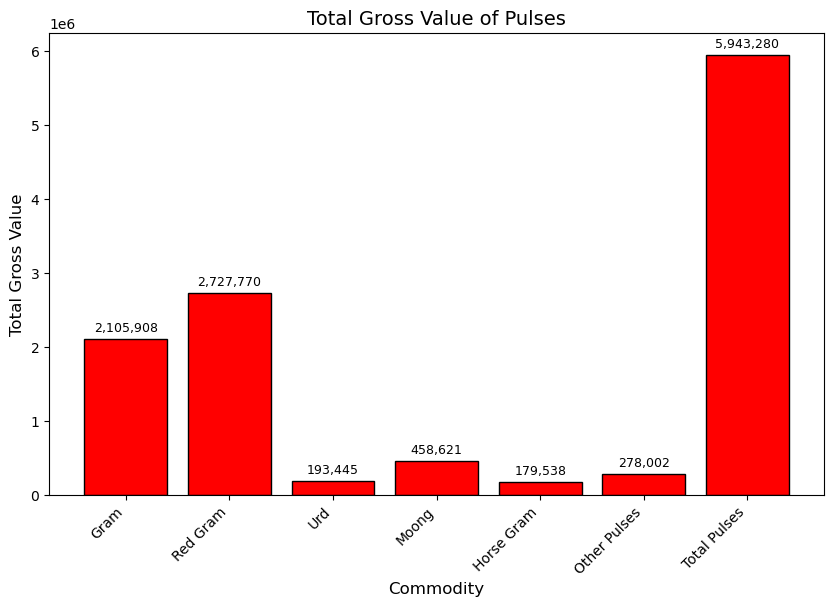

In [110]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(PulsesGV['Commodity'], PulsesGV['Total_Gross_Value'], color='red', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(PulsesGV['Total_Gross_Value']):
    plt.text(i, value + 0.01 * max(PulsesGV['Total_Gross_Value']), f'{value:,}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Gross Value', fontsize=12)
plt.title('Total Gross Value of Pulses', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## Mean percenatge of Pulses

In [111]:
# Calculate the percentage change for each year
Percent_change = Pulses.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

Pulses_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
Pulses_PCT


Overall Trend Direction: Increasing
Mean Percentage Change for Each Commodity:


Commodity   % change
0          Gram  10.228670
1      Red Gram  30.027485
2           Urd  38.379516
3         Moong  26.589830
4    Horse Gram  32.944585
5  Other Pulses  12.274494
6  Total Pulses  14.574666

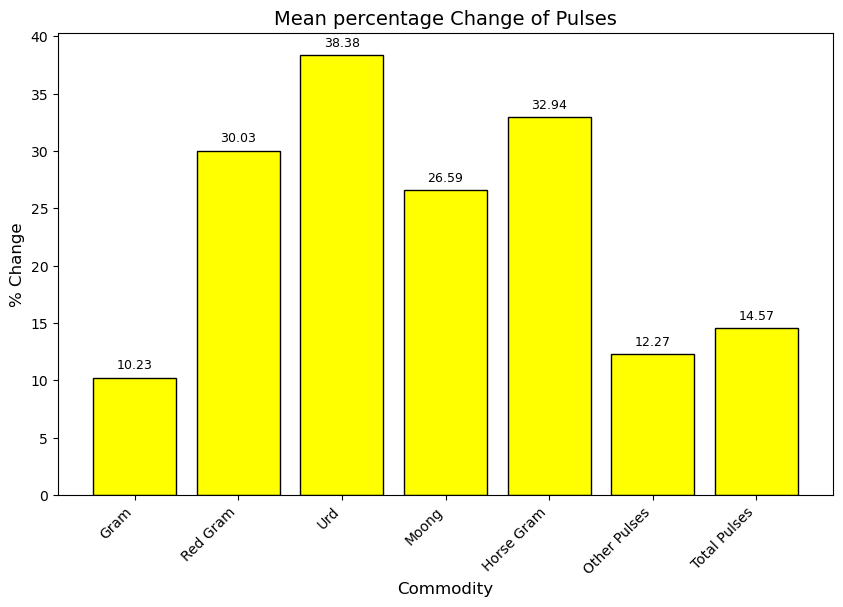

In [112]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Pulses_PCT['Commodity'], Pulses_PCT['% change'], color='yellow', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Pulses_PCT['% change']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.title('Mean percentage Change of Pulses', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## Gross Value Output Grpahical presentation

In [113]:
Pulses = Pulses.rename(columns={'Commodity': 'Years'})
Pulses.set_index('Years',inplace =True)
Pulses=Pulses.T

plt.figure(figsize=(16,8))
plt.plot(Pulses.index,Pulses["Gram"],marker='o',linestyle='-',color='b')

plt.xlabel('Years')
plt.ylabel('GVO')
plt.title('GVO of Gram')

plt.grid(True)
plt.show()

In [114]:
Pulses.columns

Index(['Gram', 'Red Gram', 'Urd', 'Moong', 'Horse Gram', 'Other Pulses',
       'Total Pulses'],
      dtype='object', name='Years')

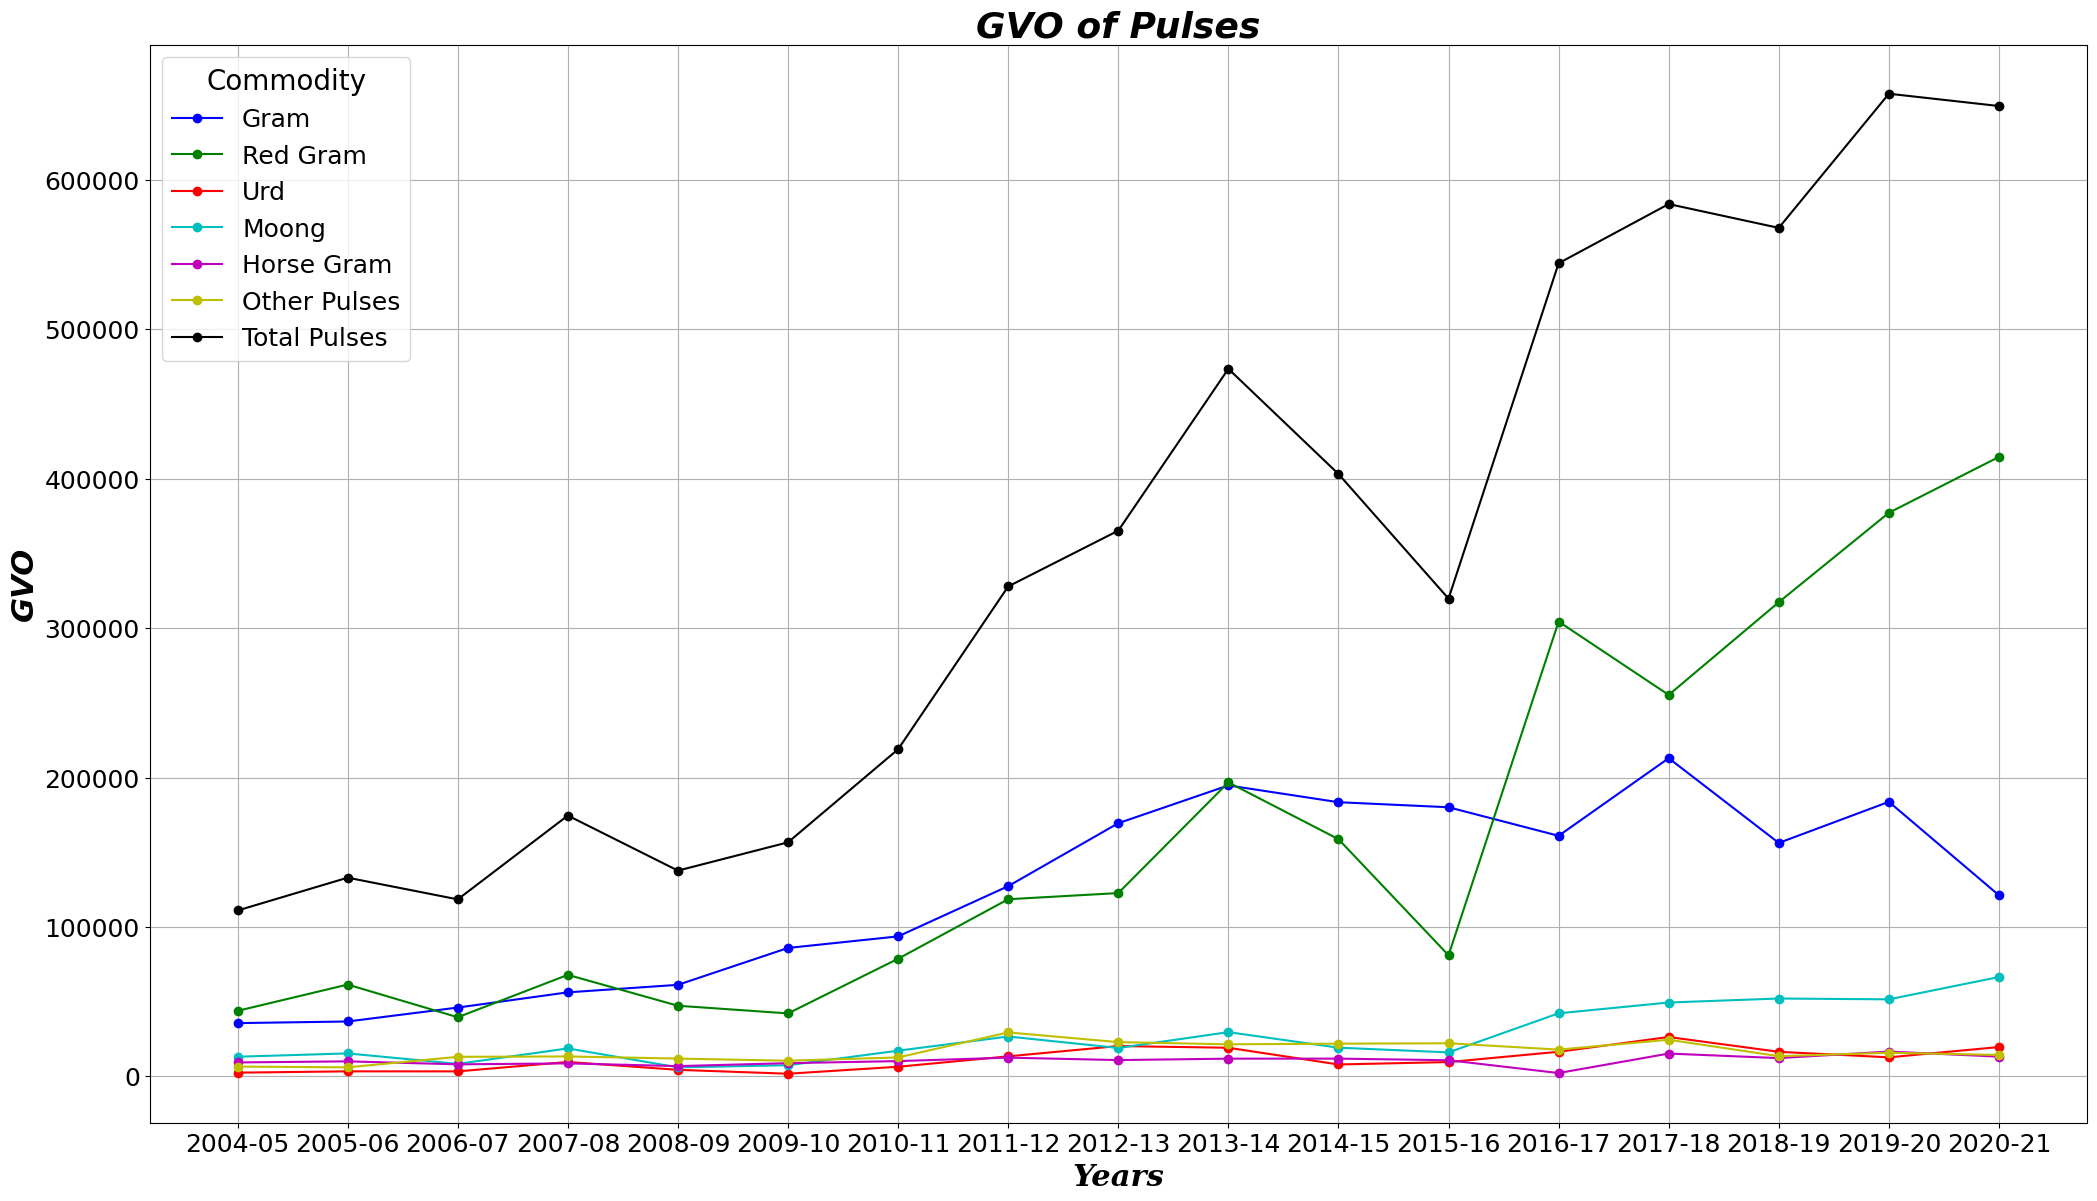

In [115]:
# Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Gram', 'Red Gram', 'Urd', 'Moong', 'Horse Gram', 'Other Pulses','Total Pulses']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for commodity, color in zip(commodities, colors):
    plt.plot(Pulses.index, Pulses[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Pulses', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

## Growth rate of Pulses

In [116]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in Pulses.columns:
    initial_value = Pulses[commodity].iloc[0]
    final_value = Pulses[commodity].iloc[-1]
    t = len(Pulses.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
    #print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Pulses_GR = pd.DataFrame(results)

# Display the results DataFrame
#print("\nResults DataFrame:")
print(Pulses_GR)

      Commodity Growth Rate
0          Gram       7.46%
1      Red Gram      14.13%
2           Urd      12.91%
3         Moong      10.00%
4    Horse Gram       2.06%
5  Other Pulses       4.72%
6  Total Pulses      10.95%


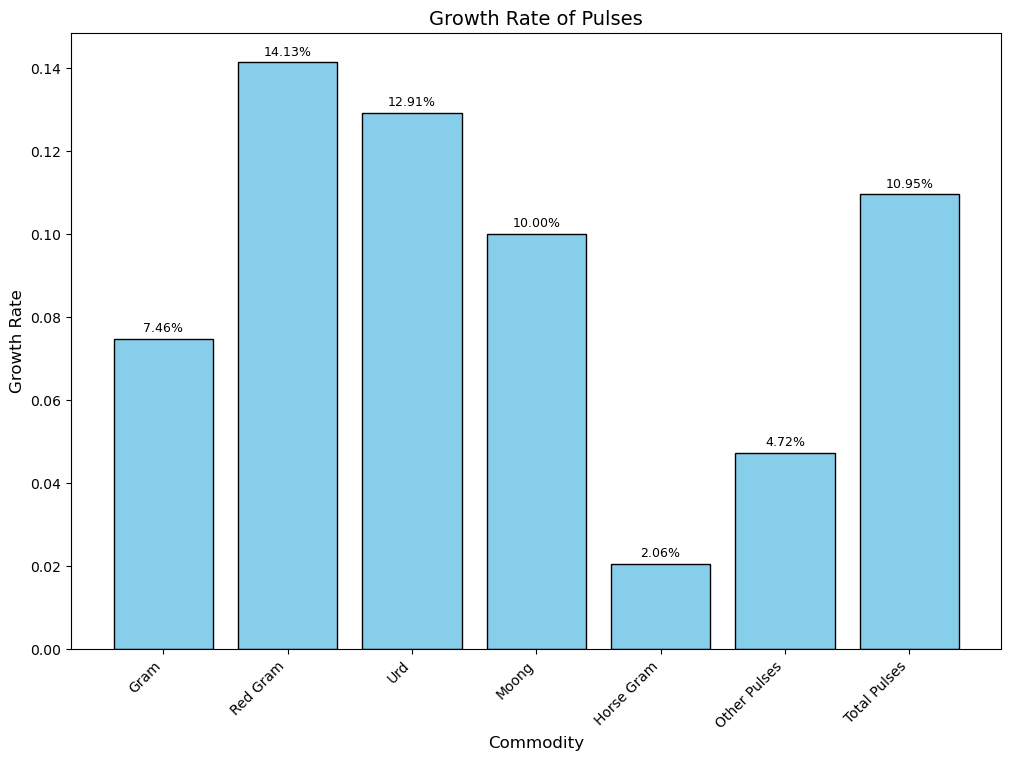

In [117]:
# Convert 'Growth Rate' to numeric values
Pulses_GR['Growth Rate'] = Pulses_GR['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(12, 8))
bars = plt.bar(Pulses_GR['Commodity'], Pulses_GR['Growth Rate'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Growth Rate of Pulses', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

## OILSEEDS 2004-11

In [118]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Linseed",78),
    ("Sesamum", 80),
    ("Rapeseed & Mustard",84),
    ("Castor",86),
    ("Coconut",88),
    ("Nigerseed", 90),
    ("Safflower",92),
    ("Sunflower",94),
    ("Soyabean",96),
    ("Other Oilseeds",100),
    ("Total Oilseeds",102)   
]

# Initializing an empty DataFrame to store the results
Oilseed04_11 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 36, 9)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", "Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Oilseed04_11 = Oilseed04_11.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Oilseed04_11)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\90100324.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed04_11 = Oilseed04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\90100324.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed04_11 = Oilseed04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\90100324.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed04_11 = Oilseed04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\90100324.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oil

             Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0              Linseed     522     762     653     946     889     695   
1              Sesamum   13977   21696   12226   11807    7000    7549   
2   Rapeseed & Mustard     503     452     251     361     427     375   
3               Castor    2397    3559    2191    2191    2550    1643   
4              Coconut   78812   81614   83084   83042  104823  155232   
5            Nigerseed    1048    1112     908    2053    1631    1616   
6            Safflower    6382    8043    7798    7745    7912    6793   
7            Sunflower   77462   97911   56364   72320   60727   36863   
8             Soyabean   16403   12331   16025   15207   15258   13583   
9       Other Oilseeds     114     140      27      93      93     213   
10      Total Oilseeds  311368  318967  229681  301803  262407  294675   

   2010-11 State/U.Ts  
0      662  Karnataka  
1    11959  Karnataka  
2      323  Karnataka  
3     2190  Kar

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\90100324.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed04_11 = Oilseed04_11.append(crop_KA, ignore_index=True)


In [119]:
gnut=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf",
            pages=82)

data_array = np.array(gnut)
gnut_new = data_array.reshape(1, 37, 9)
GNUT = pd.DataFrame(gnut_new[0], columns=["2004-05","2005-06","2006-07","2007-08","2008-09",
                                          "2009-10","2010-11","Unnamed: 0 ","State/U.Ts"])


column_to_drop = "Unnamed: 0 "
GNUT = GNUT.drop(column_to_drop, axis=1)

Gnut_KA = GNUT[GNUT['State/U.Ts']=='Karnataka']

Gnut_KA.reset_index(drop=True, inplace=True)


# Insert a new column named "Commodity" at position 1 (second column)
Gnut_KA.insert(0, "Commodity", ["Groundnut"])

Gnut_KA

Commodity   2004-05  2005-06  2006-07   2007-08  2008-09  2009-10  \
0  Groundnut  113749.0  91346.0  50154.0  106039.0  61098.0  70112.0   

    2010-11 State/U.Ts  
0  113692.0  Karnataka

In [120]:
Oilseed04_11 = pd.concat([Oilseed04_11, Gnut_KA], ignore_index=True)
Oilseed04_11

Commodity   2004-05  2005-06  2006-07   2007-08  2008-09  \
0              Linseed       522      762      653       946      889   
1              Sesamum     13977    21696    12226     11807     7000   
2   Rapeseed & Mustard       503      452      251       361      427   
3               Castor      2397     3559     2191      2191     2550   
4              Coconut     78812    81614    83084     83042   104823   
5            Nigerseed      1048     1112      908      2053     1631   
6            Safflower      6382     8043     7798      7745     7912   
7            Sunflower     77462    97911    56364     72320    60727   
8             Soyabean     16403    12331    16025     15207    15258   
9       Other Oilseeds       114      140       27        93       93   
10      Total Oilseeds    311368   318967   229681    301803   262407   
11           Groundnut  113749.0  91346.0  50154.0  106039.0  61098.0   

    2009-10   2010-11 State/U.Ts  
0       695       662  Karnataka  
1      7549     11959  Karnataka  
2       375       323  Karnataka  
3      1643      2190  Karnataka  
4    155232    213997  Karnataka  
5      1616      1230  Karnataka  
6      6793      5961  Karnataka  
7     36863     32131  Karnataka  
8     13583     24361  Karnataka  
9       213       255  Karnataka  
10   294675    406761  Karnataka  
11  70112.0  113692.0  Karnataka

In [121]:
Oilseed04_11=Oilseed04_11.drop("State/U.Ts",axis=1)

In [122]:
Oilseed04_11

Commodity   2004-05  2005-06  2006-07   2007-08  2008-09  \
0              Linseed       522      762      653       946      889   
1              Sesamum     13977    21696    12226     11807     7000   
2   Rapeseed & Mustard       503      452      251       361      427   
3               Castor      2397     3559     2191      2191     2550   
4              Coconut     78812    81614    83084     83042   104823   
5            Nigerseed      1048     1112      908      2053     1631   
6            Safflower      6382     8043     7798      7745     7912   
7            Sunflower     77462    97911    56364     72320    60727   
8             Soyabean     16403    12331    16025     15207    15258   
9       Other Oilseeds       114      140       27        93       93   
10      Total Oilseeds    311368   318967   229681    301803   262407   
11           Groundnut  113749.0  91346.0  50154.0  106039.0  61098.0   

    2009-10   2010-11  
0       695       662  
1      7549     11959  
2       375       323  
3      1643      2190  
4    155232    213997  
5      1616      1230  
6      6793      5961  
7     36863     32131  
8     13583     24361  
9       213       255  
10   294675    406761  
11  70112.0  113692.0

## OILSEEDS 2011-21

In [123]:
linseed=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=94)

# Converting data to a NumPy array
data_array = np.array(linseed)
linseed = data_array.reshape((38, 18))
linseed = pd.DataFrame(linseed, columns=["2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "Unnamed: 0", "2016-17",
                                                  "Unnamed: 1", "2017-18", "Unnamed: 2", "2018-19", "Unnamed: 3", "2019-20", "Unnamed: 4",
                                                  "2020-21", "Unnamed: 5", "S.No.", "State/U.Ts"])
linseed = linseed[linseed['State/U.Ts']=='Karnataka']

cols=["Unnamed: 0","Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4","Unnamed: 5", "S.No.", "State/U.Ts"]
linseed=linseed.drop(columns=cols)

linseed.reset_index(drop=True, inplace=True)

# Insert a new column named "Commodity" at position 1 (second column)
linseed.insert(0, "Commodity", ["Linseed"])

linseed

Commodity 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18 2018-19  \
0   Linseed   615.0   717.0   509.0   482.0   450.0   308.0   223.0   127.0   

  2019-20 2020-21  
0   158.0   138.0

In [124]:
safflower=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=108)

data_array = np.array(safflower)
safflower = data_array.reshape((38, 14))
safflower = pd.DataFrame(safflower, columns=["2011-12", "2012-13", "2013-14", "2014-15", "2015-16","2016-17",
                                                   "2017-18", "Unnamed: 0", "2018-19", "Unnamed: 1", "2019-20", 
                                                  "2020-21","S.No.", "State/U.Ts"])
safflower = safflower[safflower['State/U.Ts']=='Karnataka']

cols=["Unnamed: 0","Unnamed: 1", "S.No.", "State/U.Ts"]
safflower=safflower.drop(columns=cols)

safflower.reset_index(drop=True, inplace=True)

# Insert a new column named "Commodity" at position 1 (second column)
safflower.insert(0, "Commodity", ["Safflower"])

safflower

Commodity  2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18 2018-19  \
0  Safflower  10187.0  8731.0  9944.0  7790.0  8841.0  6302.0  8095.0  2900.0   

  2019-20 2020-21  
0  7355.0  5613.0

In [125]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Groundnut",98),
    #("Linseed",94),
    ("Sesamum", 96),
    ("Rapeseed & Mustard",100),
    ("Castor",102),
    ("Coconut",104),
    ("Nigerseed", 106),
    #("Safflower",108),
    ("Sunflower",110),
    ("Soyabean",112),
    ("Other Oilseeds",118),
    ("Total Oilseeds",92)   
]

# Initializing an empty DataFrame to store the results
Oilseed11_21 = pd.DataFrame()

# Iterate over the crops and pages
# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape((38, 12))
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new,columns=["2011-12", "2012-13", "2013-14", "2014-15", "2015-16",
                                "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", "S.No.", "State/U.Ts"])
    # Droping the "Unnamed: 0" column
    column_to_drop ="S.No."
    crop_df = crop_df.drop(columns=column_to_drop)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Oilseed11_21 = Oilseed11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Oilseed11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1306196653.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed11_21 = Oilseed11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1306196653.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed11_21 = Oilseed11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1306196653.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed11_21 = Oilseed11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1306196653.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

            Commodity   2011-12   2012-13   2013-14   2014-15   2015-16  \
0           Groundnut  154665.0  130172.0  186196.0  165358.0  130172.0   
1             Sesamum   11729.0   14690.0    9077.0    8686.0    9217.0   
2  Rapeseed & Mustard     368.0     368.0     368.0     164.0     110.0   
3              Castor    4257.0    2128.0    3345.0    2202.0    1520.0   
4             Coconut  264236.0  260259.0  204862.0  235625.0  221108.0   
5           Nigerseed    2856.0    1224.0    1275.0    1177.0     816.0   
6           Sunflower   57691.0   78400.0   74833.0   60846.0   44834.0   
7            Soyabean   39809.0   41198.0   62528.0   43763.0   32403.0   
8      Other Oilseeds      66.0     510.0      79.0      10.0       9.0   
9      Total Oilseeds  546478.0  538400.0  553017.0  526102.0  449480.0   

    2016-17   2017-18   2018-19   2019-20   2020-21 State/U.Ts  
0  137802.0  182115.0  128848.0  165702.0  237460.0  Karnataka  
1    8575.0    9131.0    6065.0    9623.0   

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\1306196653.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Oilseed11_21 = Oilseed11_21.append(crop_KA, ignore_index=True)


In [126]:
Oilseed11_21=pd.concat([Oilseed11_21,linseed,safflower],ignore_index=True)
Oilseed11_21

Commodity   2011-12   2012-13   2013-14   2014-15   2015-16  \
0            Groundnut  154665.0  130172.0  186196.0  165358.0  130172.0   
1              Sesamum   11729.0   14690.0    9077.0    8686.0    9217.0   
2   Rapeseed & Mustard     368.0     368.0     368.0     164.0     110.0   
3               Castor    4257.0    2128.0    3345.0    2202.0    1520.0   
4              Coconut  264236.0  260259.0  204862.0  235625.0  221108.0   
5            Nigerseed    2856.0    1224.0    1275.0    1177.0     816.0   
6            Sunflower   57691.0   78400.0   74833.0   60846.0   44834.0   
7             Soyabean   39809.0   41198.0   62528.0   43763.0   32403.0   
8       Other Oilseeds      66.0     510.0      79.0      10.0       9.0   
9       Total Oilseeds  546478.0  538400.0  553017.0  526102.0  449480.0   
10             Linseed     615.0     717.0     509.0     482.0     450.0   
11           Safflower   10187.0    8731.0    9944.0    7790.0    8841.0   

     2016-17   2017-18   2018-19   2019-20   2020-21 State/U.Ts  
0   137802.0  182115.0  128848.0  165702.0  237460.0  Karnataka  
1     8575.0    9131.0    6065.0    9623.0    7781.0  Karnataka  
2      309.0     124.0     221.0       0.0      31.0  Karnataka  
3     1436.0    1441.0     524.0    1180.0    1090.0  Karnataka  
4   204827.0  211501.0  259038.0  258361.0  295155.0  Karnataka  
5      426.0     356.0      81.0     101.0     101.0  Karnataka  
6    29124.0   31636.0   31231.0   30590.0   31870.0  Karnataka  
7    54919.0   58534.0   59567.0   87618.0   87241.0  Karnataka  
8       69.0      80.0      73.0      75.0      89.0  Karnataka  
9   444098.0  503235.0  488675.0  560762.0  666569.0  Karnataka  
10     308.0     223.0     127.0     158.0     138.0        NaN  
11    6302.0    8095.0    2900.0    7355.0    5613.0        NaN

In [127]:
Oilseed11_21=Oilseed11_21.drop("State/U.Ts",axis=1)
Oilseed11_21

Commodity   2011-12   2012-13   2013-14   2014-15   2015-16  \
0            Groundnut  154665.0  130172.0  186196.0  165358.0  130172.0   
1              Sesamum   11729.0   14690.0    9077.0    8686.0    9217.0   
2   Rapeseed & Mustard     368.0     368.0     368.0     164.0     110.0   
3               Castor    4257.0    2128.0    3345.0    2202.0    1520.0   
4              Coconut  264236.0  260259.0  204862.0  235625.0  221108.0   
5            Nigerseed    2856.0    1224.0    1275.0    1177.0     816.0   
6            Sunflower   57691.0   78400.0   74833.0   60846.0   44834.0   
7             Soyabean   39809.0   41198.0   62528.0   43763.0   32403.0   
8       Other Oilseeds      66.0     510.0      79.0      10.0       9.0   
9       Total Oilseeds  546478.0  538400.0  553017.0  526102.0  449480.0   
10             Linseed     615.0     717.0     509.0     482.0     450.0   
11           Safflower   10187.0    8731.0    9944.0    7790.0    8841.0   

     2016-17   2017-18   2018-19   2019-20   2020-21  
0   137802.0  182115.0  128848.0  165702.0  237460.0  
1     8575.0    9131.0    6065.0    9623.0    7781.0  
2      309.0     124.0     221.0       0.0      31.0  
3     1436.0    1441.0     524.0    1180.0    1090.0  
4   204827.0  211501.0  259038.0  258361.0  295155.0  
5      426.0     356.0      81.0     101.0     101.0  
6    29124.0   31636.0   31231.0   30590.0   31870.0  
7    54919.0   58534.0   59567.0   87618.0   87241.0  
8       69.0      80.0      73.0      75.0      89.0  
9   444098.0  503235.0  488675.0  560762.0  666569.0  
10     308.0     223.0     127.0     158.0     138.0  
11    6302.0    8095.0    2900.0    7355.0    5613.0

## Merging Oilseeds 2004-11 & Oilseeds 2011-21

In [128]:
Oilseeds=pd.merge(Oilseed04_11,Oilseed11_21,on="Commodity",how="outer")
Oilseeds

Commodity   2004-05  2005-06  2006-07   2007-08  2008-09  \
0              Linseed       522      762      653       946      889   
1              Sesamum     13977    21696    12226     11807     7000   
2   Rapeseed & Mustard       503      452      251       361      427   
3               Castor      2397     3559     2191      2191     2550   
4              Coconut     78812    81614    83084     83042   104823   
5            Nigerseed      1048     1112      908      2053     1631   
6            Safflower      6382     8043     7798      7745     7912   
7            Sunflower     77462    97911    56364     72320    60727   
8             Soyabean     16403    12331    16025     15207    15258   
9       Other Oilseeds       114      140       27        93       93   
10      Total Oilseeds    311368   318967   229681    301803   262407   
11           Groundnut  113749.0  91346.0  50154.0  106039.0  61098.0   

    2009-10   2010-11   2011-12   2012-13   2013-14   2014-15   2015-16  \
0       695       662     615.0     717.0     509.0     482.0     450.0   
1      7549     11959   11729.0   14690.0    9077.0    8686.0    9217.0   
2       375       323     368.0     368.0     368.0     164.0     110.0   
3      1643      2190    4257.0    2128.0    3345.0    2202.0    1520.0   
4    155232    213997  264236.0  260259.0  204862.0  235625.0  221108.0   
5      1616      1230    2856.0    1224.0    1275.0    1177.0     816.0   
6      6793      5961   10187.0    8731.0    9944.0    7790.0    8841.0   
7     36863     32131   57691.0   78400.0   74833.0   60846.0   44834.0   
8     13583     24361   39809.0   41198.0   62528.0   43763.0   32403.0   
9       213       255      66.0     510.0      79.0      10.0       9.0   
10   294675    406761  546478.0  538400.0  553017.0  526102.0  449480.0   
11  70112.0  113692.0  154665.0  130172.0  186196.0  165358.0  130172.0   

     2016-17   2017-18   2018-19   2019-20   2020-21  
0      308.0     223.0     127.0     158.0     138.0  
1     8575.0    9131.0    6065.0    9623.0    7781.0  
2      309.0     124.0     221.0       0.0      31.0  
3     1436.0    1441.0     524.0    1180.0    1090.0  
4   204827.0  211501.0  259038.0  258361.0  295155.0  
5      426.0     356.0      81.0     101.0     101.0  
6     6302.0    8095.0    2900.0    7355.0    5613.0  
7    29124.0   31636.0   31231.0   30590.0   31870.0  
8    54919.0   58534.0   59567.0   87618.0   87241.0  
9       69.0      80.0      73.0      75.0      89.0  
10  444098.0  503235.0  488675.0  560762.0  666569.0  
11  137802.0  182115.0  128848.0  165702.0  237460.0

In [129]:
Oilseeds.dtypes

Commodity    object
2004-05      object
2005-06      object
2006-07      object
2007-08      object
2008-09      object
2009-10      object
2010-11      object
2011-12      object
2012-13      object
2013-14      object
2014-15      object
2015-16      object
2016-17      object
2017-18      object
2018-19      object
2019-20      object
2020-21      object
dtype: object

In [130]:
Oilseeds["2004-05"]=Oilseeds["2004-05"].astype(int)
Oilseeds["2005-06"]=Oilseeds["2005-06"].astype(int)
Oilseeds["2006-07"]=Oilseeds["2006-07"].astype(int)
Oilseeds["2007-08"]=Oilseeds["2007-08"].astype(int)
Oilseeds["2008-09"]=Oilseeds["2008-09"].astype(int)
Oilseeds["2009-10"]=Oilseeds["2009-10"].astype(int)
Oilseeds["2010-11"]=Oilseeds["2010-11"].astype(int)
Oilseeds["2011-12"]=Oilseeds["2011-12"].astype(int)
Oilseeds["2012-13"]=Oilseeds["2012-13"].astype(int)
Oilseeds["2013-14"]=Oilseeds["2013-14"].astype(int)
Oilseeds["2014-15"]=Oilseeds["2014-15"].astype(int)
Oilseeds["2015-16"]=Oilseeds["2015-16"].astype(int)
Oilseeds["2016-17"]=Oilseeds["2016-17"].astype(int)
Oilseeds["2017-18"]=Oilseeds["2017-18"].astype(int)
Oilseeds["2018-19"]=Oilseeds["2018-19"].astype(int)
Oilseeds["2019-20"]=Oilseeds["2019-20"].astype(int)
Oilseeds["2020-21"]=Oilseeds["2020-21"].astype(int)

# Oilseeds CSV File

In [131]:
#Oilseeds.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Oilseeds.csv",index=False)
Oilseeds=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Oilseeds.csv")
Oilseeds

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0              Linseed      522      762      653      946      889      695   
1              Sesamum    13977    21696    12226    11807     7000     7549   
2   Rapeseed & Mustard      503      452      251      361      427      375   
3               Castor     2397     3559     2191     2191     2550     1643   
4              Coconut    78812    81614    83084    83042   104823   155232   
5            Nigerseed     1048     1112      908     2053     1631     1616   
6            Safflower     6382     8043     7798     7745     7912     6793   
7            Sunflower    77462    97911    56364    72320    60727    36863   
8             Soyabean    16403    12331    16025    15207    15258    13583   
9       Other Oilseeds      114      140       27       93       93      213   
10      Total Oilseeds   311368   318967   229681   301803   262407   294675   
11           Groundnut   113749    91346    50154   106039    61098    70112   

    2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0       662      615      717      509      482      450      308      223   
1     11959    11729    14690     9077     8686     9217     8575     9131   
2       323      368      368      368      164      110      309      124   
3      2190     4257     2128     3345     2202     1520     1436     1441   
4    213997   264236   260259   204862   235625   221108   204827   211501   
5      1230     2856     1224     1275     1177      816      426      356   
6      5961    10187     8731     9944     7790     8841     6302     8095   
7     32131    57691    78400    74833    60846    44834    29124    31636   
8     24361    39809    41198    62528    43763    32403    54919    58534   
9       255       66      510       79       10        9       69       80   
10   406761   546478   538400   553017   526102   449480   444098   503235   
11   113692   154665   130172   186196   165358   130172   137802   182115   

    2018-19  2019-20  2020-21  
0       127      158      138  
1      6065     9623     7781  
2       221        0       31  
3       524     1180     1090  
4    259038   258361   295155  
5        81      101      101  
6      2900     7355     5613  
7     31231    30590    31870  
8     59567    87618    87241  
9        73       75       89  
10   488675   560762   666569  
11   128848   165702   237460

## Gross value of Oilseeds

In [132]:
OilseedsGV=pd.DataFrame()

# Create OilseedsGV DataFrame with 'Commodity' and 'Gross_value' columns
OilseedsGV = Oilseeds[['Commodity']].copy()
OilseedsGV['Total_Gross_Value'] = Oilseeds.iloc[:, 1:].sum(axis=1)

# Find low and high-value crops
low_crop = Oilseeds.loc[OilseedsGV['Total_Gross_Value'].idxmin(), 'Commodity']
low_value = OilseedsGV['Total_Gross_Value'].min()

high_crop = Oilseeds.loc[OilseedsGV['Total_Gross_Value'].idxmax(), 'Commodity']
high_value = OilseedsGV['Total_Gross_Value'].max()

# Display the results
print(f"Low-value crop: {low_crop} (Total Gross Value: {low_value})")
print(f"High-value crop: {high_crop} (Total Gross Value: {high_value})")

# Display OilseedsGV DataFrame
#print("OilseedsGV DataFrame:")
OilseedsGV

Low-value crop: Other Oilseeds (Total Gross Value: 1995)
High-value crop: Total Oilseeds (Total Gross Value: 7402478)


Commodity  Total_Gross_Value
0              Linseed               8856
1              Sesamum             180788
2   Rapeseed & Mustard               4755
3               Castor              35844
4              Coconut            3215576
5            Nigerseed              18011
6            Safflower             126392
7            Sunflower             904833
8             Soyabean             680748
9       Other Oilseeds               1995
10      Total Oilseeds            7402478
11           Groundnut            2224680

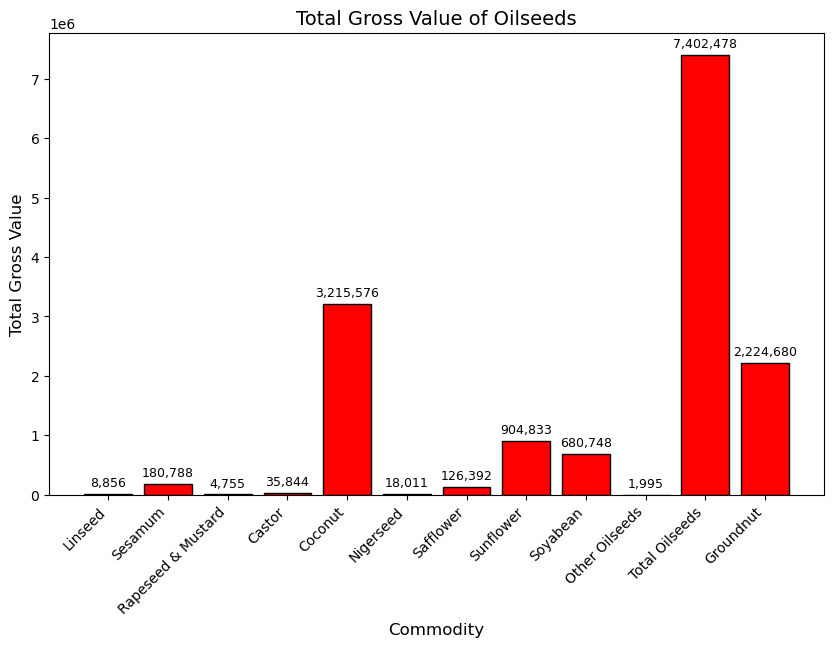

In [133]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(OilseedsGV['Commodity'], OilseedsGV['Total_Gross_Value'], color='red', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(OilseedsGV['Total_Gross_Value']):
    plt.text(i, value + 0.01 * max(OilseedsGV['Total_Gross_Value']), f'{value:,}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Gross Value', fontsize=12)
plt.title('Total Gross Value of Oilseeds', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## Mean Percentage Change of Oilseeds

In [134]:
# Calculate the percentage change for each year
Percent_change = Oilseeds.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

Oilseeds_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
Oilseeds_PCT


Overall Trend Direction: Increasing
Mean Percentage Change for Each Commodity:


Commodity   % change
0              Linseed  -4.873259
1              Sesamum   1.630011
2   Rapeseed & Mustard        inf
3               Castor   6.832343
4              Coconut   9.960819
5            Nigerseed  -0.463666
6            Safflower   7.867757
7            Sunflower  -0.972742
8             Soyabean  15.996132
9       Other Oilseeds  90.456930
10      Total Oilseeds   6.383100
11           Groundnut  12.038435

posx and posy should be finite values
posx and posy should be finite values


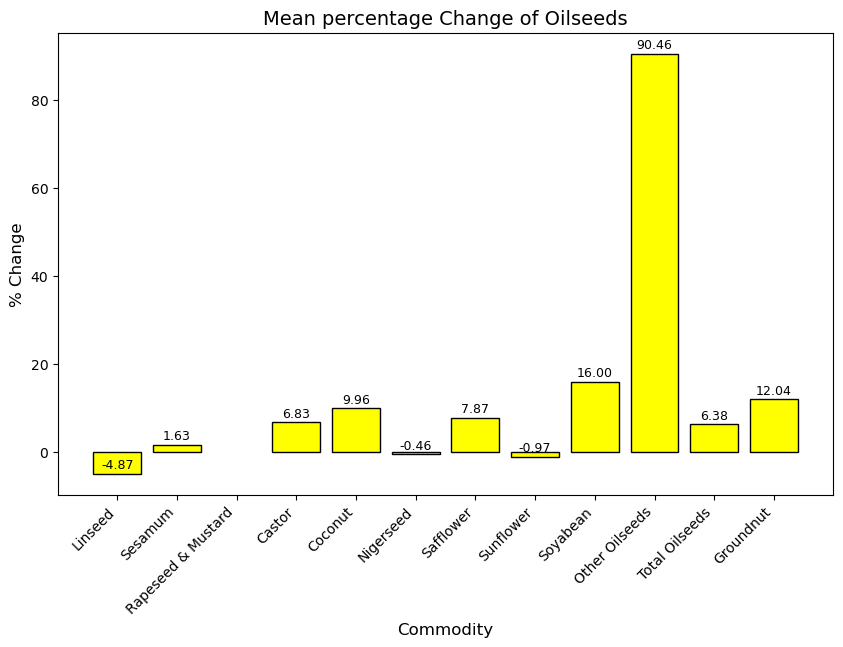

In [135]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Oilseeds_PCT['Commodity'], Oilseeds_PCT['% change'], color='yellow', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Oilseeds_PCT['% change']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.title('Mean percentage Change of Oilseeds', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## GVO Graphical presentation

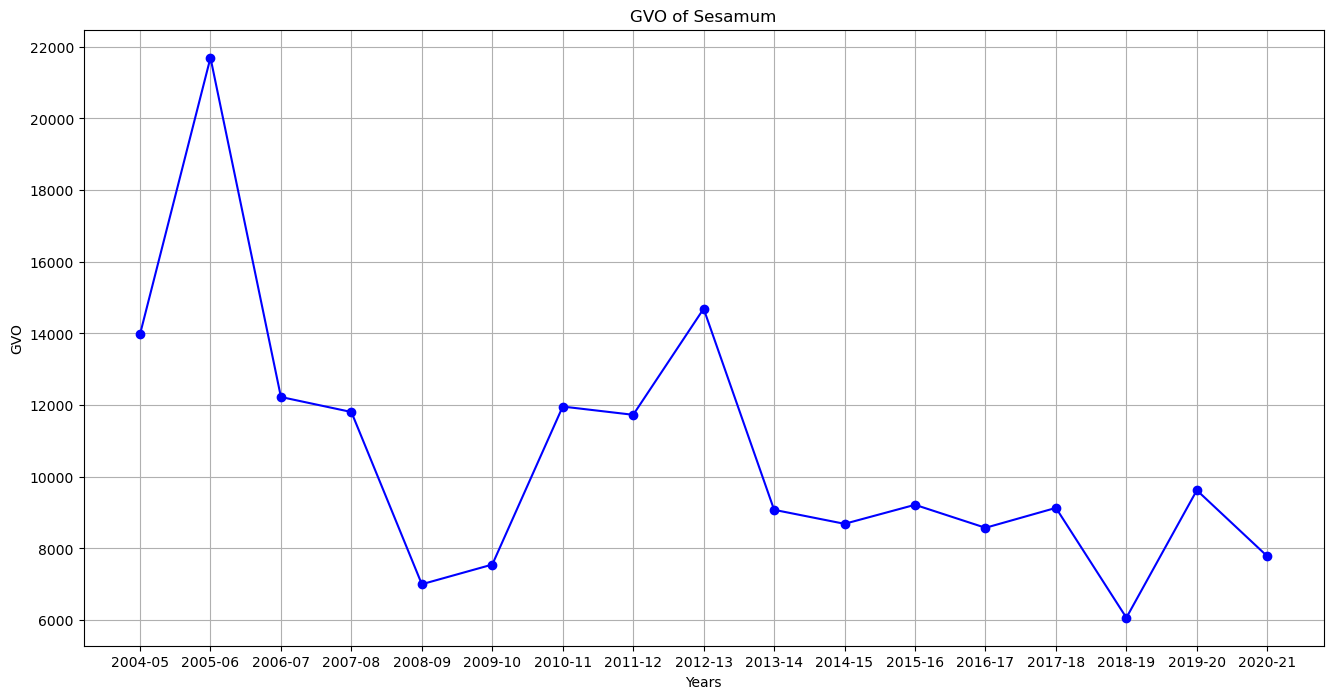

In [136]:
Oilseeds = Oilseeds.rename(columns={'Commodity': 'Years'})
Oilseeds.set_index('Years',inplace =True)
Oilseeds=Oilseeds.T

plt.figure(figsize=(16,8))
plt.plot(Oilseeds.index,Oilseeds["Sesamum"],marker='o',linestyle='-',color='b')

plt.xlabel('Years')
plt.ylabel('GVO')
plt.title('GVO of Sesamum')

plt.grid(True)
plt.show()

In [137]:
Oilseeds.columns

Index(['Linseed', 'Sesamum', 'Rapeseed & Mustard', 'Castor', 'Coconut',
       'Nigerseed', 'Safflower', 'Sunflower', 'Soyabean', 'Other Oilseeds',
       'Total Oilseeds', 'Groundnut'],
      dtype='object', name='Years')

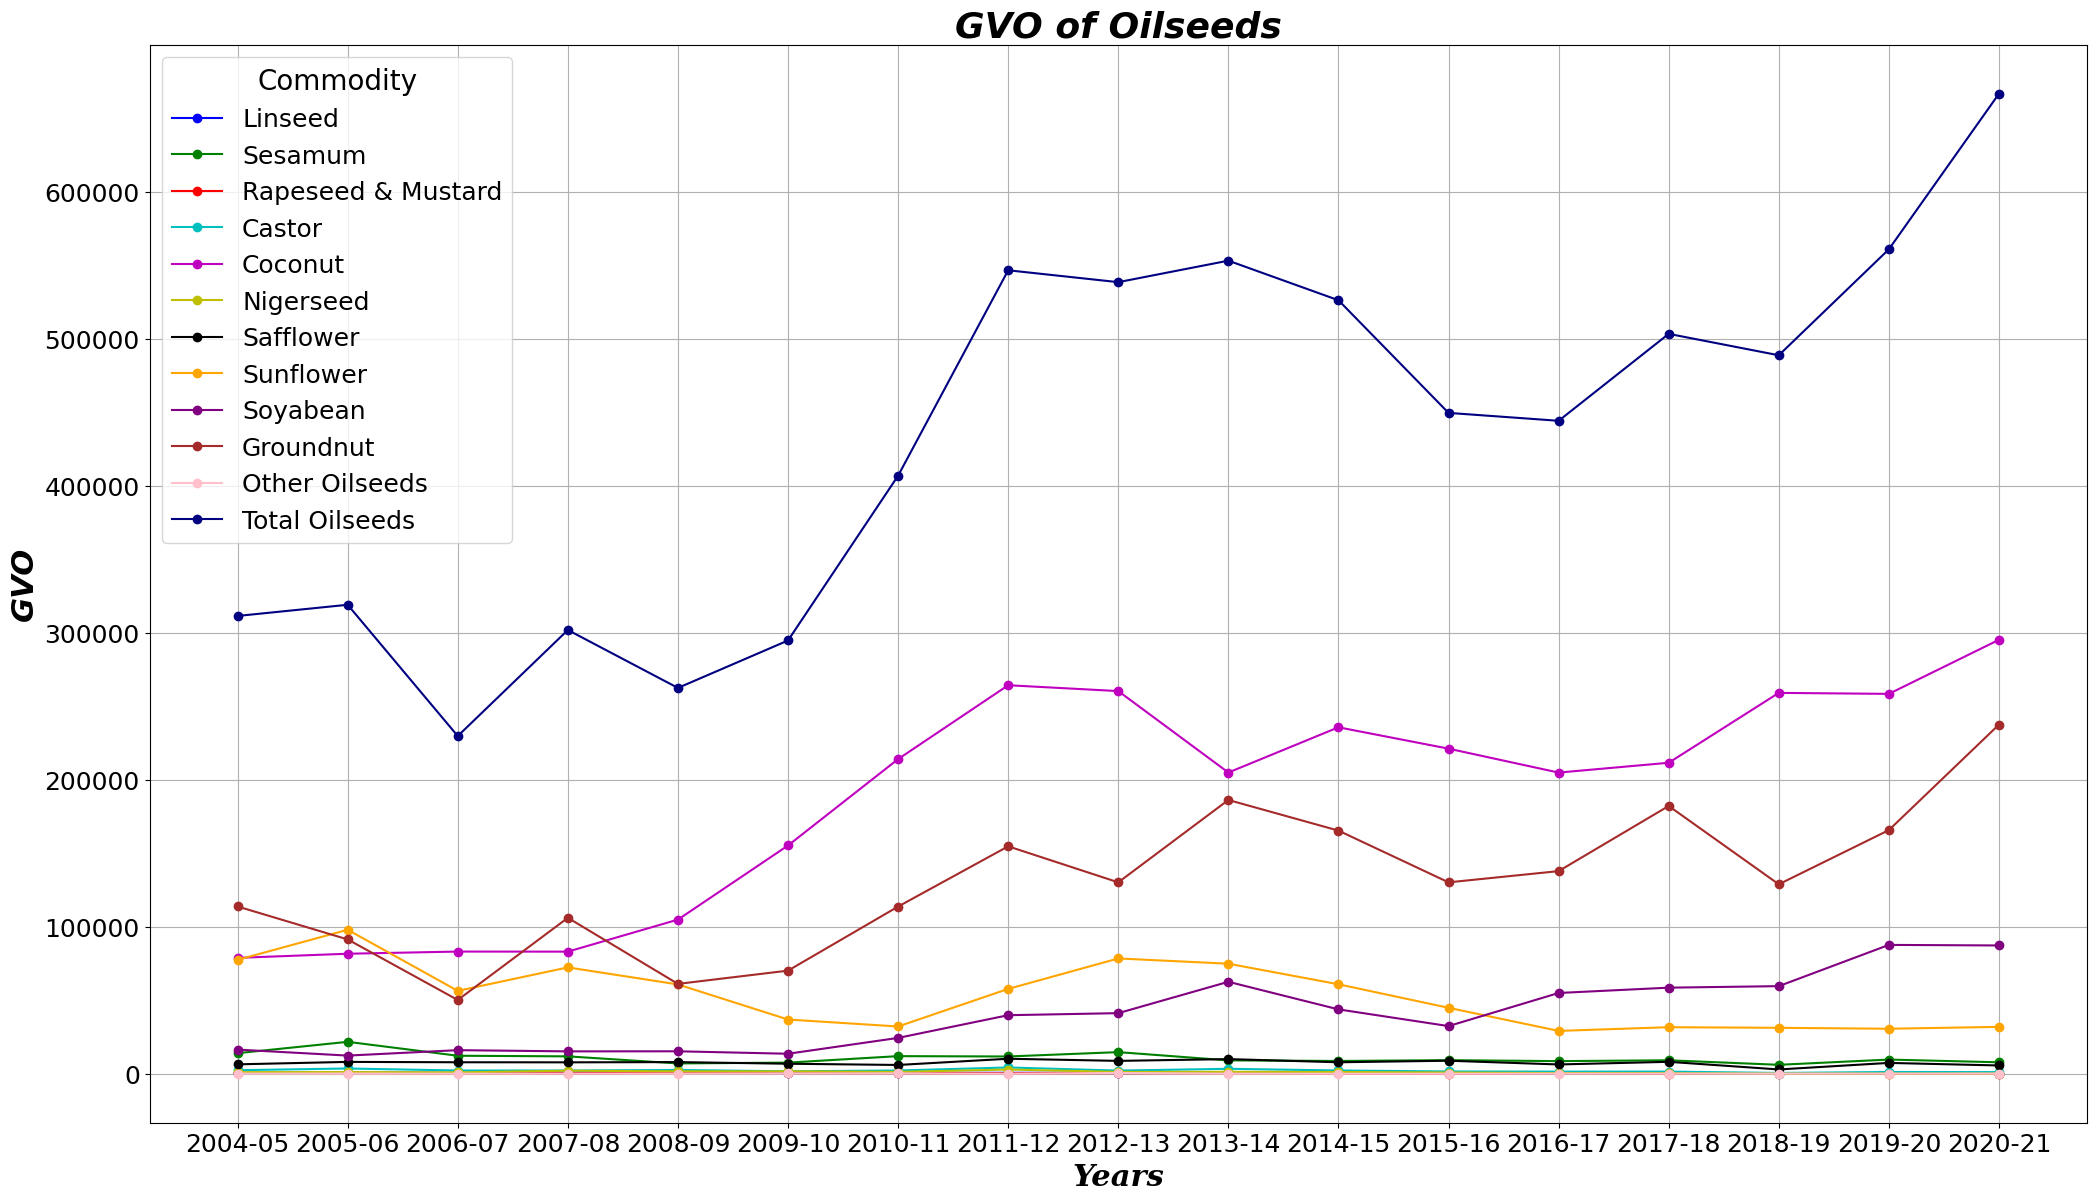

In [138]:
# Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Linseed', 'Sesamum', 'Rapeseed & Mustard', 'Castor', 'Coconut','Nigerseed', 'Safflower', 'Sunflower', 
               'Soyabean','Groundnut', 'Other Oilseeds', 'Total Oilseeds']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','orange', 'purple', 'brown', 'pink','navy']

for commodity, color in zip(commodities, colors):
    plt.plot(Oilseeds.index, Oilseeds[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Oilseeds', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

## Growth Rate of Oilseeds

In [139]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in Oilseeds.columns:
    initial_value = Oilseeds[commodity].iloc[0]
    final_value = Oilseeds[commodity].iloc[-1]
    t = len(Oilseeds.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
    #print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Oilseeds_GR = pd.DataFrame(results)

# Display the results DataFrame
#print("\nResults DataFrame:")
print(Oilseeds_GR)

             Commodity Growth Rate
0              Linseed      -7.53%
1              Sesamum      -3.39%
2   Rapeseed & Mustard     -15.12%
3               Castor      -4.53%
4              Coconut       8.08%
5            Nigerseed     -12.86%
6            Safflower      -0.75%
7            Sunflower      -5.09%
8             Soyabean      10.33%
9       Other Oilseeds      -1.45%
10      Total Oilseeds       4.58%
11           Groundnut       4.42%


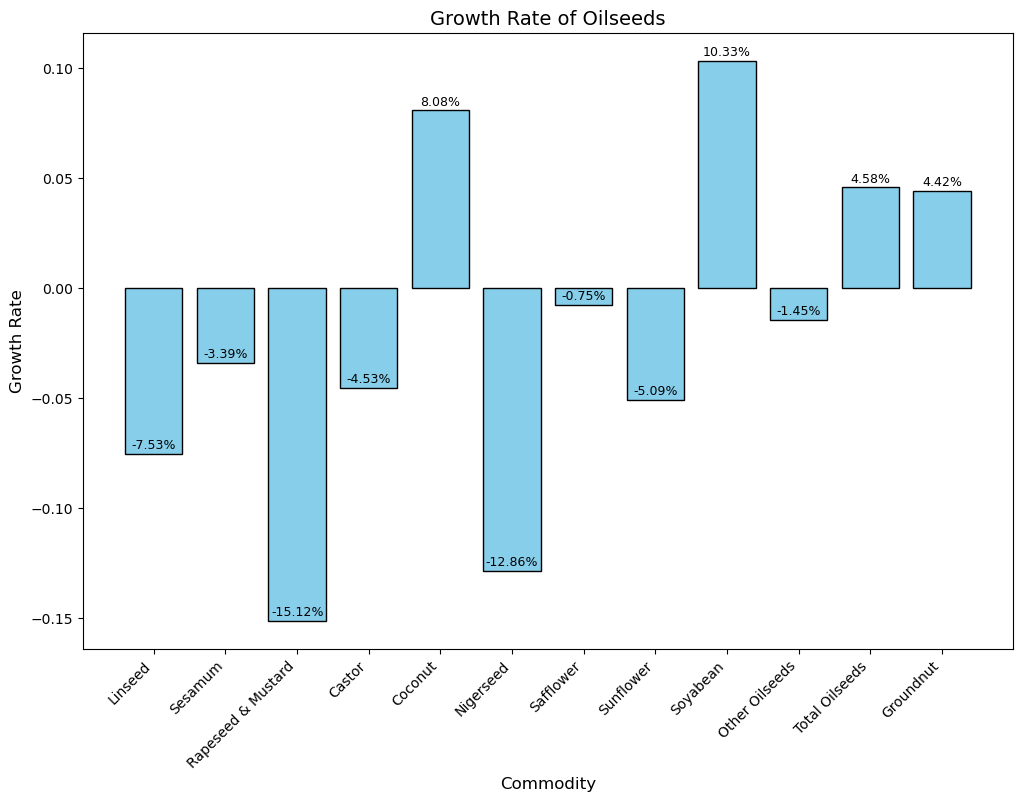

In [140]:
# Convert 'Growth Rate' to numeric values
Oilseeds_GR['Growth Rate'] = Oilseeds_GR['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(12, 8))
bars = plt.bar(Oilseeds_GR['Commodity'], Oilseeds_GR['Growth Rate'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Growth Rate of Oilseeds', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

## COMMERCIAL CROPS 2004-11

In [141]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Sugarcane",104),
    ("Gur", 106),
    ("Cotton",112),
    ("Tea",126),
    ("Coffee",128),
    ("Tobacco", 130),
    ("Cocoa",140),
    ("Rubber",252),
    ("Mulberry",264)
]

# Initializing an empty DataFrame to store the results
Commercial_crops04_11 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 36, 9)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", "Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Commercial_crops04_11 = Commercial_crops04_11.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Commercial_crops04_11)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2676591085.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops04_11 = Commercial_crops04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2676591085.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops04_11 = Commercial_crops04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2676591085.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops04_11 = Commercial_crops04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2676591085.py:43: FutureWarning: The frame.append method is deprecated and will be removed fro

   Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0  Sugarcane  121401  207283  240575  273781  256008  273127  407948   
1        Gur   38503       0   12988       0       0   97841   15318   
2     Cotton   54855   51428   47110   61914   72472   61932  106979   
3        Tea    1080    1018    1031     980    1148    1148    1148   
4     Coffee  156342  156814  162187  150812  144738  161931  166745   
5    Tobacco   45412   42944   31169   32234   36968   61228   92179   
6      Cocoa    1634     335     322     189     352     852     243   
7     Rubber    8045    8301    8983    9164   11699   11866   13206   
8   Mulberry    3542    3542    4568    4321    4196    4008    3144   

  State/U.Ts  
0  Karnataka  
1  Karnataka  
2  Karnataka  
3  Karnataka  
4  Karnataka  
5  Karnataka  
6  Karnataka  
7  Karnataka  
8  Karnataka  


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2676591085.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops04_11 = Commercial_crops04_11.append(crop_KA, ignore_index=True)


In [142]:
Commercial_crops04_11=Commercial_crops04_11.drop("State/U.Ts",axis=1)
Commercial_crops04_11

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11
0  Sugarcane  121401  207283  240575  273781  256008  273127  407948
1        Gur   38503       0   12988       0       0   97841   15318
2     Cotton   54855   51428   47110   61914   72472   61932  106979
3        Tea    1080    1018    1031     980    1148    1148    1148
4     Coffee  156342  156814  162187  150812  144738  161931  166745
5    Tobacco   45412   42944   31169   32234   36968   61228   92179
6      Cocoa    1634     335     322     189     352     852     243
7     Rubber    8045    8301    8983    9164   11699   11866   13206
8   Mulberry    3542    3542    4568    4321    4196    4008    3144

## COMMERCIAL CROP 2011-21

In [143]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Sugarcane",122),
    ("Gur", 124),
    ("Cotton",132),
    #("Tea",146),
    ("Coffee",148),
    ("Tobacco", 150),
    #("Tobacco stem",152),
    ("Cocoa",162),
    #("Rubber",312),
    #("Mulberry",324)
]

# Initializing an empty DataFrame to store the results
Commercial_crops11_21 = pd.DataFrame()

# Iterate over the crops and pages
# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape((38, 12))
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new,columns=["2011-12", "2012-13", "2013-14", "2014-15", "2015-16",
                                "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", "S.No.", "State/U.Ts"])
    # Droping the "Unnamed: 0" column
    column_to_drop ="S.No."
    crop_df = crop_df.drop(columns=column_to_drop)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Commercial_crops11_21 = Commercial_crops11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Commercial_crops11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3226526158.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops11_21 = Commercial_crops11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3226526158.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops11_21 = Commercial_crops11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3226526158.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops11_21 = Commercial_crops11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3226526158.py:45: FutureWarning: The frame.append method is deprecated and will be removed fro

   Commodity   2011-12   2012-13   2013-14   2014-15   2015-16   2016-17  \
0  Sugarcane  580931.0  549201.0  582600.0  672837.0  581505.0  355629.0   
1        Gur   23054.0       0.0       0.0       0.0       0.0   96634.0   
2     Cotton  249927.0  245555.0  366865.0  452631.0  225411.0  197618.0   
3     Coffee  550297.0  573267.0  525645.0  580750.0  626292.0  551255.0   
4    Tobacco   63658.0   40440.0   54032.0   62413.0   43426.0   59587.0   
5      Cocoa     754.0     784.0     807.0     754.0     829.0     912.0   

    2017-18   2018-19   2019-20   2020-21 State/U.Ts  
0  478548.0  651811.0  586402.0  653655.0  Karnataka  
1       0.0       0.0     652.0       0.0  Karnataka  
2  360800.0  273926.0  455891.0  453958.0  Karnataka  
3  553534.0  546686.0  506584.0  586402.0  Karnataka  
4   64518.0   31652.0   50097.0   35542.0  Karnataka  
5     958.0    1259.0    1335.0    1402.0  Karnataka  


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3226526158.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Commercial_crops11_21 = Commercial_crops11_21.append(crop_KA, ignore_index=True)


In [144]:
Commercial_crops11_21=Commercial_crops11_21.drop("State/U.Ts",axis=1)

In [145]:
tea=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=146)
data_array = np.array(tea)
tea_new = data_array.reshape(1,38,22)
Tea = pd.DataFrame(tea_new[0], columns=["2011-12","Unnamed: 0","2012-13","Unnamed: 1","2013-14","Unnamed: 2",
                                            "2014-15","Unnamed: 3","2015-16","Unnamed: 4","2016-17","... ","2017-18","Unnamed: 6",
                                            "2018-19","Unnamed: 7","2019-20","Unnamed: 8","2020-21","Unnamed: 9","S.No.","State/U.Ts"])



# Replace extra spaces in column names
Tea.columns = Tea.columns.str.strip()

# Correct the list of column names
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',"...",'Unnamed: 6', 'Unnamed: 7',"Unnamed: 8","Unnamed: 9"]

# Drop the specified columns
Tea = Tea.drop(columns=columns_to_drop)


Tea = Tea[Tea['State/U.Ts']=='Karnataka']

Tea.reset_index(drop=True, inplace=True)


# Insert a new column named "Commodity" at position 1 (second column)
Tea.insert(0, "Commodity", ["Tea"])

col=["State/U.Ts","S.No."]
Tea=Tea.drop(columns=col)

Tea

Commodity 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18 2018-19  \
0       Tea  1902.0  2161.0  1983.0  2427.0  2326.0  1837.0  2326.0  1837.0   

  2019-20 2020-21  
0  1750.0  1923.0

In [146]:
rubber=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=312)
data_array = np.array(rubber)
rubber_new = data_array.reshape(1,38,13)
rubber = pd.DataFrame(rubber_new[0], columns=["2011-12", "2012-13", "2013-14", "2014-15","2015-16","2016-17","2017-18", 
                                        "2018-19","2019-20","Unnamed: 0","2020-21","S.No. ","State/U.Ts"])

# Replace extra spaces in column names
rubber.columns = rubber.columns.str.strip()

# Correct the list of column names
columns_to_drop = ['Unnamed: 0']

# Drop the specified columns
rubber = rubber.drop(columns=columns_to_drop)


rubber = rubber[rubber['State/U.Ts']=='Karnataka']

rubber.reset_index(drop=True, inplace=True)


# Insert a new column named "Commodity" at position 1 (second column)
rubber.insert(0, "Commodity", ["Rubber"])

rubber


Commodity  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0    Rubber  49333.0  54814.0  62294.0  61109.0  51985.0  68606.0  67722.0   

   2018-19  2019-20  2020-21 S.No. State/U.Ts  
0  68783.0  73469.0  77553.0  12.0  Karnataka

In [147]:
cols=["State/U.Ts","S.No."]
rubber=rubber.drop(columns=cols,axis=1)
rubber

Commodity  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0    Rubber  49333.0  54814.0  62294.0  61109.0  51985.0  68606.0  67722.0   

   2018-19  2019-20  2020-21  
0  68783.0  73469.0  77553.0

In [148]:
mulberry=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=324)
data_array = np.array(mulberry)
mulberry_new = data_array.reshape(1,38,22)
mulberry = pd.DataFrame(mulberry_new[0], columns=["2011-12","Unnamed: 0","2012-13","Unnamed: 1","2013-14","Unnamed: 2",
                                            "2014-15","Unnamed: 3","2015-16","Unnamed: 4","2016-17","... ","2017-18","Unnamed: 6",
                                            "2018-19","Unnamed: 7","2019-20","Unnamed: 8","2020-21","Unnamed: 9","S.No.","State/U.Ts"])
# Replace extra spaces in column names
mulberry.columns = mulberry.columns.str.strip()

# Correct the list of column names
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',"...",'Unnamed: 6', 'Unnamed: 7',"Unnamed: 8","Unnamed: 9"]

# Drop the specified columns
mulberry = mulberry.drop(columns=columns_to_drop)


mulberry = mulberry[mulberry['State/U.Ts']=='Karnataka']

mulberry.reset_index(drop=True, inplace=True)


# Insert a new column named "Commodity" at position 1 (second column)
mulberry.insert(0, "Commodity", ["Mulberry"])

col=["State/U.Ts","S.No."]
mulberry=mulberry.drop(columns=col)

mulberry


Commodity 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18 2018-19  \
0  Mulberry  3713.0  3881.0  4244.0  4689.0  4689.0  4808.0  4689.0  4689.0   

  2019-20 2020-21  
0  5666.0  5724.0

In [149]:
Commercial_crops11_21=pd.concat([Commercial_crops11_21,Tea,rubber,mulberry],ignore_index=True)
Commercial_crops11_21

Commodity   2011-12   2012-13   2013-14   2014-15   2015-16   2016-17  \
0  Sugarcane  580931.0  549201.0  582600.0  672837.0  581505.0  355629.0   
1        Gur   23054.0       0.0       0.0       0.0       0.0   96634.0   
2     Cotton  249927.0  245555.0  366865.0  452631.0  225411.0  197618.0   
3     Coffee  550297.0  573267.0  525645.0  580750.0  626292.0  551255.0   
4    Tobacco   63658.0   40440.0   54032.0   62413.0   43426.0   59587.0   
5      Cocoa     754.0     784.0     807.0     754.0     829.0     912.0   
6        Tea    1902.0    2161.0    1983.0    2427.0    2326.0    1837.0   
7     Rubber   49333.0   54814.0   62294.0   61109.0   51985.0   68606.0   
8   Mulberry    3713.0    3881.0    4244.0    4689.0    4689.0    4808.0   

    2017-18   2018-19   2019-20   2020-21  
0  478548.0  651811.0  586402.0  653655.0  
1       0.0       0.0     652.0       0.0  
2  360800.0  273926.0  455891.0  453958.0  
3  553534.0  546686.0  506584.0  586402.0  
4   64518.0   31652.0   50097.0   35542.0  
5     958.0    1259.0    1335.0    1402.0  
6    2326.0    1837.0    1750.0    1923.0  
7   67722.0   68783.0   73469.0   77553.0  
8    4689.0    4689.0    5666.0    5724.0

##  Merging Commercial Crops 2004-11 & Commercial Crops 2011-21

In [150]:
Commercial_crops=pd.merge(Commercial_crops04_11,Commercial_crops11_21,on="Commodity",how="outer")
Commercial_crops

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11  \
0  Sugarcane  121401  207283  240575  273781  256008  273127  407948   
1        Gur   38503       0   12988       0       0   97841   15318   
2     Cotton   54855   51428   47110   61914   72472   61932  106979   
3        Tea    1080    1018    1031     980    1148    1148    1148   
4     Coffee  156342  156814  162187  150812  144738  161931  166745   
5    Tobacco   45412   42944   31169   32234   36968   61228   92179   
6      Cocoa    1634     335     322     189     352     852     243   
7     Rubber    8045    8301    8983    9164   11699   11866   13206   
8   Mulberry    3542    3542    4568    4321    4196    4008    3144   

    2011-12   2012-13   2013-14   2014-15   2015-16   2016-17   2017-18  \
0  580931.0  549201.0  582600.0  672837.0  581505.0  355629.0  478548.0   
1   23054.0       0.0       0.0       0.0       0.0   96634.0       0.0   
2  249927.0  245555.0  366865.0  452631.0  225411.0  197618.0  360800.0   
3    1902.0    2161.0    1983.0    2427.0    2326.0    1837.0    2326.0   
4  550297.0  573267.0  525645.0  580750.0  626292.0  551255.0  553534.0   
5   63658.0   40440.0   54032.0   62413.0   43426.0   59587.0   64518.0   
6     754.0     784.0     807.0     754.0     829.0     912.0     958.0   
7   49333.0   54814.0   62294.0   61109.0   51985.0   68606.0   67722.0   
8    3713.0    3881.0    4244.0    4689.0    4689.0    4808.0    4689.0   

    2018-19   2019-20   2020-21  
0  651811.0  586402.0  653655.0  
1       0.0     652.0       0.0  
2  273926.0  455891.0  453958.0  
3    1837.0    1750.0    1923.0  
4  546686.0  506584.0  586402.0  
5   31652.0   50097.0   35542.0  
6    1259.0    1335.0    1402.0  
7   68783.0   73469.0   77553.0  
8    4689.0    5666.0    5724.0

In [151]:
Commercial_crops.dtypes

Commodity    object
2004-05      object
2005-06      object
2006-07      object
2007-08      object
2008-09      object
2009-10      object
2010-11      object
2011-12      object
2012-13      object
2013-14      object
2014-15      object
2015-16      object
2016-17      object
2017-18      object
2018-19      object
2019-20      object
2020-21      object
dtype: object

In [152]:
Commercial_crops["2004-05"]=Commercial_crops["2004-05"].astype(int)
Commercial_crops["2005-06"]=Commercial_crops["2005-06"].astype(int)
Commercial_crops["2006-07"]=Commercial_crops["2006-07"].astype(int)
Commercial_crops["2007-08"]=Commercial_crops["2007-08"].astype(int)
Commercial_crops["2008-09"]=Commercial_crops["2008-09"].astype(int)
Commercial_crops["2009-10"]=Commercial_crops["2009-10"].astype(int)
Commercial_crops["2010-11"]=Commercial_crops["2010-11"].astype(int)
Commercial_crops["2011-12"]=Commercial_crops["2011-12"].astype(int)
Commercial_crops["2012-13"]=Commercial_crops["2012-13"].astype(int)
Commercial_crops["2013-14"]=Commercial_crops["2013-14"].astype(int)
Commercial_crops["2014-15"]=Commercial_crops["2014-15"].astype(int)
Commercial_crops["2015-16"]=Commercial_crops["2015-16"].astype(int)
Commercial_crops["2016-17"]=Commercial_crops["2016-17"].astype(int)
Commercial_crops["2017-18"]=Commercial_crops["2017-18"].astype(int)
Commercial_crops["2018-19"]=Commercial_crops["2018-19"].astype(int)
Commercial_crops["2019-20"]=Commercial_crops["2019-20"].astype(int)
Commercial_crops["2020-21"]=Commercial_crops["2020-21"].astype(int)


In [153]:
Commercial_crops

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
0  Sugarcane   121401   207283   240575   273781   256008   273127   407948   
1        Gur    38503        0    12988        0        0    97841    15318   
2     Cotton    54855    51428    47110    61914    72472    61932   106979   
3        Tea     1080     1018     1031      980     1148     1148     1148   
4     Coffee   156342   156814   162187   150812   144738   161931   166745   
5    Tobacco    45412    42944    31169    32234    36968    61228    92179   
6      Cocoa     1634      335      322      189      352      852      243   
7     Rubber     8045     8301     8983     9164    11699    11866    13206   
8   Mulberry     3542     3542     4568     4321     4196     4008     3144   

   2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  2018-19  \
0   580931   549201   582600   672837   581505   355629   478548   651811   
1    23054        0        0        0        0    96634        0        0   
2   249927   245555   366865   452631   225411   197618   360800   273926   
3     1902     2161     1983     2427     2326     1837     2326     1837   
4   550297   573267   525645   580750   626292   551255   553534   546686   
5    63658    40440    54032    62413    43426    59587    64518    31652   
6      754      784      807      754      829      912      958     1259   
7    49333    54814    62294    61109    51985    68606    67722    68783   
8     3713     3881     4244     4689     4689     4808     4689     4689   

   2019-20  2020-21  
0   586402   653655  
1      652        0  
2   455891   453958  
3     1750     1923  
4   506584   586402  
5    50097    35542  
6     1335     1402  
7    73469    77553  
8     5666     5724

# Commercial Crops CSV File

In [154]:
#Commercial_crops.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Commercial_crops.csv",index=False)
Commercial_crops=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Commercial_crops.csv")
Commercial_crops

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
0  Sugarcane   121401   207283   240575   273781   256008   273127   407948   
1        Gur    38503        0    12988        0        0    97841    15318   
2     Cotton    54855    51428    47110    61914    72472    61932   106979   
3        Tea     1080     1018     1031      980     1148     1148     1148   
4     Coffee   156342   156814   162187   150812   144738   161931   166745   
5    Tobacco    45412    42944    31169    32234    36968    61228    92179   
6      Cocoa     1634      335      322      189      352      852      243   
7     Rubber     8045     8301     8983     9164    11699    11866    13206   
8   Mulberry     3542     3542     4568     4321     4196     4008     3144   

   2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  2018-19  \
0   580931   549201   582600   672837   581505   355629   478548   651811   
1    23054        0        0        0        0    96634        0        0   
2   249927   245555   366865   452631   225411   197618   360800   273926   
3     1902     2161     1983     2427     2326     1837     2326     1837   
4   550297   573267   525645   580750   626292   551255   553534   546686   
5    63658    40440    54032    62413    43426    59587    64518    31652   
6      754      784      807      754      829      912      958     1259   
7    49333    54814    62294    61109    51985    68606    67722    68783   
8     3713     3881     4244     4689     4689     4808     4689     4689   

   2019-20  2020-21  
0   586402   653655  
1      652        0  
2   455891   453958  
3     1750     1923  
4   506584   586402  
5    50097    35542  
6     1335     1402  
7    73469    77553  
8     5666     5724

## Gross value of Commercial Crops

In [155]:
Commercial_cropsGV=pd.DataFrame()

# Create OilseedsGV DataFrame with 'Commodity' and 'Gross_value' columns
Commercial_cropsGV = Commercial_crops[['Commodity']].copy()
Commercial_cropsGV['Total_Gross_Value'] = Commercial_crops.iloc[:, 1:].sum(axis=1)

# Find low and high-value crops
low_crop = Commercial_crops.loc[Commercial_cropsGV['Total_Gross_Value'].idxmin(), 'Commodity']
low_value = Commercial_cropsGV['Total_Gross_Value'].min()

high_crop = Commercial_crops.loc[Commercial_cropsGV['Total_Gross_Value'].idxmax(), 'Commodity']
high_value = Commercial_cropsGV['Total_Gross_Value'].max()

# Display the results
print(f"Low-value crop: {low_crop} (Total Gross Value: {low_value})")
print(f"High-value crop: {high_crop} (Total Gross Value: {high_value})")

# Display Commercial_cropsGV DataFrame
#print("Commercial_cropsGV DataFrame:")
Commercial_cropsGV

Low-value crop: Cocoa (Total Gross Value: 13721)
High-value crop: Sugarcane (Total Gross Value: 7473242)


Commodity  Total_Gross_Value
0  Sugarcane            7473242
1        Gur             284990
2     Cotton            3739272
3        Tea              28025
4     Coffee            6700281
5    Tobacco             847499
6      Cocoa              13721
7     Rubber             706932
8   Mulberry              74113

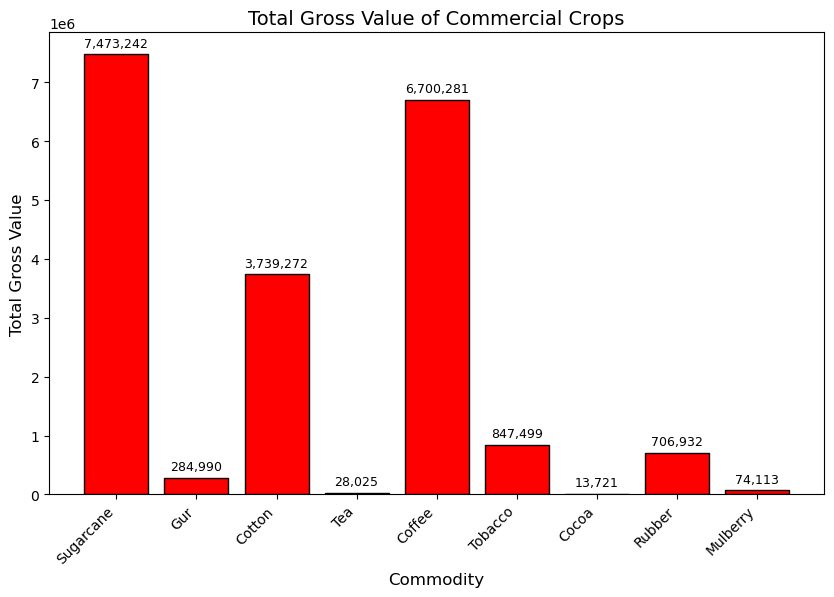

In [156]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Commercial_cropsGV['Commodity'], Commercial_cropsGV['Total_Gross_Value'], color='red', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Commercial_cropsGV['Total_Gross_Value']):
    plt.text(i, value + 0.01 * max(Commercial_cropsGV['Total_Gross_Value']), f'{value:,}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Gross Value', fontsize=12)
plt.title('Total Gross Value of Commercial Crops', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## Mean Percantage Change of Commercial crops

In [157]:
# Calculate the percentage change for each year
Percent_change = Commercial_crops.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

Commercial_crops_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
Commercial_crops_PCT


Overall Trend Direction: Increasing
Mean Percentage Change for Each Commodity:


Commodity   % change
0  Sugarcane  14.278810
1        Gur        inf
2     Cotton  22.415675
3        Tea   5.421489
4     Coffee  15.460618
5    Tobacco   4.780003
6      Cocoa  19.389850
7     Rubber  23.744161
8   Mulberry   3.688315

posx and posy should be finite values
posx and posy should be finite values


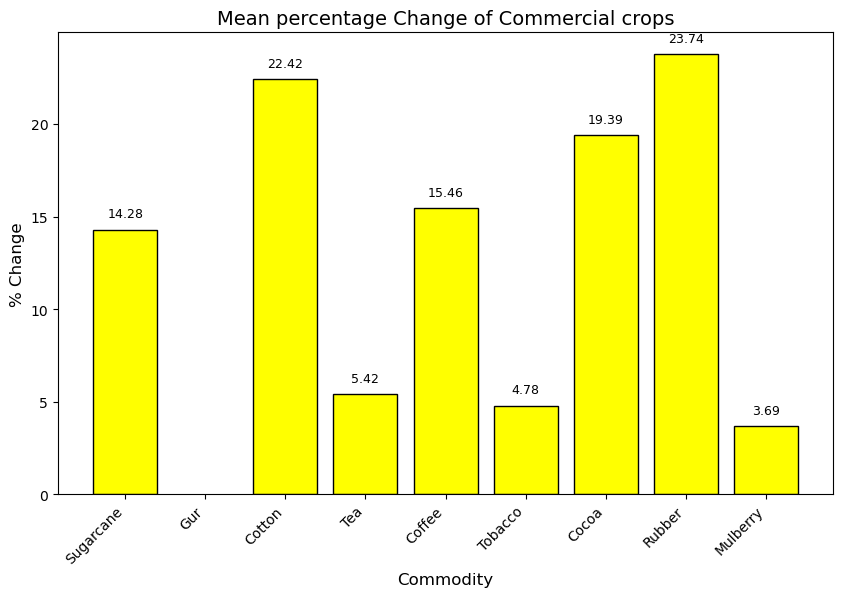

In [158]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Commercial_crops_PCT['Commodity'], Commercial_crops_PCT['% change'], color='yellow', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Commercial_crops_PCT['% change']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.title('Mean percentage Change of Commercial crops', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## GVO Graphical presenatation

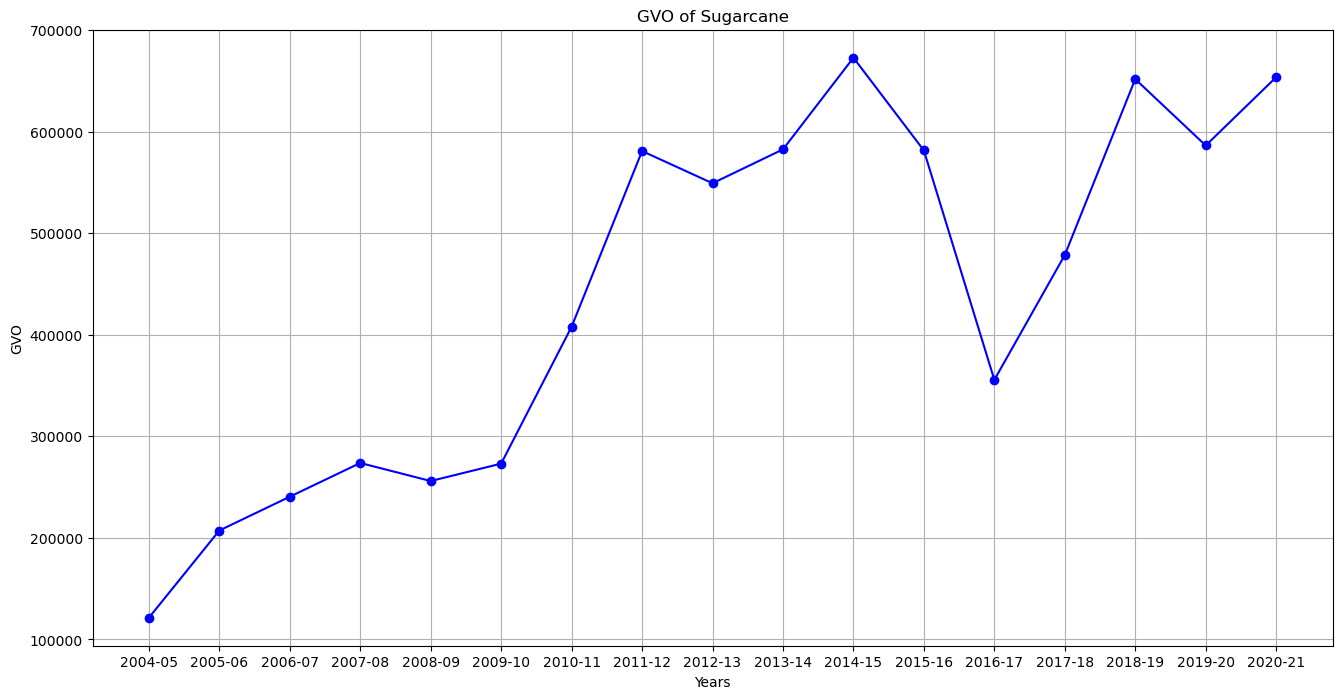

In [159]:
Commercial_crops = Commercial_crops.rename(columns={'Commodity': 'Years'})

Commercial_crops.set_index('Years',inplace =True)

Commercial_crops=Commercial_crops.T

plt.figure(figsize=(16,8))
plt.plot(Commercial_crops.index,Commercial_crops["Sugarcane"],marker='o',linestyle='-',color='b')

plt.xlabel('Years')
plt.ylabel('GVO')
plt.title('GVO of Sugarcane')

plt.grid(True)
plt.show()

In [160]:
Commercial_crops.columns

Index(['Sugarcane', 'Gur', 'Cotton', 'Tea', 'Coffee', 'Tobacco', 'Cocoa',
       'Rubber', 'Mulberry'],
      dtype='object', name='Years')

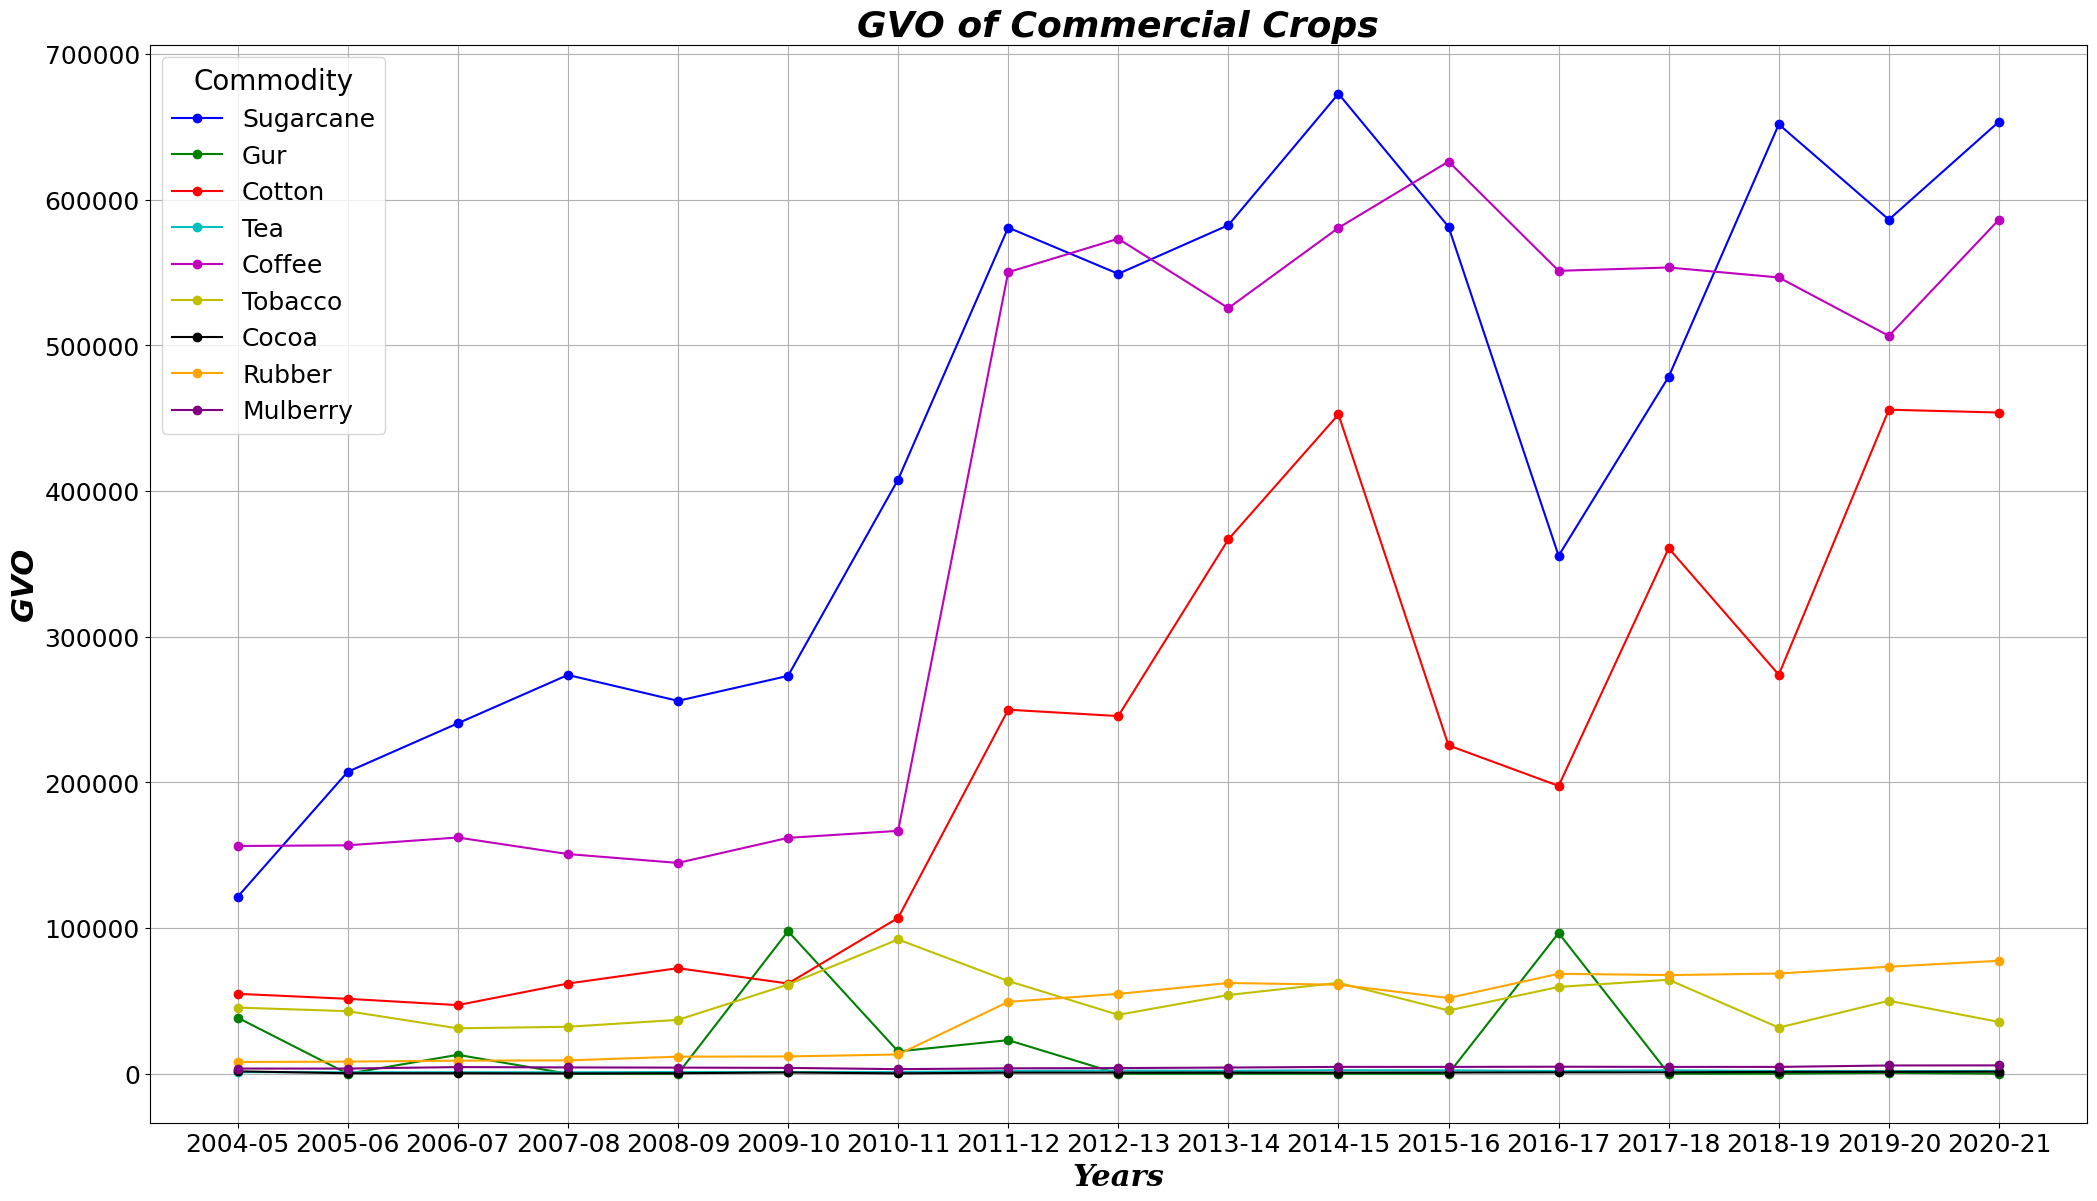

In [161]:
# Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Sugarcane', 'Gur', 'Cotton', 'Tea', 'Coffee', 'Tobacco', 'Cocoa','Rubber', 'Mulberry']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','orange', 'purple']

for commodity, color in zip(commodities, colors):
    plt.plot(Commercial_crops.index, Commercial_crops[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Commercial Crops', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

## Growth rate of Commercial crops

In [162]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in Commercial_crops.columns:
    initial_value = Commercial_crops[commodity].iloc[0]
    final_value = Commercial_crops[commodity].iloc[-1]
    t = len(Commercial_crops.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
    #print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Commercial_crops_GR = pd.DataFrame(results)

# Display the results DataFrame
#print("\nResults DataFrame:")
print(Commercial_crops_GR)

   Commodity Growth Rate
0  Sugarcane      10.41%
1        Gur    -100.00%
2     Cotton      13.24%
3        Tea       3.45%
4     Coffee       8.09%
5    Tobacco      -1.43%
6      Cocoa      -0.90%
7     Rubber      14.26%
8   Mulberry       2.86%


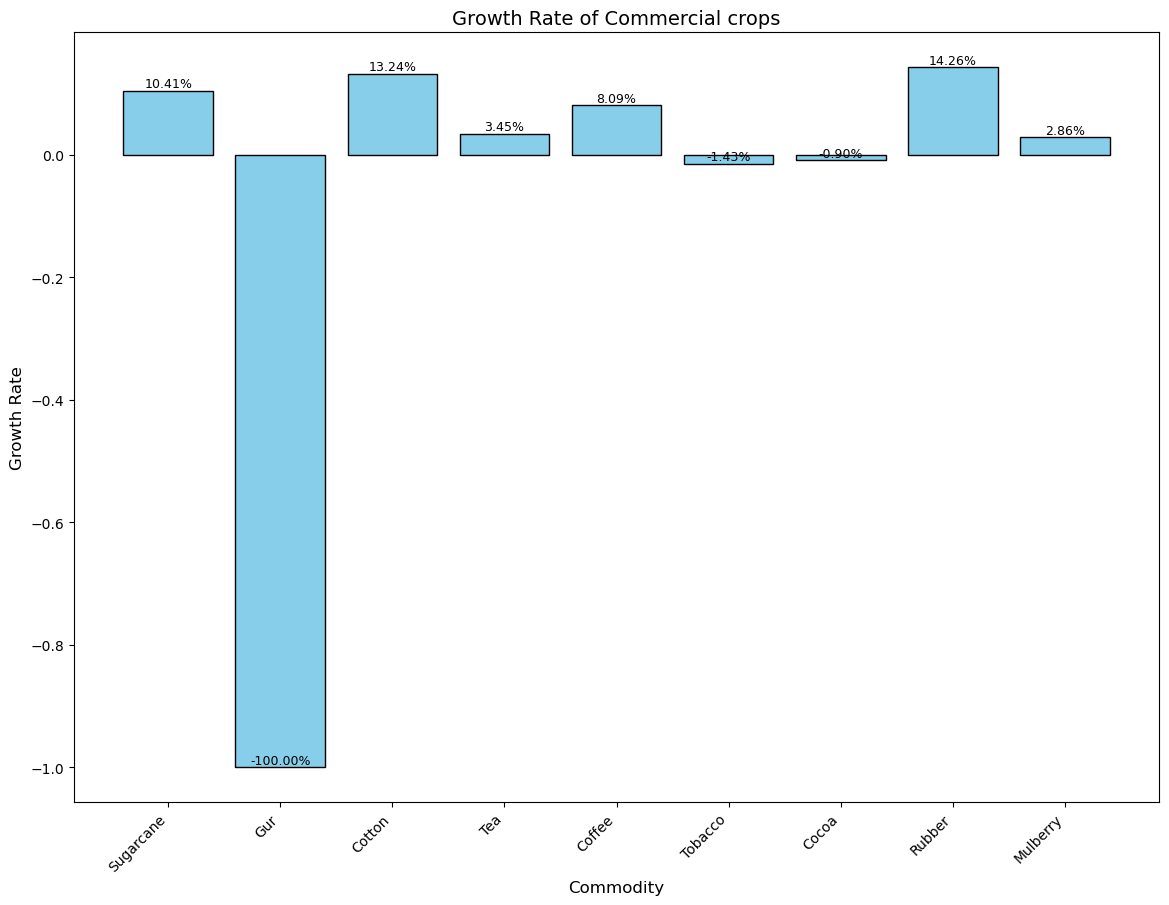

In [163]:
# Convert 'Growth Rate' to numeric values
Commercial_crops_GR['Growth Rate'] = Commercial_crops_GR['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(14, 10))
bars = plt.bar(Commercial_crops_GR['Commodity'], Commercial_crops_GR['Growth Rate'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Growth Rate of Commercial crops', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

## FRUITS & VEGETABLES 2004-11

In [164]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Banana",180),
    ("Cashewnut", 182),
    ("Mango",184),
    ("Grapes",186),
    ("Papaya",188),
    ("Mosambi", 192),
    ("Lemon",194),
    ("Orange",196),
    ("Pineapple",202),
    ("Sapota",204),
    ("Jackfruit",210),
    ("Guava",218),
    ("Potato",222),
    ("Sweet Potato",224),
    ("Tapoica",226),
    ("Onion",228),
    ("Brinjal",230),
    ("Cabbage",232),
    ("Cauliflower",234),
    ("Okra",236),
    ("Tomato",238),
    ("Green Peas",242),
    ("Other Citrus Fruit",198),
    ("Other Fruits",244),
    ("Other Vegetables",246),
    ("Total Fruits and Vegetables",250)
]

# Initializing an empty DataFrame to store the results
Fruits_Vegetables04_11 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 36, 9)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", "Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Fruits_Vegetables04_11 = Fruits_Vegetables04_11.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Fruits_Vegetables04_11)

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2949539971.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables04_11 = Fruits_Vegetables04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2949539971.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables04_11 = Fruits_Vegetables04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2949539971.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables04_11 = Fruits_Vegetables04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2949539971.py:60: FutureWarning: The frame.append method is deprecated and will be remov

                      Commodity 2004-05 2005-06 2006-07 2007-08 2008-09  \
0                        Banana   72348   71025  116909  126737  145430   
1                     Cashewnut    2182    2141    2181    2197   13342   
2                         Mango  184492  200551  212356  189783  199262   
3                        Grapes   23688   24255   27614   32994   34295   
4                        Papaya   13109   15561   18645   23062   24217   
5                       Mosambi    3284    6257    8049   11939    9254   
6                         Lemon   10986   14350   13479   15257   14744   
7                        Orange    2552    3218    3720    8335    8296   
8                     Pineapple    7078    8484   10420    9704   10191   
9                        Sapota   29996   31327   35204   35415   37189   
10                    Jackfruit   17991   20767   22591   22102   21264   
11                        Guava   23696   19012   20546   21554   21985   
12                       

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\2949539971.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables04_11 = Fruits_Vegetables04_11.append(crop_KA, ignore_index=True)


In [165]:
Fruits_Vegetables04_11=Fruits_Vegetables04_11.drop("State/U.Ts",axis=1)
Fruits_Vegetables04_11

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09  \
0                        Banana   72348   71025  116909  126737  145430   
1                     Cashewnut    2182    2141    2181    2197   13342   
2                         Mango  184492  200551  212356  189783  199262   
3                        Grapes   23688   24255   27614   32994   34295   
4                        Papaya   13109   15561   18645   23062   24217   
5                       Mosambi    3284    6257    8049   11939    9254   
6                         Lemon   10986   14350   13479   15257   14744   
7                        Orange    2552    3218    3720    8335    8296   
8                     Pineapple    7078    8484   10420    9704   10191   
9                        Sapota   29996   31327   35204   35415   37189   
10                    Jackfruit   17991   20767   22591   22102   21264   
11                        Guava   23696   19012   20546   21554   21985   
12                       Potato   14422   13160   22412   10075    9836   
13                 Sweet Potato     731     688     629     603     537   
14                      Tapoica     282     288     288     263     298   
15                        Onion   27561   30800   28145   36888   23631   
16                      Brinjal   16490   17148   24612   19041   19615   
17                      Cabbage    5977    6600    6982    7880    8274   
18                  Cauliflower    4783    6226    7308    8215    8625   
19                         Okra    4699    4742    4490    5379    5649   
20                       Tomato   62341   69191   71798   81790   85882   
21                   Green Peas    2685    2905    3894    3259    3528   
22           Other Citrus Fruit     505     393     464     549     513   
23                 Other Fruits   26655   27271   21944   25122   29453   
24             Other Vegetables   63055   67496   70261   79469   83111   
25  Total Fruits and Vegetables  736422  799877  896265  917281  969655   

    2009-10  2010-11  
0    193218   194770  
1     10519    10483  
2    262815   275963  
3     40496    42110  
4     24827    26064  
5     10322    10930  
6     16916    17798  
7      9397     9702  
8      9693    10180  
9     44957    47180  
10    19335    22562  
11    22195    22641  
12    12340    12731  
13      396      427  
14      335      399  
15    23788    32516  
16    18094    18647  
17     3704     8667  
18     8193     8570  
19     5719     5518  
20    91296    95863  
21     3074     3156  
22      421      565  
23    27450    26947  
24    80545   169234  
25  1087590  1221166

## FRUITS & VEGETABLES 2011-21

In [166]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Banana",204),
    ("Cashewnut", 206),
    ("Mango",216),
    ("Grapes",220),
    ("Papaya",222),
    #("Mosambi", 226),
    ("Lemon",228),
    ("Orange",230),
    #("Pineapple",236),
    ("Sapota",238),
    #("Jackfruit",244),
    ("Guava",252),
    ("Potato",208),
    ("Sweet Potato",210),
    ("Tapoica",212),
    ("Onion",214),
    ("Brinjal",272),
    ("Cabbage",274),
    ("Cauliflower",276),
    ("Okra",278),
    ("Tomato",280),
    ("Green Peas",284),
    #("Other Citrus Fruit",232),
    ("Other Fruits",270),
    ("Other Vegetables",308),
    ("Total Fruits and Vegetables",202)
]

# Initializing an empty DataFrame to store the results
Fruits_Vegetables11_21 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(38, 12)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new,columns=["2011-12","2012-13","2013-14",
                                            "2014-15","2015-16","2016-17","2017-18",
                                            "2018-19","2019-20","2020-21","S.No.","State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop =["S.No."]
    crop_df = crop_df.drop(columns=column_to_drop)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Fruits_Vegetables11_21 = Fruits_Vegetables11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Fruits_Vegetables11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3821283226.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables11_21 = Fruits_Vegetables11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3821283226.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables11_21 = Fruits_Vegetables11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3821283226.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables11_21 = Fruits_Vegetables11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3821283226.py:62: FutureWarning: The frame.append method is deprecated and will be remov

                      Commodity    2011-12    2012-13    2013-14    2014-15  \
0                        Banana   128971.0   105061.0   199789.0   193644.0   
1                     Cashewnut    25677.0    35823.0    50661.0    50592.0   
2                         Mango   223710.0   214945.0   210211.0   197153.0   
3                        Grapes    48954.0    54527.0    51382.0    71504.0   
4                        Papaya    23525.0    24639.0    25470.0    28285.0   
5                         Lemon    35947.0    36858.0    35925.0    38408.0   
6                        Orange     9494.0    10718.0    11328.0     9591.0   
7                        Sapota    51456.0    50911.0    49867.0    50751.0   
8                         Guava    11900.0    11882.0    12630.0    12006.0   
9                        Potato    26089.0    22205.0    22871.0    23676.0   
10                 Sweet Potato     1320.0     2678.0     2275.0     2848.0   
11                      Tapoica      474.0      472.

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3821283226.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Vegetables11_21 = Fruits_Vegetables11_21.append(crop_KA, ignore_index=True)


In [167]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ##("Banana",204),
    ##("Cashewnut", 206),
    ##("Mango",216),
    ##("Grapes",220),
    ##("Papaya",222),
    ("Mosambi", 226),
    ##("Lemon",228),
    ##("Orange",230),
    #("Pineapple",236),
    ##("Sapota",238),
    ("Jackfruit",244),
    ##("Guava",252),
    ##("Potato",208),
    ##("Sweet Potato",210),
    ##("Tapoica",212),
    ##("Onion",214),
    ##("Brinjal",272),
    ##("Cabbage",274),
    ##("Cauliflower",276),
    ##("Okra",278),
    ##("Tomato",280),
    ##("Green Peas",284),
    ("Other Citrus Fruit",232),
    ##("Other Fruits",270),
    ##("Other Vegetables",308),
    ##("Total Fruits and Vegetables",202)
]

# Initializing an empty DataFrame to store the results
Fruits_Veges11_21 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(38, 22)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new,columns=["2011-12","Unnamed: 0","2012-13","Unnamed: 1","2013-14","Unnamed: 2",
                                            "2014-15","Unnamed: 3","2015-16","Unnamed: 4","2016-17","... ","2017-18","Unnamed: 6",
                                            "2018-19","Unnamed: 7","2019-20","Unnamed: 8","2020-21","Unnamed: 9","S.No.","State/U.Ts"])
    # Droping the "Unnamed: 0" column
    column_to_drop =['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','Unnamed: 6', 'Unnamed: 7',"Unnamed: 8","Unnamed: 9","S.No."]
    crop_df = crop_df.drop(columns=column_to_drop)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Fruits_Veges11_21 = Fruits_Veges11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Fruits_Veges11_21)

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4041650309.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Veges11_21 = Fruits_Veges11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4041650309.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Veges11_21 = Fruits_Veges11_21.append(crop_KA, ignore_index=True)


            Commodity  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0             Mosambi  18370.0  14105.0   8792.0   8965.0   7646.0   7149.0   
1           Jackfruit  13459.0  13498.0  12516.0  12879.0  12382.0  11912.0   
2  Other Citrus Fruit    443.0    230.0    588.0   4806.0    494.0    437.0   

  ...   2017-18 2018-19 2019-20 2020-21 State/U.Ts  
0  NaN   7184.0  6091.0  4163.0  4029.0  Karnataka  
1  NaN  12335.0  6108.0  4041.0  5901.0  Karnataka  
2  NaN    453.0   673.0   707.0   705.0  Karnataka  


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4041650309.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fruits_Veges11_21 = Fruits_Veges11_21.append(crop_KA, ignore_index=True)


In [168]:
pineapple=read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf",
            pages=236)

data_array = np.array(pineapple)
pineapple_new = data_array.reshape(1,38,14)
pineapple = pd.DataFrame(pineapple_new[0], columns=["2011-12","Unnamed: 0","2012-13","Unnamed: 1","2013-14",
                                            "2014-15","2015-16","2016-17","2017-18","2018-19",
                                            "2019-20","2020-21","S.No.","State/U.Ts"])
# Replace extra spaces in column names
pineapple.columns = pineapple.columns.str.strip()

# Correct the list of column names
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1']
# Drop the specified columns
pineapple = pineapple.drop(columns=columns_to_drop)


pineapple = pineapple[pineapple['State/U.Ts']=='Karnataka']

pineapple.reset_index(drop=True, inplace=True)


# Insert a new column named "Commodity" at position 1 (second column)
pineapple.insert(0, "Commodity", ["Pineapple"])

col=["State/U.Ts","S.No."]
pineapple=pineapple.drop(columns=col)

pineapple


Commodity  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0  Pineapple  17133.0  21662.0  20512.0  20000.0  19885.0  21017.0  20949.0   

   2018-19  2019-20  2020-21  
0  18151.0  17368.0  21061.0

In [169]:
Fruits_vegetables11_21=pd.concat([Fruits_Vegetables11_21,Fruits_Veges11_21,pineapple],ignore_index=True)

cols=['... ',"State/U.Ts"]
Fruits_vegetables11_21=Fruits_vegetables11_21.drop(columns=cols,axis=1)
Fruits_vegetables11_21

Commodity    2011-12    2012-13    2013-14    2014-15  \
0                        Banana   128971.0   105061.0   199789.0   193644.0   
1                     Cashewnut    25677.0    35823.0    50661.0    50592.0   
2                         Mango   223710.0   214945.0   210211.0   197153.0   
3                        Grapes    48954.0    54527.0    51382.0    71504.0   
4                        Papaya    23525.0    24639.0    25470.0    28285.0   
5                         Lemon    35947.0    36858.0    35925.0    38408.0   
6                        Orange     9494.0    10718.0    11328.0     9591.0   
7                        Sapota    51456.0    50911.0    49867.0    50751.0   
8                         Guava    11900.0    11882.0    12630.0    12006.0   
9                        Potato    26089.0    22205.0    22871.0    23676.0   
10                 Sweet Potato     1320.0     2678.0     2275.0     2848.0   
11                      Tapoica      474.0      472.0      354.0      344.0   
12                        Onion    61147.0    35811.0    30867.0    76006.0   
13                      Brinjal    34943.0    33611.0    32104.0    35757.0   
14                      Cabbage    11300.0    12183.0    12352.0    12571.0   
15                  Cauliflower     6919.0     7082.0     7241.0     7024.0   
16                         Okra    10482.0    10819.0    10401.0    12572.0   
17                       Tomato   145869.0   140736.0   151881.0   149384.0   
18                   Green Peas     5322.0     9304.0     8138.0     9233.0   
19                 Other Fruits     5505.0     6010.0     5060.0     6098.0   
20             Other Vegetables    93974.0    98848.0   100980.0   101433.0   
21  Total Fruits and Vegetables  1470265.0  1424531.0  1527647.0  1641531.0   
22                      Mosambi    18370.0    14105.0     8792.0     8965.0   
23                    Jackfruit    13459.0    13498.0    12516.0    12879.0   
24           Other Citrus Fruit      443.0      230.0      588.0     4806.0   
25                    Pineapple    17133.0    21662.0    20512.0    20000.0   

      2015-16    2016-17    2017-18    2018-19    2019-20    2020-21  
0     82741.0   183164.0   173919.0   160296.0   195173.0   251464.0  
1     45878.0    53512.0    56215.0    52842.0    44385.0    46604.0  
2    206632.0   205920.0   210814.0   206036.0   203675.0   197183.0  
3     73028.0    76598.0    89072.0   109302.0   120781.0   139638.0  
4     27175.0    28480.0    31786.0    26728.0    22739.0    25326.0  
5     39200.0    38808.0    41011.0    53882.0    48240.0    44260.0  
6     13740.0    12074.0    11802.0    12485.0    16053.0    26891.0  
7     45074.0    41110.0    43011.0    26468.0    16169.0    13123.0  
8     11284.0    11830.0    12351.0    11181.0    12235.0    14463.0  
9     16295.0    20392.0    25412.0    19825.0    14572.0    22649.0  
10     2529.0     1549.0     1780.0     3623.0     4885.0     3749.0  
11      502.0      359.0      321.0      437.0      573.0      919.0  
12    68450.0   123223.0   131672.0   265989.0   301770.0   208491.0  
13    33658.0    32686.0    34441.0    28107.0    19555.0    23970.0  
14    13420.0    12993.0    13547.0    13518.0    12400.0    13242.0  
15     7108.0     7521.0     7988.0     7637.0     6508.0     7361.0  
16    12251.0    11592.0    13343.0     9915.0     8411.0     8635.0  
17   150248.0   140755.0   152851.0   149066.0   201198.0   152514.0  
18     8274.0     9341.0     9521.0     9301.0     8829.0    14235.0  
19     6230.0    15540.0     5978.0     5825.0     6520.0     6782.0  
20    99803.0   109390.0   108915.0    90821.0    80682.0   112300.0  
21  1634342.0  1934062.0  1856154.0  2030924.0  2157797.0  2183314.0  
22     7646.0     7149.0     7184.0     6091.0     4163.0     4029.0  
23    12382.0    11912.0    12335.0     6108.0     4041.0     5901.0  
24      494.0      437.0      453.0      673.0      707.0      705.0  
25    19885.0    21017.0    20949.0    181

## Merging Fruits&Vegetables 2004-11 & Fruits&Vegetables 2011-21

In [170]:
Fruits_Vegetables=pd.merge(Fruits_Vegetables04_11,Fruits_vegetables11_21,on="Commodity",how="outer")
Fruits_Vegetables

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09  \
0                        Banana   72348   71025  116909  126737  145430   
1                     Cashewnut    2182    2141    2181    2197   13342   
2                         Mango  184492  200551  212356  189783  199262   
3                        Grapes   23688   24255   27614   32994   34295   
4                        Papaya   13109   15561   18645   23062   24217   
5                       Mosambi    3284    6257    8049   11939    9254   
6                         Lemon   10986   14350   13479   15257   14744   
7                        Orange    2552    3218    3720    8335    8296   
8                     Pineapple    7078    8484   10420    9704   10191   
9                        Sapota   29996   31327   35204   35415   37189   
10                    Jackfruit   17991   20767   22591   22102   21264   
11                        Guava   23696   19012   20546   21554   21985   
12                       Potato   14422   13160   22412   10075    9836   
13                 Sweet Potato     731     688     629     603     537   
14                      Tapoica     282     288     288     263     298   
15                        Onion   27561   30800   28145   36888   23631   
16                      Brinjal   16490   17148   24612   19041   19615   
17                      Cabbage    5977    6600    6982    7880    8274   
18                  Cauliflower    4783    6226    7308    8215    8625   
19                         Okra    4699    4742    4490    5379    5649   
20                       Tomato   62341   69191   71798   81790   85882   
21                   Green Peas    2685    2905    3894    3259    3528   
22           Other Citrus Fruit     505     393     464     549     513   
23                 Other Fruits   26655   27271   21944   25122   29453   
24             Other Vegetables   63055   67496   70261   79469   83111   
25  Total Fruits and Vegetables  736422  799877  896265  917281  969655   

    2009-10  2010-11    2011-12    2012-13    2013-14    2014-15    2015-16  \
0    193218   194770   128971.0   105061.0   199789.0   193644.0    82741.0   
1     10519    10483    25677.0    35823.0    50661.0    50592.0    45878.0   
2    262815   275963   223710.0   214945.0   210211.0   197153.0   206632.0   
3     40496    42110    48954.0    54527.0    51382.0    71504.0    73028.0   
4     24827    26064    23525.0    24639.0    25470.0    28285.0    27175.0   
5     10322    10930    18370.0    14105.0     8792.0     8965.0     7646.0   
6     16916    17798    35947.0    36858.0    35925.0    38408.0    39200.0   
7      9397     9702     9494.0    10718.0    11328.0     9591.0    13740.0   
8      9693    10180    17133.0    21662.0    20512.0    20000.0    19885.0   
9     44957    47180    51456.0    50911.0    49867.0    50751.0    45074.0   
10    19335    22562    13459.0    13498.0    12516.0    12879.0    12382.0   
11    22195    22641    11900.0    11882.0    12630.0    12006.0    11284.0   
12    12340    12731    26089.0    22205.0    22871.0    23676.0    16295.0   
13      396      427     1320.0     2678.0     2275.0     2848.0     2529.0   
14      335      399      474.0      472.0      354.0      344.0      502.0   
15    23788    32516    61147.0    35811.0    30867.0    76006.0    68450.0   
16    18094    18647    34943.0    33611.0    32104.0    35757.0    33658.0   
17     3704     8667    11300.0    12183.0    12352.0    12571.0    13420.0   
18     8193     8570     6919.0     7082.0     7241.0     7024.0     7108.0   
19     5719     5518    10482.0    10819.0    10401.0    12572.0    12251.0   
20    91296    95863   145869.0   140736.0   151881.0   149384.0   150248.0   
21     3074     3156     5322.0     9304.0     8138.0     9233.0     8274.0   
22      421      565      443.0      230.0      588.0     4806.0      494.0   
23    27450    26947     5505.0     6010.0     5060.0     6098.0     6230.0   
24    80545   169234 

In [171]:
Fruits_Vegetables["2004-05"]=Fruits_Vegetables["2004-05"].astype(int)
Fruits_Vegetables["2005-06"]=Fruits_Vegetables["2005-06"].astype(int)
Fruits_Vegetables["2006-07"]=Fruits_Vegetables["2006-07"].astype(int)
Fruits_Vegetables["2007-08"]=Fruits_Vegetables["2007-08"].astype(int)
Fruits_Vegetables["2008-09"]=Fruits_Vegetables["2008-09"].astype(int)
Fruits_Vegetables["2009-10"]=Fruits_Vegetables["2009-10"].astype(int)
Fruits_Vegetables["2010-11"]=Fruits_Vegetables["2010-11"].astype(int)
Fruits_Vegetables["2011-12"]=Fruits_Vegetables["2011-12"].astype(int)
Fruits_Vegetables["2012-13"]=Fruits_Vegetables["2012-13"].astype(int)
Fruits_Vegetables["2013-14"]=Fruits_Vegetables["2013-14"].astype(int)
Fruits_Vegetables["2014-15"]=Fruits_Vegetables["2014-15"].astype(int)
Fruits_Vegetables["2015-16"]=Fruits_Vegetables["2015-16"].astype(int)
Fruits_Vegetables["2016-17"]=Fruits_Vegetables["2016-17"].astype(int)
Fruits_Vegetables["2017-18"]=Fruits_Vegetables["2017-18"].astype(int)
Fruits_Vegetables["2018-19"]=Fruits_Vegetables["2018-19"].astype(int)
Fruits_Vegetables["2019-20"]=Fruits_Vegetables["2019-20"].astype(int)
Fruits_Vegetables["2020-21"]=Fruits_Vegetables["2020-21"].astype(int)

# Fruits & Vegetables CSV File

In [172]:
#Fruits_Vegetables.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Fruits_Vegetables.csv",index=False)
Fruits_Vegetables=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Fruits_Vegetables.csv")
Fruits_Vegetables

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  \
0                        Banana    72348    71025   116909   126737   145430   
1                     Cashewnut     2182     2141     2181     2197    13342   
2                         Mango   184492   200551   212356   189783   199262   
3                        Grapes    23688    24255    27614    32994    34295   
4                        Papaya    13109    15561    18645    23062    24217   
5                       Mosambi     3284     6257     8049    11939     9254   
6                         Lemon    10986    14350    13479    15257    14744   
7                        Orange     2552     3218     3720     8335     8296   
8                     Pineapple     7078     8484    10420     9704    10191   
9                        Sapota    29996    31327    35204    35415    37189   
10                    Jackfruit    17991    20767    22591    22102    21264   
11                        Guava    23696    19012    20546    21554    21985   
12                       Potato    14422    13160    22412    10075     9836   
13                 Sweet Potato      731      688      629      603      537   
14                      Tapoica      282      288      288      263      298   
15                        Onion    27561    30800    28145    36888    23631   
16                      Brinjal    16490    17148    24612    19041    19615   
17                      Cabbage     5977     6600     6982     7880     8274   
18                  Cauliflower     4783     6226     7308     8215     8625   
19                         Okra     4699     4742     4490     5379     5649   
20                       Tomato    62341    69191    71798    81790    85882   
21                   Green Peas     2685     2905     3894     3259     3528   
22           Other Citrus Fruit      505      393      464      549      513   
23                 Other Fruits    26655    27271    21944    25122    29453   
24             Other Vegetables    63055    67496    70261    79469    83111   
25  Total Fruits and Vegetables   736422   799877   896265   917281   969655   

    2009-10  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0    193218   194770   128971   105061   199789   193644    82741   183164   
1     10519    10483    25677    35823    50661    50592    45878    53512   
2    262815   275963   223710   214945   210211   197153   206632   205920   
3     40496    42110    48954    54527    51382    71504    73028    76598   
4     24827    26064    23525    24639    25470    28285    27175    28480   
5     10322    10930    18370    14105     8792     8965     7646     7149   
6     16916    17798    35947    36858    35925    38408    39200    38808   
7      9397     9702     9494    10718    11328     9591    13740    12074   
8      9693    10180    17133    21662    20512    20000    19885    21017   
9     44957    47180    51456    50911    49867    50751    45074    41110   
10    19335    22562    13459    13498    12516    12879    12382    11912   
11    22195    22641    11900    11882    12630    12006    11284    11830   
12    12340    12731    26089    22205    22871    23676    16295    20392   
13      396      427     1320     2678     2275     2848     2529     1549   
14      335      399      474      472      354      344      502      359   
15    23788    32516    61147    35811    30867    76006    68450   123223   
16    18094    18647    34943    33611    32104    35757    33658    32686   
17     3704     8667    11300    12183    12352    12571    13420    12993   
18     8193     8570     6919     7082     7241     7024     7108     7521   
19     5719     5518    10482    10819    10401    12572    12251    11592   
20    91296    95863   145869   140736   151881   149384   150248   140755   
21     3074     3156     5322     9304     8138     9233     8274     9341   
22      421      565      443      230      588     4806      494  

## Gross value of Fruits & Vegetables

In [173]:
Fruits_VegetablesGV=pd.DataFrame()

# Create Fruits_VegetablesGV DataFrame with 'Commodity' and 'Gross_value' columns
Fruits_VegetablesGV = Fruits_Vegetables[['Commodity']].copy()
Fruits_VegetablesGV['Total_Gross_Value'] = Fruits_Vegetables.iloc[:, 1:].sum(axis=1)

# Find low and high-value crops
low_crop = Fruits_Vegetables.loc[Fruits_VegetablesGV['Total_Gross_Value'].idxmin(), 'Commodity']
low_value = Fruits_VegetablesGV['Total_Gross_Value'].min()

high_crop = Fruits_Vegetables.loc[Fruits_VegetablesGV['Total_Gross_Value'].idxmax(), 'Commodity']
high_value = Fruits_VegetablesGV['Total_Gross_Value'].max()

# Display the results
print(f"Low-value crop: {low_crop} (Total Gross Value: {low_value})")
print(f"High-value crop: {high_crop} (Total Gross Value: {high_value})")

# Display Fruits_VegetablesGV DataFrame
#print("Fruits_VegetablesGV DataFrame:")
Fruits_VegetablesGV

Low-value crop: Tapoica (Total Gross Value: 6908)
High-value crop: Total Fruits and Vegetables (Total Gross Value: 24488823)


Commodity  Total_Gross_Value
0                        Banana            2594659
1                     Cashewnut             505234
2                         Mango            3601501
3                        Grapes            1060238
4                        Papaya             409638
5                       Mosambi             146529
6                         Lemon             516069
7                        Orange             179396
8                     Pineapple             263488
9                        Sapota             649208
10                    Jackfruit             251643
11                        Guava             273391
12                       Potato             308962
13                 Sweet Potato              31247
14                      Tapoica               6908
15                        Onion            1506755
16                      Brinjal             442479
17                      Cabbage             175610
18                  Cauliflower             124309
19                         Okra             144617
20                       Tomato            2092663
21                   Green Peas             113999
22           Other Citrus Fruit              12946
23                 Other Fruits             254390
24             Other Vegetables            1610317
25  Total Fruits and Vegetables           24488823

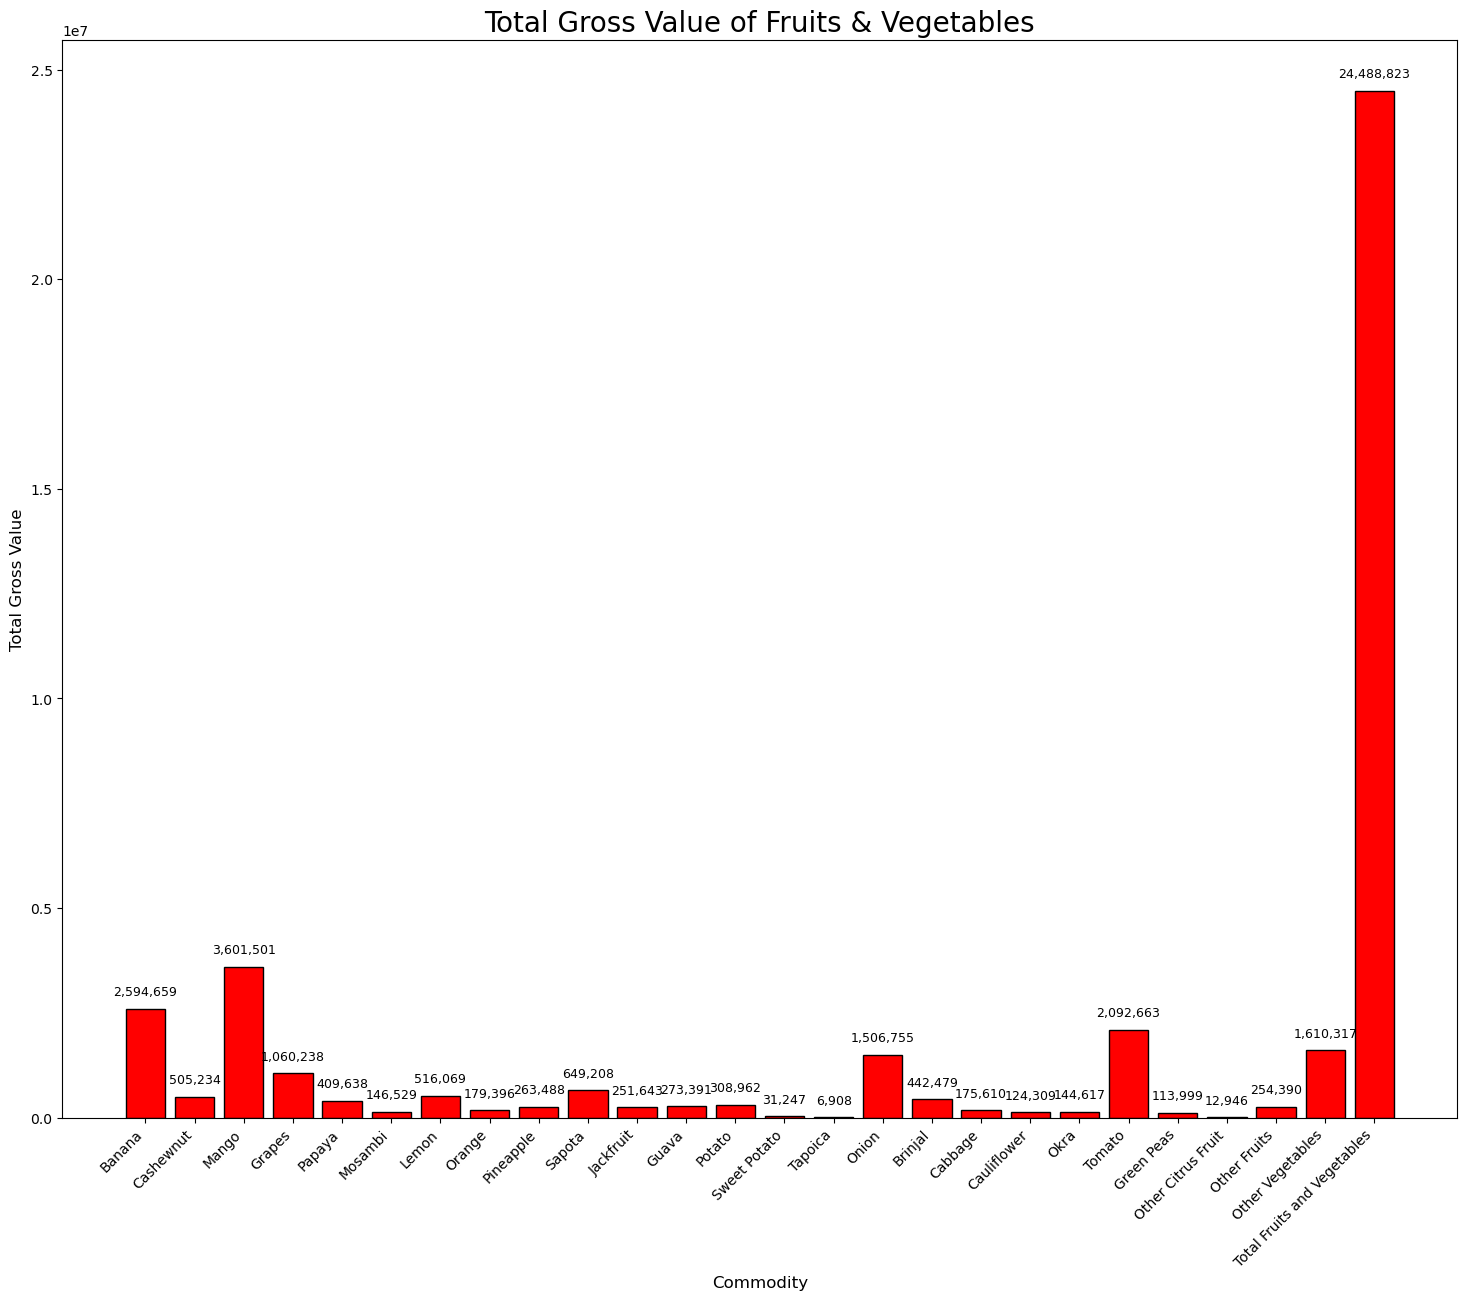

In [174]:
# Plotting the bar plot
plt.figure(figsize=(18, 14))
plt.bar(Fruits_VegetablesGV['Commodity'], Fruits_VegetablesGV['Total_Gross_Value'], color='red', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Fruits_VegetablesGV['Total_Gross_Value']):
    plt.text(i, value + 0.01 * max(Fruits_VegetablesGV['Total_Gross_Value']), f'{value:,}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Gross Value', fontsize=12)
plt.title('Total Gross Value of Fruits & Vegetables', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## Mean Percantage Change of Fruits & Vegetables

In [175]:
# Calculate the percentage change for each year
Percent_change = Fruits_Vegetables.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

Fruits_Vegetables_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
Fruits_Vegetables_PCT


Overall Trend Direction: Increasing
Mean Percentage Change for Each Commodity:


Commodity   % change
0                        Banana  16.011114
1                     Cashewnut  44.225645
2                         Mango   0.926604
3                        Grapes  12.181087
4                        Papaya   4.822990
5                       Mosambi   6.298967
6                         Lemon  11.413330
7                        Orange  19.604508
8                     Pineapple   8.517869
9                        Sapota  -3.474233
10                    Jackfruit  -3.809701
11                        Guava  -1.667018
12                       Potato   9.678017
13                 Sweet Potato  22.141505
14                      Tapoica  10.207961
15                        Onion  23.509127
16                      Brinjal   5.252796
17                      Cabbage  10.020326
18                  Cauliflower   3.376698
19                         Okra   6.081548
20                       Tomato   6.940946
21                   Green Peas  14.165063
22           Other Citrus Fruit  48.936308
23                 Other Fruits   2.727345
24             Other Vegetables   7.384319
25  Total Fruits and Vegetables   7.241583

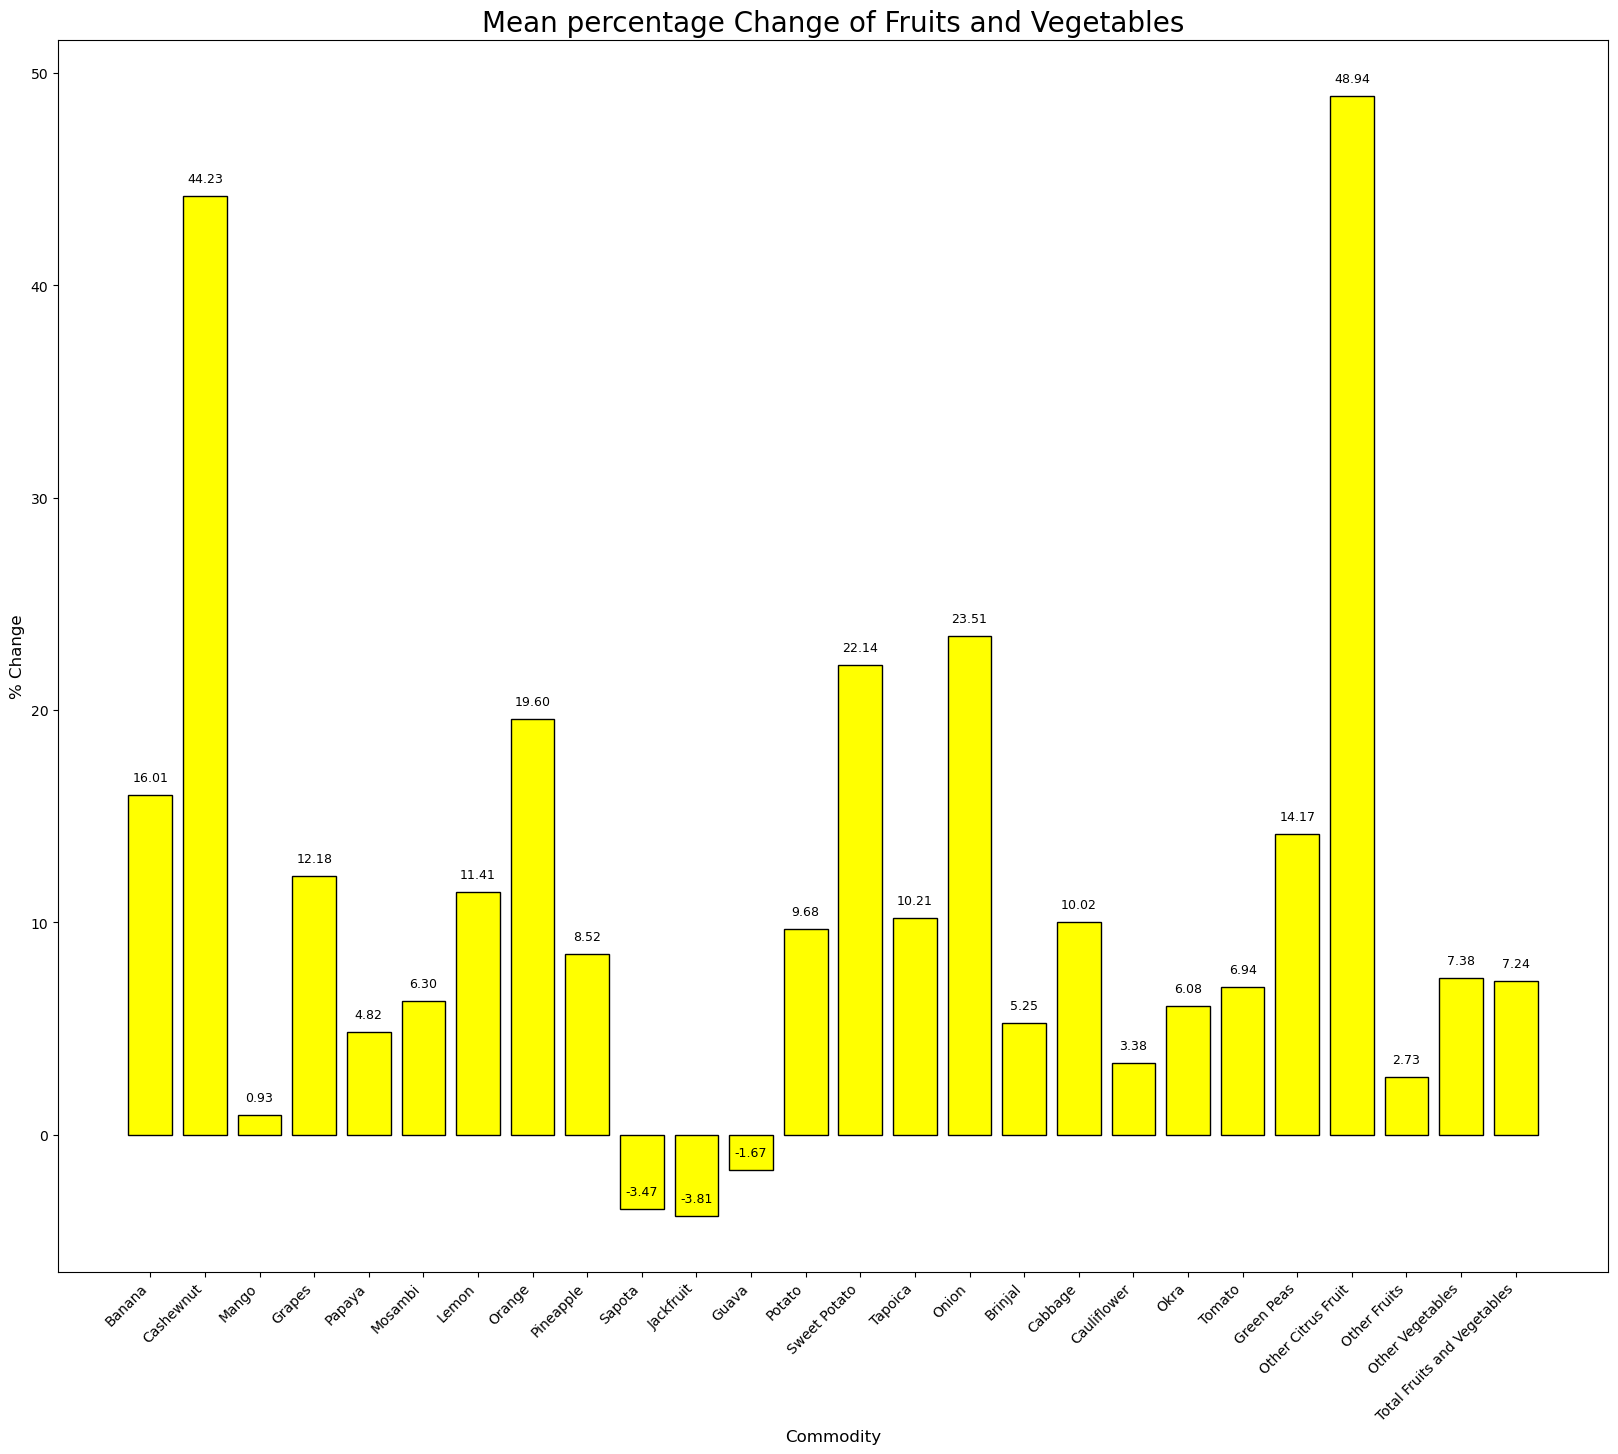

In [176]:
# Plotting the bar plot
plt.figure(figsize=(20, 16))
plt.bar(Fruits_Vegetables_PCT['Commodity'], Fruits_Vegetables_PCT['% change'], color='yellow', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Fruits_Vegetables_PCT['% change']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.title('Mean percentage Change of Fruits and Vegetables', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()


## GVO Graphical presentation

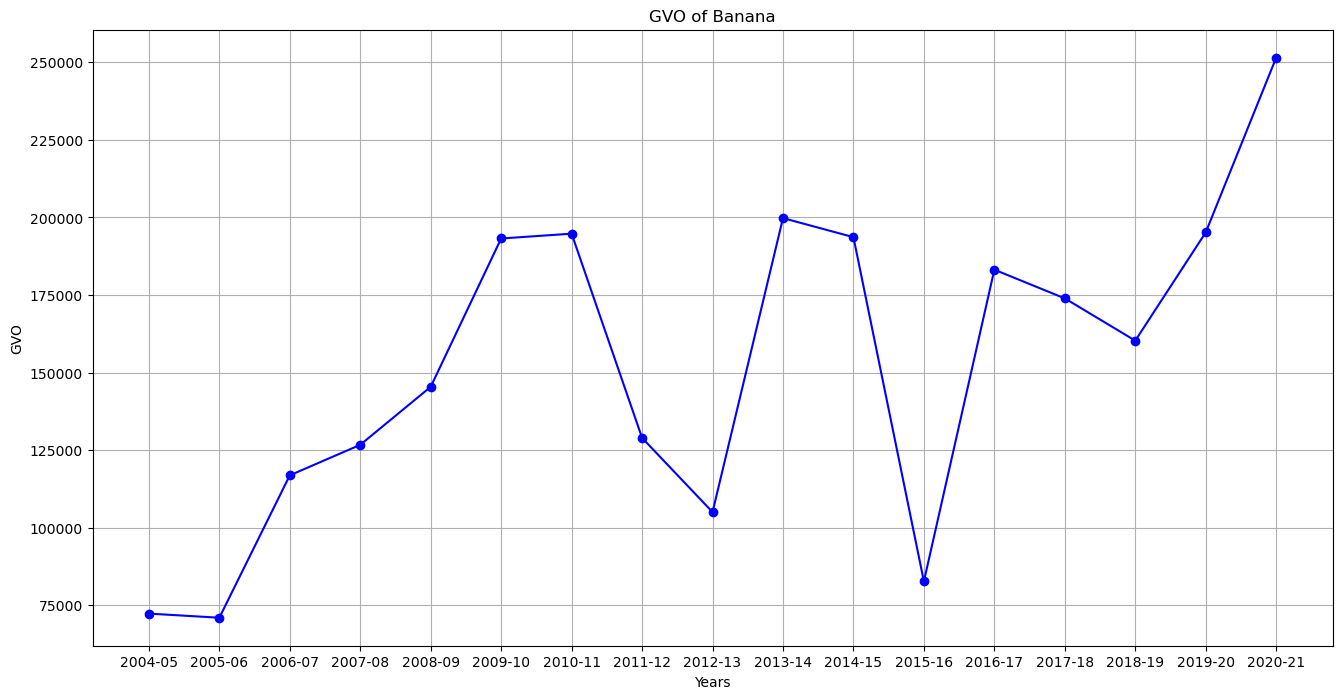

In [177]:
Fruits_Vegetables = Fruits_Vegetables.rename(columns={'Commodity': 'Years'})
Fruits_Vegetables.set_index('Years',inplace =True)
Fruits_Vegetables=Fruits_Vegetables.T

plt.figure(figsize=(16,8))
plt.plot(Fruits_Vegetables.index,Fruits_Vegetables["Banana"],marker='o',linestyle='-',color='b')

plt.xlabel('Years')
plt.ylabel('GVO')
plt.title('GVO of Banana')

plt.grid(True)
plt.show()

In [178]:
Fruits_Vegetables.columns

Index(['Banana', 'Cashewnut', 'Mango', 'Grapes', 'Papaya', 'Mosambi', 'Lemon',
       'Orange', 'Pineapple', 'Sapota', 'Jackfruit', 'Guava', 'Potato',
       'Sweet Potato', 'Tapoica', 'Onion', 'Brinjal', 'Cabbage', 'Cauliflower',
       'Okra', 'Tomato', 'Green Peas', 'Other Citrus Fruit', 'Other Fruits',
       'Other Vegetables', 'Total Fruits and Vegetables'],
      dtype='object', name='Years')

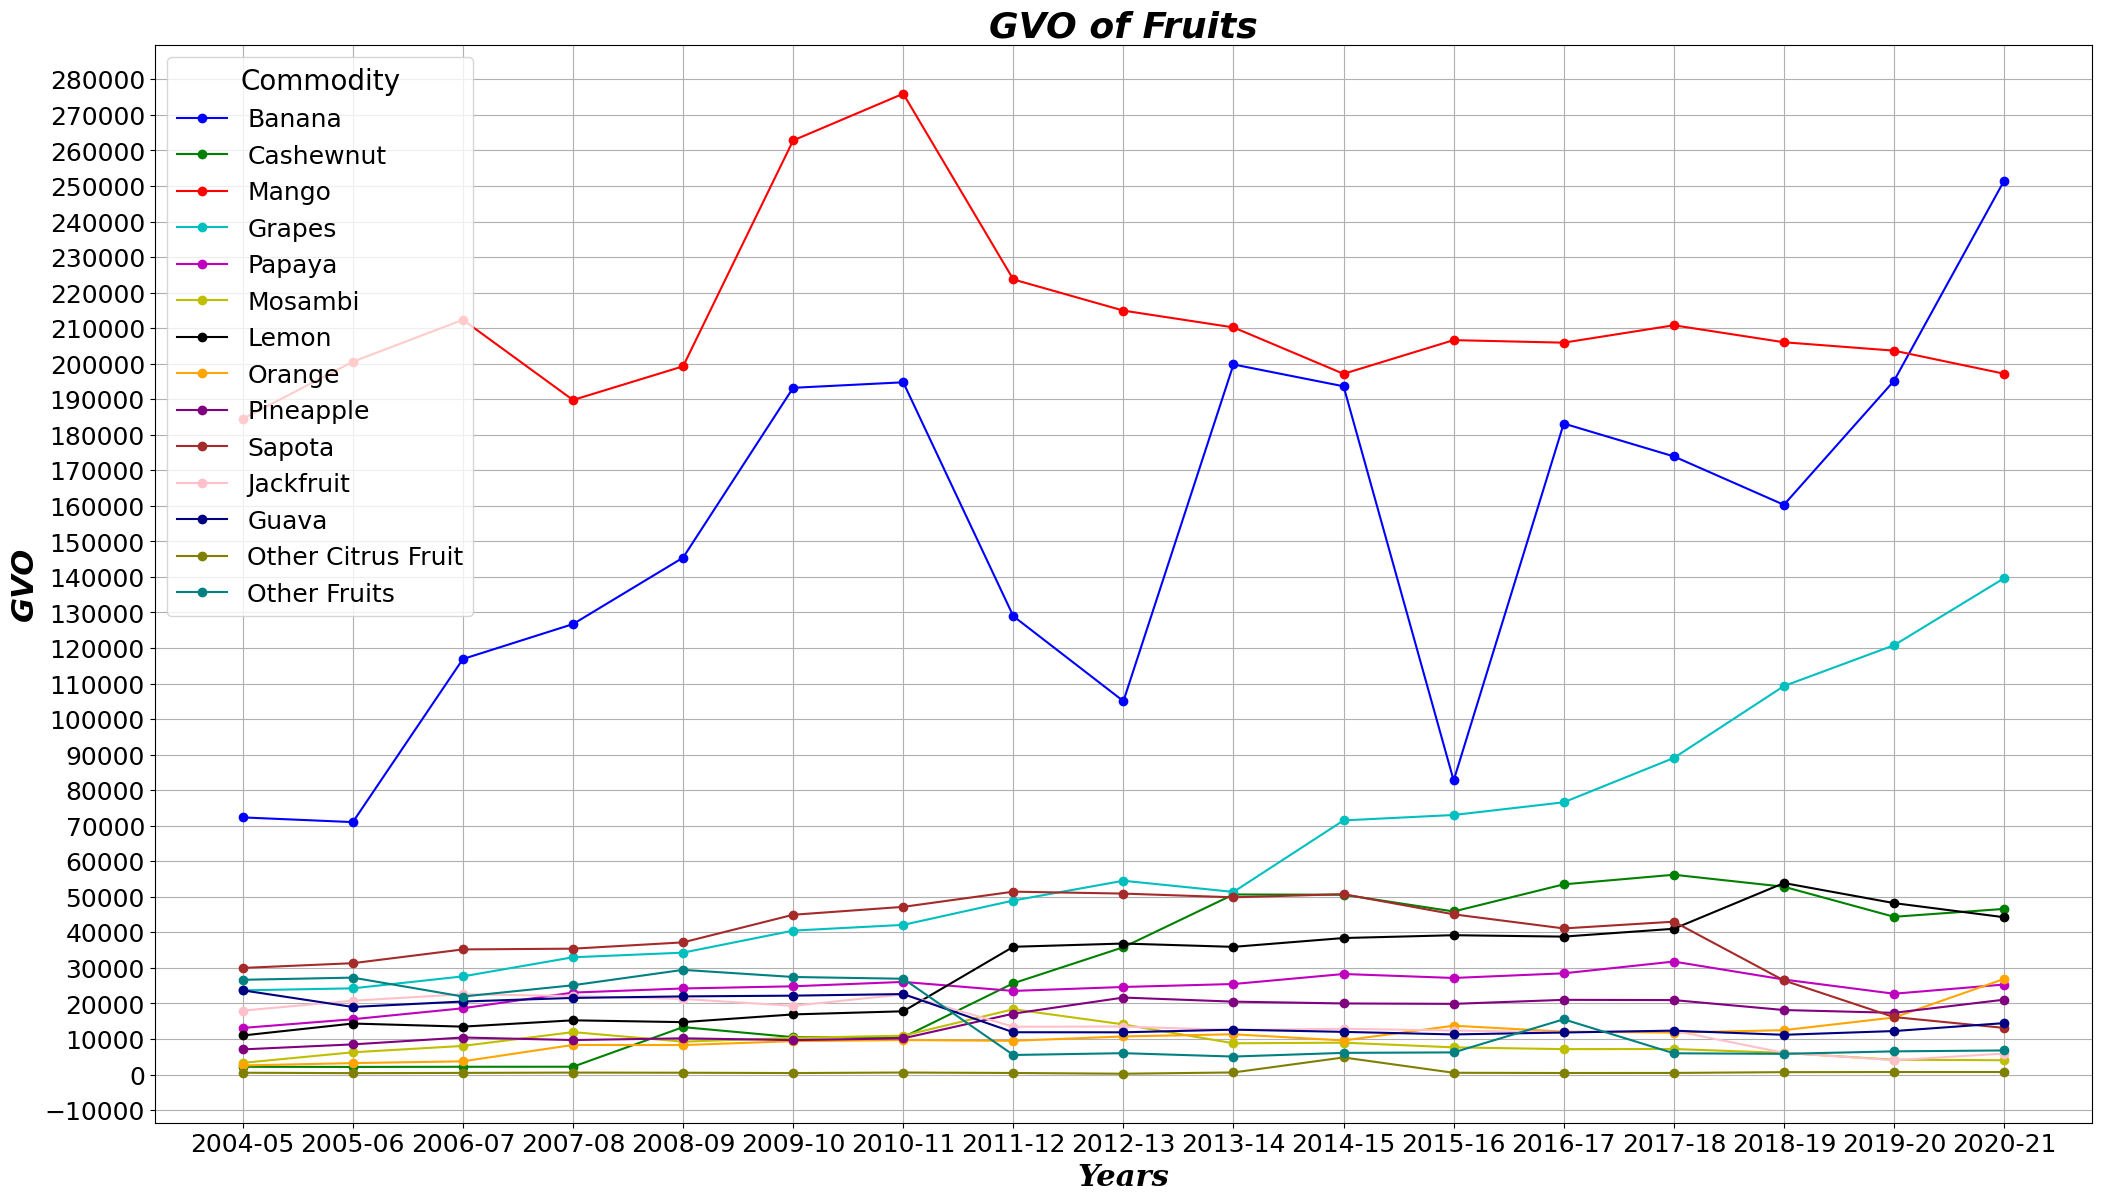

In [179]:
#Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Banana', 'Cashewnut', 'Mango', 'Grapes', 'Papaya', 'Mosambi', 'Lemon','Orange', 
               'Pineapple', 'Sapota', 'Jackfruit', 'Guava','Other Citrus Fruit', 'Other Fruits']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','orange', 'purple', 'brown', 'pink','navy', 'olive','teal']

for commodity, color in zip(commodities, colors):
    plt.plot(Fruits_Vegetables.index, Fruits_Vegetables[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Fruits', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

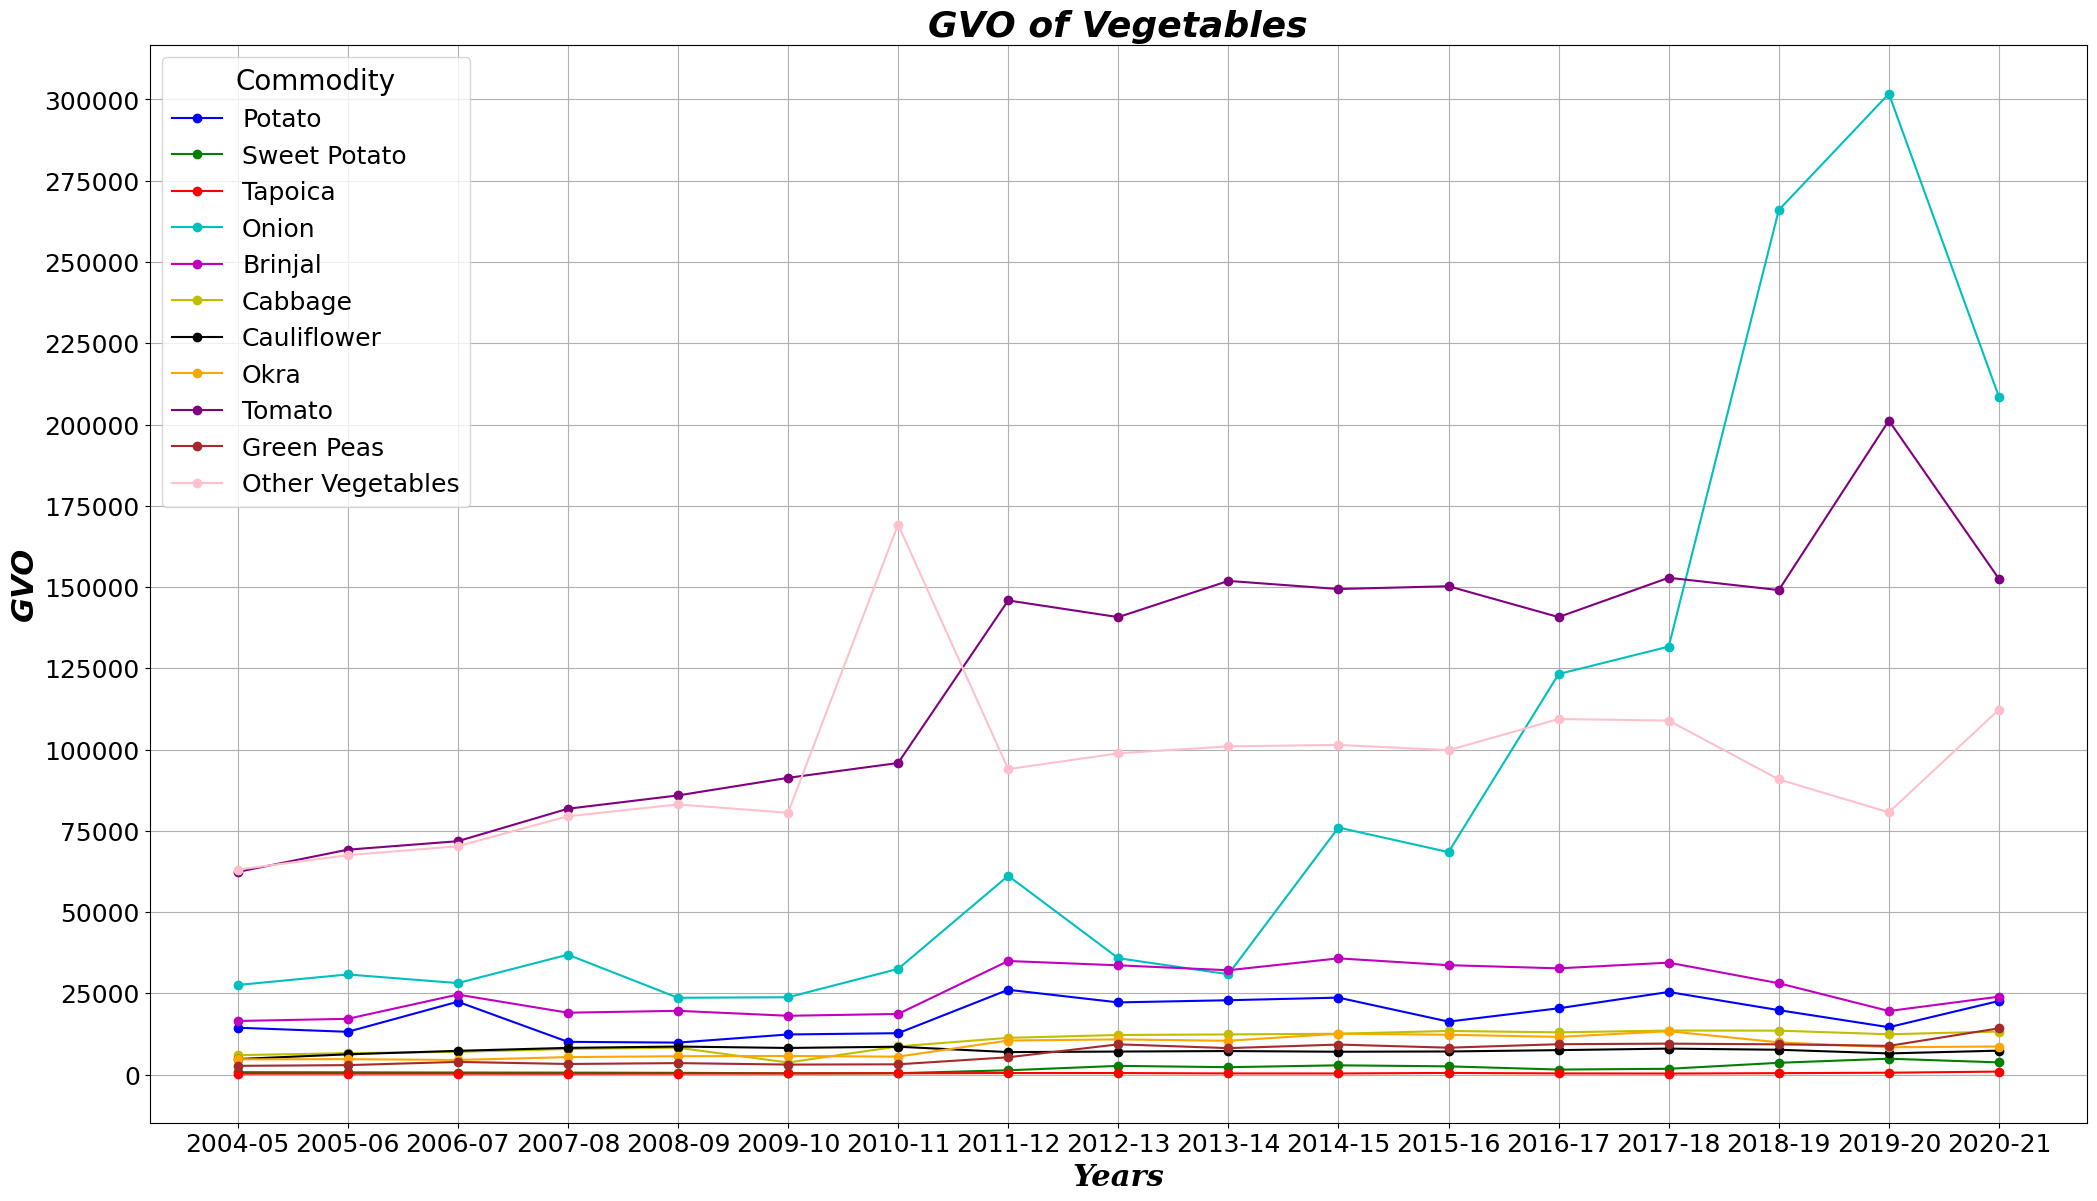

In [180]:
#Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Potato','Sweet Potato', 'Tapoica', 'Onion', 'Brinjal', 'Cabbage', 'Cauliflower',
       'Okra', 'Tomato', 'Green Peas', 'Other Vegetables']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','orange', 'purple', 'brown', 'pink','navy', 'olive']

for commodity, color in zip(commodities, colors):
    plt.plot(Fruits_Vegetables.index, Fruits_Vegetables[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Vegetables', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(25000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

## Growth Rate of Fruits & Vegetables

In [181]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in Fruits_Vegetables.columns:
    initial_value = Fruits_Vegetables[commodity].iloc[0]
    final_value = Fruits_Vegetables[commodity].iloc[-1]
    t = len(Fruits_Vegetables.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
    #print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Fruits_Vegetables_GR = pd.DataFrame(results)

# Display the results DataFrame
#print("\nResults DataFrame:")
print(Fruits_Vegetables_GR)

                      Commodity Growth Rate
0                        Banana       7.60%
1                     Cashewnut      19.73%
2                         Mango       0.39%
3                        Grapes      11.00%
4                        Papaya       3.95%
5                       Mosambi       1.21%
6                         Lemon       8.54%
7                        Orange      14.86%
8                     Pineapple       6.62%
9                        Sapota      -4.75%
10                    Jackfruit      -6.35%
11                        Guava      -2.86%
12                       Potato       2.69%
13                 Sweet Potato      10.09%
14                      Tapoica       7.20%
15                        Onion      12.64%
16                      Brinjal       2.22%
17                      Cabbage       4.79%
18                  Cauliflower       2.57%
19                         Okra       3.64%
20                       Tomato       5.40%
21                   Green Peas 

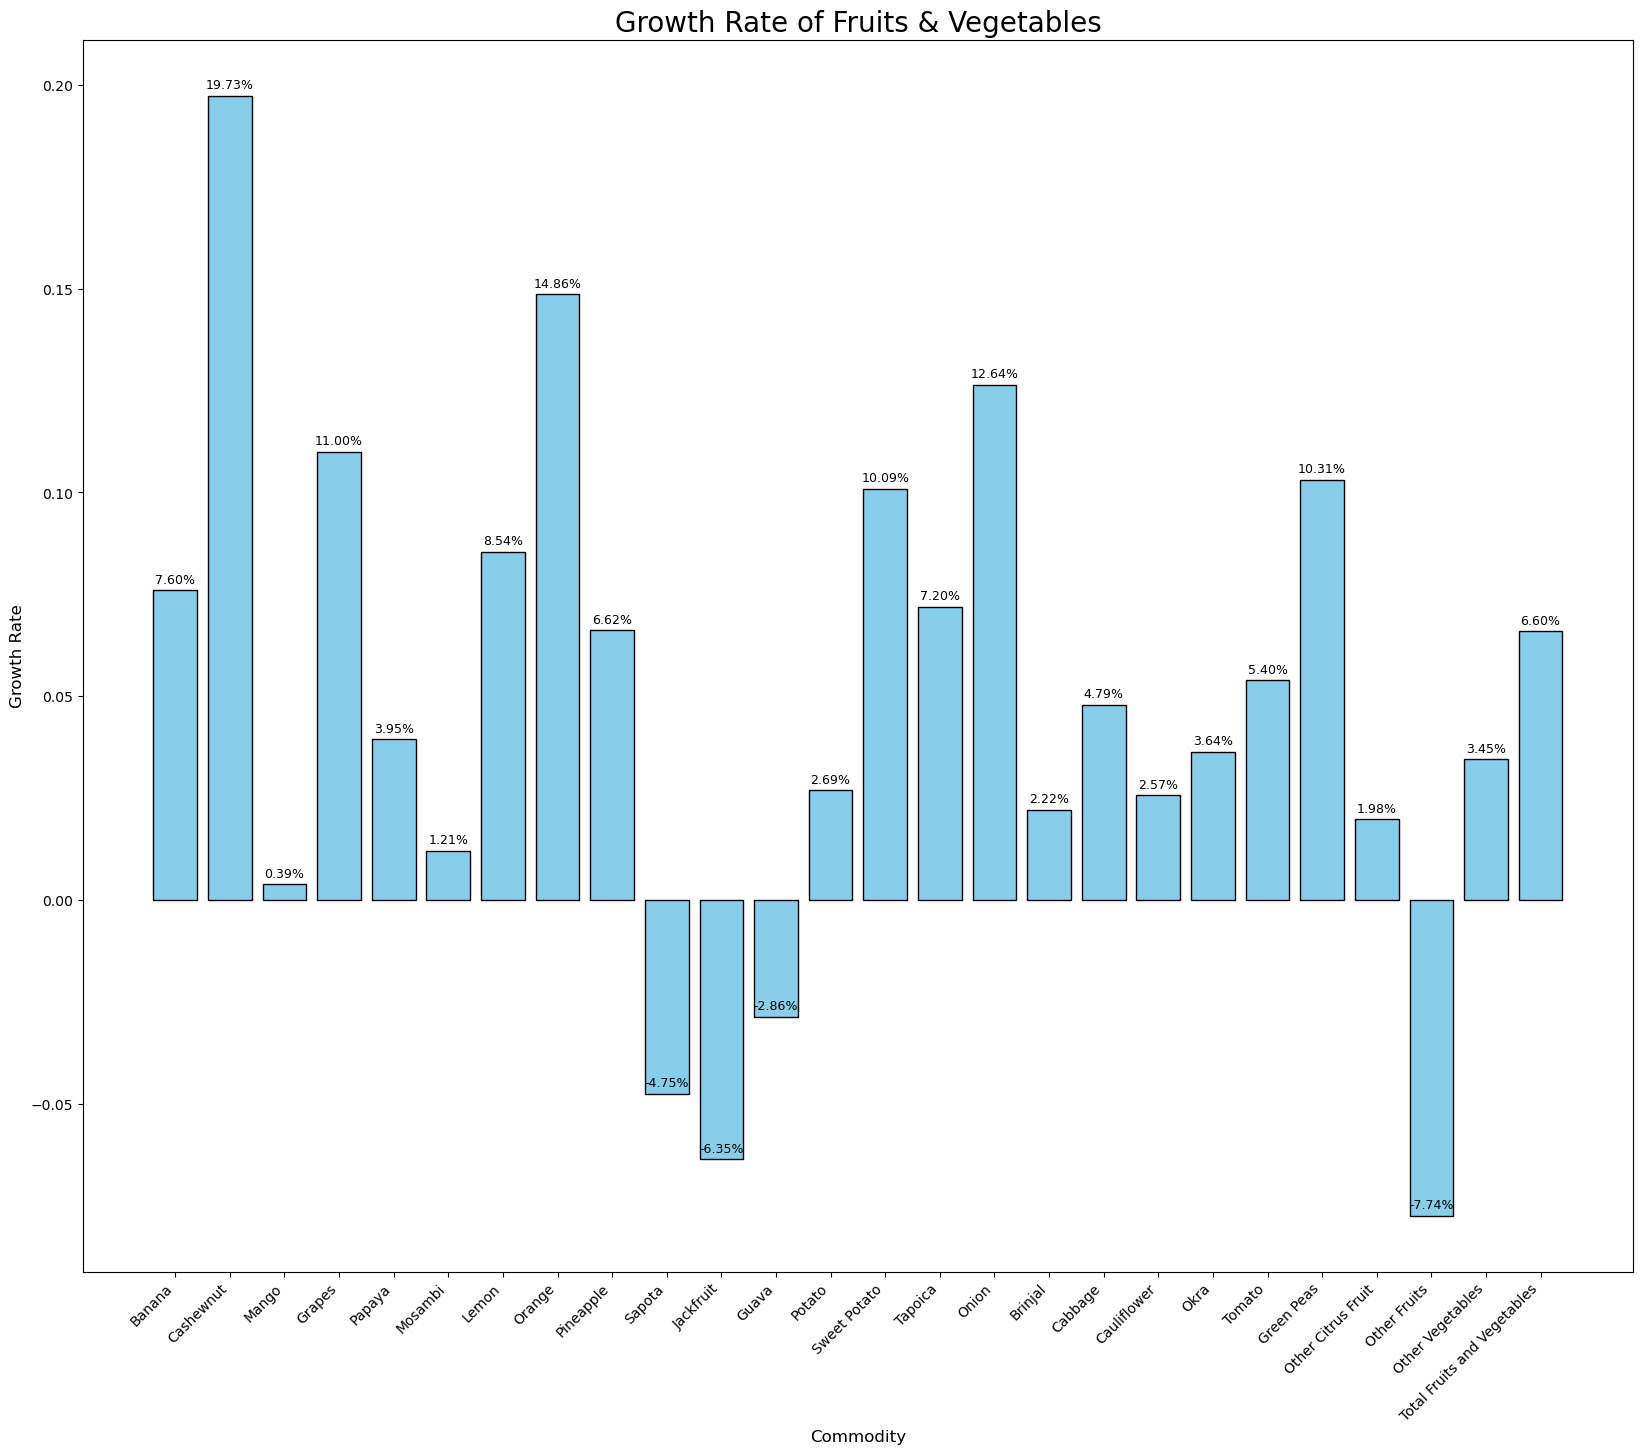

In [182]:
# Convert 'Growth Rate' to numeric values
Fruits_Vegetables_GR['Growth Rate'] = Fruits_Vegetables_GR['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(20, 16))
bars = plt.bar(Fruits_Vegetables_GR['Commodity'], Fruits_Vegetables_GR['Growth Rate'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Growth Rate of Fruits & Vegetables', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

## CONDIMENTS & SPICES 2004-11

In [183]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Cardamom",146),
    ("Dry Chillies", 148),
    ("Black Pepper",150),
    ("Dry Ginger",152),
    ("Turmeric",154),
    ("Arecanut", 156),
    ("Garlic",158),
    ("Coriander",160),
    ("Tamarind",170),
    ("Other Condiments & Spices",176),
    ("Total Condiments & Spices",178)
]

# Initializing an empty DataFrame to store the results
Condiments_Spices04_11 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT2004-11.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(1, 36, 9)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new[0], columns=["2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", "Unnamed: 0", "State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop = "Unnamed: 0"
    crop_df = crop_df.drop(column_to_drop, axis=1)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Condiments_Spices04_11 = Condiments_Spices04_11.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Condiments_Spices04_11)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4108978723.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_Spices04_11 = Condiments_Spices04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4108978723.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_Spices04_11 = Condiments_Spices04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4108978723.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_Spices04_11 = Condiments_Spices04_11.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4108978723.py:45: FutureWarning: The frame.append method is deprecated and will be remov

                    Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0                    Cardamom    2665    2718    3321    4771    4347    3056   
1                Dry Chillies   29674   30308   36872   40233   38319   39201   
2                Black Pepper    1803    2124    1965    3332    3563    4585   
3                  Dry Ginger    6391   12588   10202   13515   23790   62905   
4                    Turmeric    6923   12103   13482   37489   24071   32116   
5                    Arecanut  128187  135318  140999  145847  153625  162827   
6                      Garlic     532     530     669     964     929    1004   
7                   Coriander     279     262     186     417     490     599   
8                    Tamarind   17235   18105   18580   18495   18996   19046   
9   Other Condiments & Spices    2619    2652    2697    2697    2697    1165   
10  Total Condiments & Spices  196309  216708  228973  267760  270826  326505   

   2010-11 State/U.Ts  
0  

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4108978723.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_Spices04_11 = Condiments_Spices04_11.append(crop_KA, ignore_index=True)


In [184]:
Condiments_Spices04_11=Condiments_Spices04_11.drop("State/U.Ts",axis=1)
Condiments_Spices04_11

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0                    Cardamom    2665    2718    3321    4771    4347    3056   
1                Dry Chillies   29674   30308   36872   40233   38319   39201   
2                Black Pepper    1803    2124    1965    3332    3563    4585   
3                  Dry Ginger    6391   12588   10202   13515   23790   62905   
4                    Turmeric    6923   12103   13482   37489   24071   32116   
5                    Arecanut  128187  135318  140999  145847  153625  162827   
6                      Garlic     532     530     669     964     929    1004   
7                   Coriander     279     262     186     417     490     599   
8                    Tamarind   17235   18105   18580   18495   18996   19046   
9   Other Condiments & Spices    2619    2652    2697    2697    2697    1165   
10  Total Condiments & Spices  196309  216708  228973  267760  270826  326505   

   2010-11  
0     3739  
1    27995  
2     8330  
3    74919  
4    25054  
5   286530  
6      832  
7      301  
8    17499  
9      344  
10  445544

## CONDIEMNTS & SPICES 2011-21

In [185]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ("Cardamom",168),
    #("Dry Chillies", 170),
    ("Black Pepper",172),
    #("Dry Ginger",174),
    #("Turmeric",176),
    #("Arecanut", 178),
    ("Garlic",180),
    #("Coriander",182),
    #("Tamarind",192),
    #("Other Condiments & Spices",200),
    #("Total Condiments & Spices",166)
]

# Initializing an empty DataFrame to store the results
condiments_spices11_21 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(38, 22)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new,columns=["2011-12","Unnamed: 0","2012-13","Unnamed: 1","2013-14","Unnamed: 2",
                                            "2014-15","Unnamed: 3","2015-16","Unnamed: 4","2016-17","... ","2017-18","Unnamed: 6",
                                            "2018-19","Unnamed: 7","2019-20","Unnamed: 8","2020-21","Unnamed: 9","S.No.","State/U.Ts"])
    # Droping the "Unnamed: 0" column
    column_to_drop =['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','Unnamed: 6', 'Unnamed: 7',"Unnamed: 8","Unnamed: 9","S.No."]
    crop_df = crop_df.drop(columns=column_to_drop)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    condiments_spices11_21 = condiments_spices11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(condiments_spices11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4061329727.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condiments_spices11_21 = condiments_spices11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4061329727.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condiments_spices11_21 = condiments_spices11_21.append(crop_KA, ignore_index=True)


      Commodity 2011-12 2012-13 2013-14  2014-15  2015-16  2016-17 ...   \
0      Cardamom  7125.0  7111.0  6823.0   6432.0   6436.0   6886.0  NaN   
1  Black Pepper  8681.0  8685.0  9809.0  27096.0  27100.0  37805.0  NaN   
2        Garlic  1590.0  2240.0  2043.0   1938.0   1937.0   2344.0  NaN   

   2017-18  2018-19  2019-20   2020-21 State/U.Ts  
0   6886.0    945.0   1355.0    2655.0  Karnataka  
1  38375.0  31450.0  89008.0  140688.0  Karnataka  
2   1829.0   9910.0   3263.0    7921.0  Karnataka  


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\4061329727.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condiments_spices11_21 = condiments_spices11_21.append(crop_KA, ignore_index=True)


In [186]:
# Defining the list of crops and corresponding PDF pages
crops_and_pages = [
    ##("Cardamom",168),
    ("Dry Chillies", 170),
    ##("Black Pepper",172),
    ("Dry Ginger",174),
    ("Turmeric",176),
    ("Arecanut", 178),
    ##("Garlic",180),
    ("Coriander",182),
    ("Tamarind",192),
    ("Other Condiments & Spices",200),
    ("Total Condiments & Spices",166)
]

# Initializing an empty DataFrame to store the results
Condiments_spices11_21 = pd.DataFrame()

# Iterate over the crops and pages
for crop, page in crops_and_pages:
    # Reading data from PDF
    crop_data = read_pdf("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\VALUE OF OUTPUT 2011-21.pdf", pages=page)
    
    # Converting data to a NumPy array and reshape
    data_array = np.array(crop_data)
    crop_new = data_array.reshape(38, 12)
    
    # Creating a DataFrame with appropriate columns
    crop_df = pd.DataFrame(crop_new,columns=["2011-12","2012-13","2013-14",
                                            "2014-15","2015-16","2016-17","2017-18",
                                            "2018-19","2019-20","2020-21","S.No.","State/U.Ts"])
    
    # Droping the "Unnamed: 0" column
    column_to_drop =["S.No."]
    crop_df = crop_df.drop(columns=column_to_drop)
    
    # Filtering data for Karnataka
    crop_KA = crop_df[crop_df['State/U.Ts'] == 'Karnataka']
    
    # Reseting index
    crop_KA.reset_index(drop=True, inplace=True)
    
    # Inserting a new column named "Commodity" at position 1 (second column)
    crop_KA.insert(0, "Commodity", [crop])
    
    # Append the current crop data to the overall DataFrame
    Condiments_spices11_21 = Condiments_spices11_21.append(crop_KA, ignore_index=True)

# Display the final DataFrame
print(Condiments_spices11_21)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3167957411.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_spices11_21 = Condiments_spices11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3167957411.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_spices11_21 = Condiments_spices11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3167957411.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_spices11_21 = Condiments_spices11_21.append(crop_KA, ignore_index=True)
C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3167957411.py:47: FutureWarning: The frame.append method is deprecated and will be remov

                   Commodity   2011-12   2012-13   2013-14   2014-15  \
0               Dry Chillies   46562.0   46546.0   49658.0   51543.0   
1                 Dry Ginger   31373.0   19395.0   17584.0   30010.0   
2                   Turmeric   49265.0   38415.0   24438.0   29494.0   
3                   Arecanut  455715.0  425174.0  547579.0  522115.0   
4                  Coriander     444.0    2408.0     247.0     442.0   
5                   Tamarind   28196.0   31061.0   27326.0   26685.0   
6  Other Condiments & Spices     790.0     839.0     732.0     541.0   
7  Total Condiments & Spices  629740.0  581874.0  686242.0  696296.0   

    2015-16   2016-17   2017-18    2018-19    2019-20    2020-21 State/U.Ts  
0   51544.0   44910.0   83294.0    84723.0    56220.0    63968.0  Karnataka  
1   30012.0   36689.0   18034.0    81898.0    78576.0   178537.0  Karnataka  
2   29495.0   29384.0   47160.0    59071.0    50964.0    50377.0  Karnataka  
3  522121.0  521475.0  725437.0  101815

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\3167957411.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Condiments_spices11_21 = Condiments_spices11_21.append(crop_KA, ignore_index=True)


In [187]:
Condiments_Spices11_21=pd.concat([condiments_spices11_21,Condiments_spices11_21],ignore_index=True)
Condiments_Spices11_21

Commodity   2011-12   2012-13   2013-14   2014-15  \
0                    Cardamom    7125.0    7111.0    6823.0    6432.0   
1                Black Pepper    8681.0    8685.0    9809.0   27096.0   
2                      Garlic    1590.0    2240.0    2043.0    1938.0   
3                Dry Chillies   46562.0   46546.0   49658.0   51543.0   
4                  Dry Ginger   31373.0   19395.0   17584.0   30010.0   
5                    Turmeric   49265.0   38415.0   24438.0   29494.0   
6                    Arecanut  455715.0  425174.0  547579.0  522115.0   
7                   Coriander     444.0    2408.0     247.0     442.0   
8                    Tamarind   28196.0   31061.0   27326.0   26685.0   
9   Other Condiments & Spices     790.0     839.0     732.0     541.0   
10  Total Condiments & Spices  629740.0  581874.0  686242.0  696296.0   

     2015-16   2016-17 ...    2017-18    2018-19    2019-20    2020-21  \
0     6436.0    6886.0  NaN    6886.0      945.0     1355.0     2655.0   
1    27100.0   37805.0  NaN   38375.0    31450.0    89008.0   140688.0   
2     1937.0    2344.0  NaN    1829.0     9910.0     3263.0     7921.0   
3    51544.0   44910.0  NaN   83294.0    84723.0    56220.0    63968.0   
4    30012.0   36689.0  NaN   18034.0    81898.0    78576.0   178537.0   
5    29495.0   29384.0  NaN   47160.0    59071.0    50964.0    50377.0   
6   522121.0  521475.0  NaN  725437.0  1018153.0  1294670.0  1481568.0   
7      443.0     581.0  NaN     114.0      786.0       90.0      147.0   
8    25759.0   25170.0  NaN   20707.0    20707.0    22195.0    14290.0   
9      550.0     580.0  NaN     700.0      819.0     1277.0    18176.0   
10  695397.0  705824.0  NaN  942537.0  1308460.0  1597618.0  1958327.0   

   State/U.Ts  
0   Karnataka  
1   Karnataka  
2   Karnataka  
3   Karnataka  
4   Karnataka  
5   Karnataka  
6   Karnataka  
7   Karnataka  
8   Karnataka  
9   Karnataka  
10  Karnataka

In [188]:
Condiments_Spices11_21=Condiments_Spices11_21.drop(["... ","State/U.Ts"],axis=1)

In [189]:
Condiments_Spices11_21

Commodity   2011-12   2012-13   2013-14   2014-15  \
0                    Cardamom    7125.0    7111.0    6823.0    6432.0   
1                Black Pepper    8681.0    8685.0    9809.0   27096.0   
2                      Garlic    1590.0    2240.0    2043.0    1938.0   
3                Dry Chillies   46562.0   46546.0   49658.0   51543.0   
4                  Dry Ginger   31373.0   19395.0   17584.0   30010.0   
5                    Turmeric   49265.0   38415.0   24438.0   29494.0   
6                    Arecanut  455715.0  425174.0  547579.0  522115.0   
7                   Coriander     444.0    2408.0     247.0     442.0   
8                    Tamarind   28196.0   31061.0   27326.0   26685.0   
9   Other Condiments & Spices     790.0     839.0     732.0     541.0   
10  Total Condiments & Spices  629740.0  581874.0  686242.0  696296.0   

     2015-16   2016-17   2017-18    2018-19    2019-20    2020-21  
0     6436.0    6886.0    6886.0      945.0     1355.0     2655.0  
1    27100.0   37805.0   38375.0    31450.0    89008.0   140688.0  
2     1937.0    2344.0    1829.0     9910.0     3263.0     7921.0  
3    51544.0   44910.0   83294.0    84723.0    56220.0    63968.0  
4    30012.0   36689.0   18034.0    81898.0    78576.0   178537.0  
5    29495.0   29384.0   47160.0    59071.0    50964.0    50377.0  
6   522121.0  521475.0  725437.0  1018153.0  1294670.0  1481568.0  
7      443.0     581.0     114.0      786.0       90.0      147.0  
8    25759.0   25170.0   20707.0    20707.0    22195.0    14290.0  
9      550.0     580.0     700.0      819.0     1277.0    18176.0  
10  695397.0  705824.0  942537.0  1308460.0  1597618.0  1958327.0

## Merging Condiments&Spices 2004-11 & 2011-21

In [190]:
Condiments_Spices=pd.merge(Condiments_Spices04_11,Condiments_Spices11_21,on="Commodity",how="outer")

In [191]:
Condiments_Spices

Commodity 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0                    Cardamom    2665    2718    3321    4771    4347    3056   
1                Dry Chillies   29674   30308   36872   40233   38319   39201   
2                Black Pepper    1803    2124    1965    3332    3563    4585   
3                  Dry Ginger    6391   12588   10202   13515   23790   62905   
4                    Turmeric    6923   12103   13482   37489   24071   32116   
5                    Arecanut  128187  135318  140999  145847  153625  162827   
6                      Garlic     532     530     669     964     929    1004   
7                   Coriander     279     262     186     417     490     599   
8                    Tamarind   17235   18105   18580   18495   18996   19046   
9   Other Condiments & Spices    2619    2652    2697    2697    2697    1165   
10  Total Condiments & Spices  196309  216708  228973  267760  270826  326505   

   2010-11   2011-12   2012-13   2013-14   2014-15   2015-16   2016-17  \
0     3739    7125.0    7111.0    6823.0    6432.0    6436.0    6886.0   
1    27995   46562.0   46546.0   49658.0   51543.0   51544.0   44910.0   
2     8330    8681.0    8685.0    9809.0   27096.0   27100.0   37805.0   
3    74919   31373.0   19395.0   17584.0   30010.0   30012.0   36689.0   
4    25054   49265.0   38415.0   24438.0   29494.0   29495.0   29384.0   
5   286530  455715.0  425174.0  547579.0  522115.0  522121.0  521475.0   
6      832    1590.0    2240.0    2043.0    1938.0    1937.0    2344.0   
7      301     444.0    2408.0     247.0     442.0     443.0     581.0   
8    17499   28196.0   31061.0   27326.0   26685.0   25759.0   25170.0   
9      344     790.0     839.0     732.0     541.0     550.0     580.0   
10  445544  629740.0  581874.0  686242.0  696296.0  695397.0  705824.0   

     2017-18    2018-19    2019-20    2020-21  
0     6886.0      945.0     1355.0     2655.0  
1    83294.0    84723.0    56220.0    63968.0  
2    38375.0    31450.0    89008.0   140688.0  
3    18034.0    81898.0    78576.0   178537.0  
4    47160.0    59071.0    50964.0    50377.0  
5   725437.0  1018153.0  1294670.0  1481568.0  
6     1829.0     9910.0     3263.0     7921.0  
7      114.0      786.0       90.0      147.0  
8    20707.0    20707.0    22195.0    14290.0  
9      700.0      819.0     1277.0    18176.0  
10  942537.0  1308460.0  1597618.0  1958327.0

In [192]:
Condiments_Spices["2004-05"]=Condiments_Spices["2004-05"].astype(int)
Condiments_Spices["2005-06"]=Condiments_Spices["2005-06"].astype(int)
Condiments_Spices["2006-07"]=Condiments_Spices["2006-07"].astype(int)
Condiments_Spices["2007-08"]=Condiments_Spices["2007-08"].astype(int)
Condiments_Spices["2008-09"]=Condiments_Spices["2008-09"].astype(int)
Condiments_Spices["2009-10"]=Condiments_Spices["2009-10"].astype(int)
Condiments_Spices["2010-11"]=Condiments_Spices["2010-11"].astype(int)
Condiments_Spices["2011-12"]=Condiments_Spices["2011-12"].astype(int)
Condiments_Spices["2012-13"]=Condiments_Spices["2012-13"].astype(int)
Condiments_Spices["2013-14"]=Condiments_Spices["2013-14"].astype(int)
Condiments_Spices["2014-15"]=Condiments_Spices["2014-15"].astype(int)
Condiments_Spices["2015-16"]=Condiments_Spices["2015-16"].astype(int)
Condiments_Spices["2016-17"]=Condiments_Spices["2016-17"].astype(int)
Condiments_Spices["2017-18"]=Condiments_Spices["2017-18"].astype(int)
Condiments_Spices["2018-19"]=Condiments_Spices["2018-19"].astype(int)
Condiments_Spices["2019-20"]=Condiments_Spices["2019-20"].astype(int)
Condiments_Spices["2020-21"]=Condiments_Spices["2020-21"].astype(int)

## CONDIEMNTS & SPICES Csv file

In [193]:
#Condiments_Spices.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Condiments_Spices.csv",index=False)
Condiments_Spices=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Condiments_Spices.csv")
Condiments_Spices

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  \
0                    Cardamom     2665     2718     3321     4771     4347   
1                Dry Chillies    29674    30308    36872    40233    38319   
2                Black Pepper     1803     2124     1965     3332     3563   
3                  Dry Ginger     6391    12588    10202    13515    23790   
4                    Turmeric     6923    12103    13482    37489    24071   
5                    Arecanut   128187   135318   140999   145847   153625   
6                      Garlic      532      530      669      964      929   
7                   Coriander      279      262      186      417      490   
8                    Tamarind    17235    18105    18580    18495    18996   
9   Other Condiments & Spices     2619     2652     2697     2697     2697   
10  Total Condiments & Spices   196309   216708   228973   267760   270826   

    2009-10  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0      3056     3739     7125     7111     6823     6432     6436     6886   
1     39201    27995    46562    46546    49658    51543    51544    44910   
2      4585     8330     8681     8685     9809    27096    27100    37805   
3     62905    74919    31373    19395    17584    30010    30012    36689   
4     32116    25054    49265    38415    24438    29494    29495    29384   
5    162827   286530   455715   425174   547579   522115   522121   521475   
6      1004      832     1590     2240     2043     1938     1937     2344   
7       599      301      444     2408      247      442      443      581   
8     19046    17499    28196    31061    27326    26685    25759    25170   
9      1165      344      790      839      732      541      550      580   
10   326505   445544   629740   581874   686242   696296   695397   705824   

    2017-18  2018-19  2019-20  2020-21  
0      6886      945     1355     2655  
1     83294    84723    56220    63968  
2     38375    31450    89008   140688  
3     18034    81898    78576   178537  
4     47160    59071    50964    50377  
5    725437  1018153  1294670  1481568  
6      1829     9910     3263     7921  
7       114      786       90      147  
8     20707    20707    22195    14290  
9       700      819     1277    18176  
10   942537  1308460  1597618  1958327

## Gross value of Condiments & Spices

In [194]:
Condiments_SpicesGV=pd.DataFrame()

# Create Condiments_SpicesGV DataFrame with 'Commodity' and 'Gross_value' columns
Condiments_SpicesGV = Condiments_Spices[['Commodity']].copy()
Condiments_SpicesGV['Total_Gross_Value'] = Condiments_Spices.iloc[:, 1:].sum(axis=1)

# Find low and high-value crops
low_crop = Condiments_Spices.loc[Condiments_SpicesGV['Total_Gross_Value'].idxmin(), 'Commodity']
low_value = Condiments_SpicesGV['Total_Gross_Value'].min()

high_crop = Condiments_Spices.loc[Condiments_SpicesGV['Total_Gross_Value'].idxmax(), 'Commodity']
high_value = Condiments_SpicesGV['Total_Gross_Value'].max()

# Display the results
print(f"Low-value crop: {low_crop} (Total Gross Value: {low_value})")
print(f"High-value crop: {high_crop} (Total Gross Value: {high_value})")

# Display Condiments_SpicesGV DataFrame
#print("Condiments_SpicesGV DataFrame:")
Condiments_SpicesGV

Low-value crop: Coriander (Total Gross Value: 8236)
High-value crop: Total Condiments & Spices (Total Gross Value: 11754940)


Commodity  Total_Gross_Value
0                    Cardamom              77271
1                Dry Chillies             821570
2                Black Pepper             444399
3                  Dry Ginger             726418
4                    Turmeric             559301
5                    Arecanut            8667340
6                      Garlic              40475
7                   Coriander               8236
8                    Tamarind             370052
9   Other Condiments & Spices              39875
10  Total Condiments & Spices           11754940

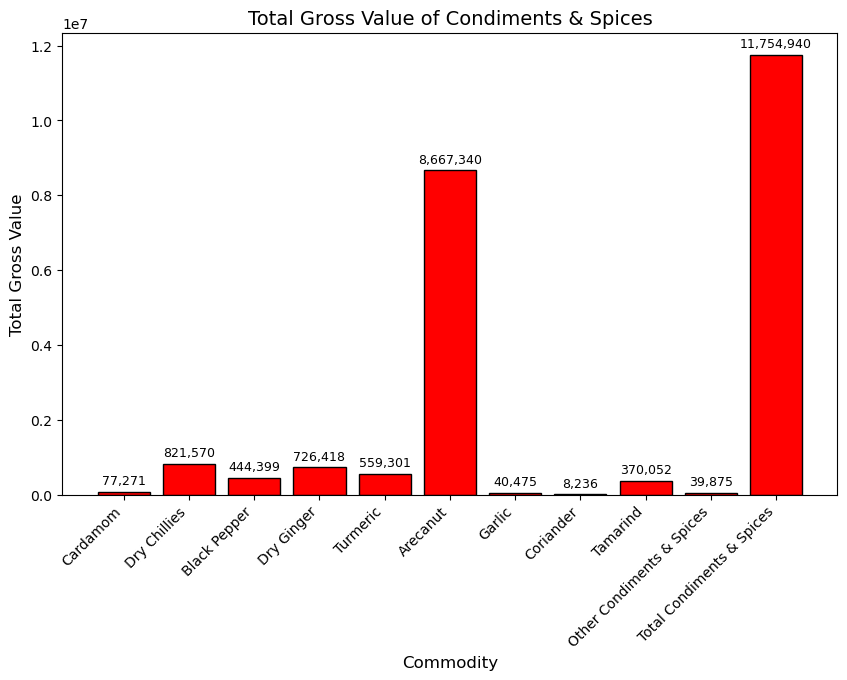

In [195]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Condiments_SpicesGV['Commodity'], Condiments_SpicesGV['Total_Gross_Value'], color='red', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Condiments_SpicesGV['Total_Gross_Value']):
    plt.text(i, value + 0.01 * max(Condiments_SpicesGV['Total_Gross_Value']), f'{value:,}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Gross Value', fontsize=12)
plt.title('Total Gross Value of Condiments & Spices', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()

## Mean Percentage Change of Condiments & Spices

In [196]:
# Calculate the percentage change for each year
Percent_change = Condiments_Spices.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

Condiments_Spices_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
Condiments_Spices_PCT


Overall Trend Direction: Increasing
Mean Percentage Change for Each Commodity:


Commodity   % change
0                    Cardamom  12.017884
1                Dry Chillies   8.318292
2                Black Pepper  40.917128
3                  Dry Ginger  48.984457
4                    Turmeric  23.084039
5                    Arecanut  18.619554
6                      Garlic  43.237694
7                   Coriander  67.087860
8                    Tamarind   0.441566
9   Other Condiments & Spices  87.297125
10  Total Condiments & Spices  16.418954

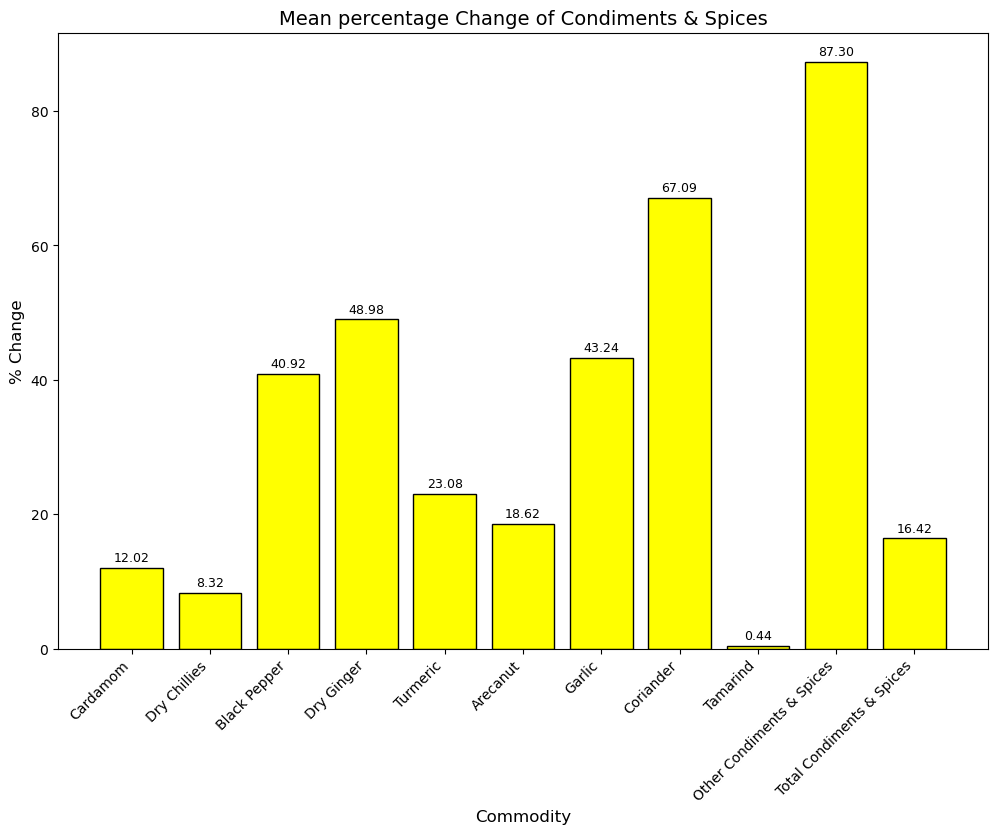

In [197]:
# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.bar(Condiments_Spices_PCT['Commodity'], Condiments_Spices_PCT['% change'], color='yellow', edgecolor='black')

# Adding data labels on top of the bars
for i, value in enumerate(Condiments_Spices_PCT['% change']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.title('Mean percentage Change of Condiments & Spices', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adding grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
#plt.tight_layout()
plt.show()


## GVO Graphical presentation

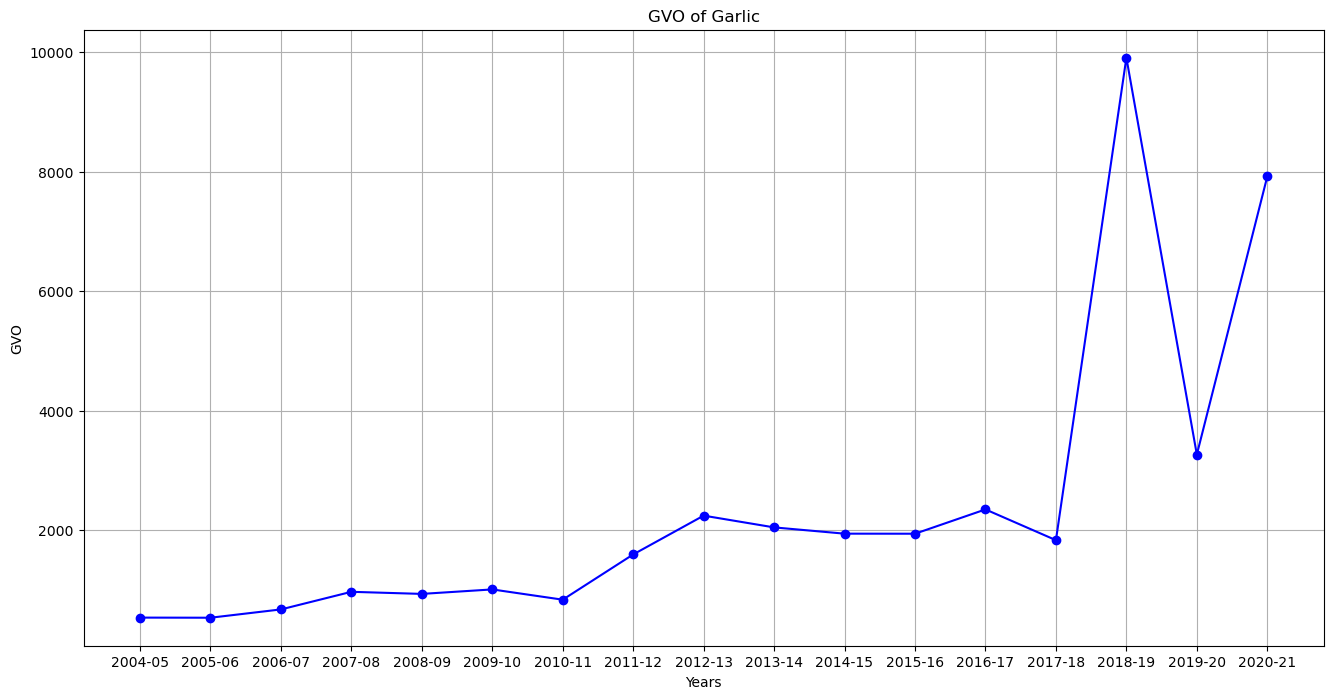

In [198]:
Condiments_Spices = Condiments_Spices.rename(columns={'Commodity': 'Years'})
Condiments_Spices.set_index('Years',inplace =True)
Condiments_Spices=Condiments_Spices.T

plt.figure(figsize=(16,8))
plt.plot(Condiments_Spices.index,Condiments_Spices["Garlic"],marker='o',linestyle='-',color='b')

plt.xlabel('Years')
plt.ylabel('GVO')
plt.title('GVO of Garlic')

plt.grid(True)
plt.show()

In [199]:
Condiments_Spices.columns

Index(['Cardamom', 'Dry Chillies', 'Black Pepper', 'Dry Ginger', 'Turmeric',
       'Arecanut', 'Garlic', 'Coriander', 'Tamarind',
       'Other Condiments & Spices', 'Total Condiments & Spices'],
      dtype='object', name='Years')

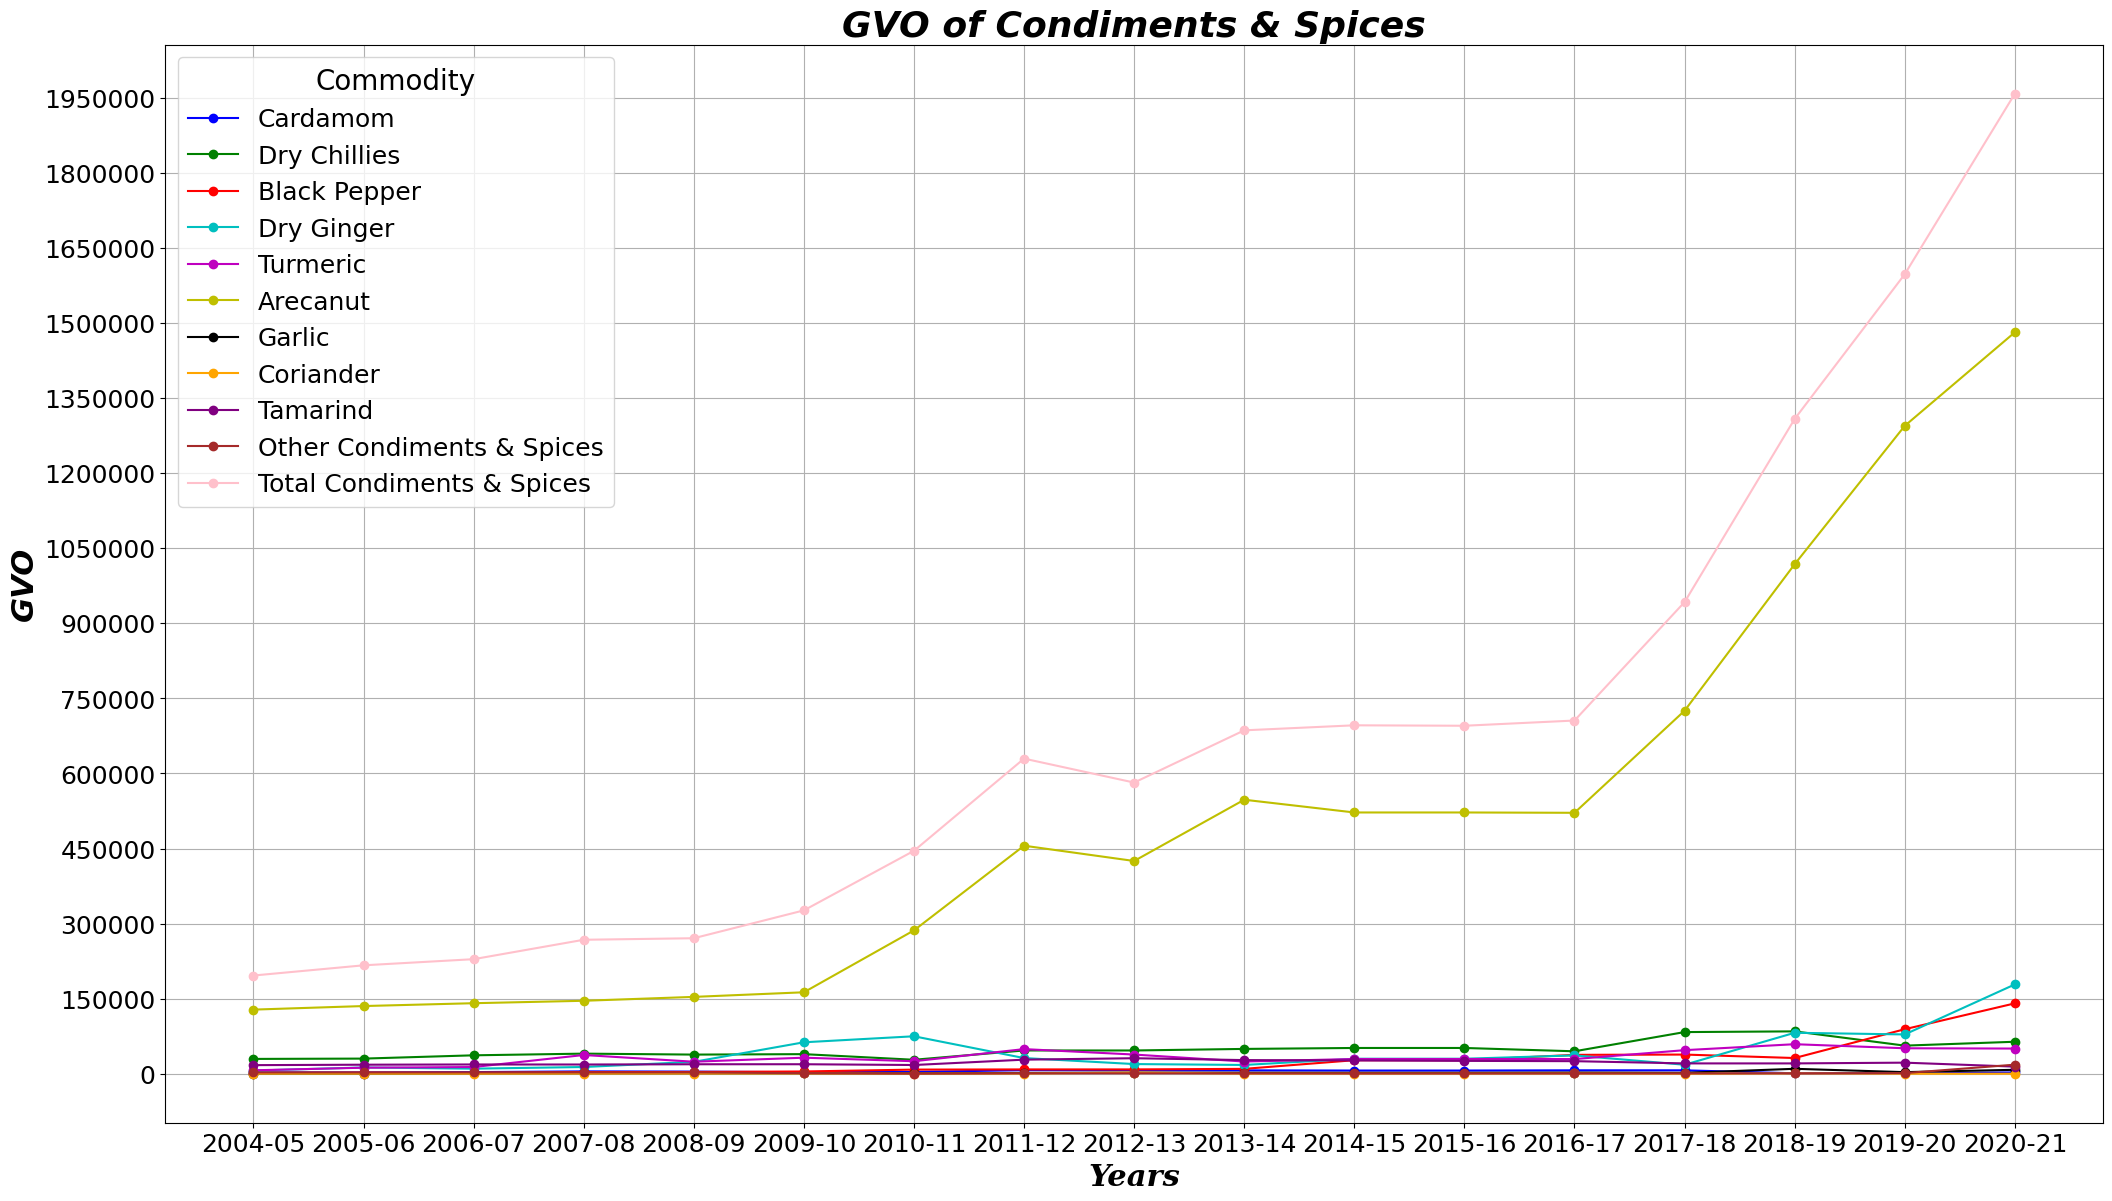

In [200]:
# Your existing plotting code
plt.figure(figsize=(25, 14))

commodities = ['Cardamom', 'Dry Chillies', 'Black Pepper', 'Dry Ginger', 'Turmeric','Arecanut', 'Garlic', 'Coriander', 
               'Tamarind','Other Condiments & Spices', 'Total Condiments & Spices']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','orange', 'purple', 'brown', 'pink']

for commodity, color in zip(commodities, colors):
    plt.plot(Condiments_Spices.index, Condiments_Spices[commodity], marker='o', linestyle='-', color=color, label=commodity)

# Changing x-label and y-label font properties
plt.xlabel('Years', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='serif')
plt.ylabel('GVO', fontsize=22, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.title('GVO of Condiments & Spices', fontsize=26, fontweight='bold', fontstyle='italic')  # Change title font properties
plt.legend(title='Commodity',title_fontsize=20,fontsize=18)  # Display legend with commodity names

# Changing font size of ticks on x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(150000))

# Formatting y-axis ticks to display actual values without decimals
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis values in plain (actual) form

plt.grid(True)
plt.show()

## Growth Rate of Condiments & Spices

In [201]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in Condiments_Spices.columns:
    initial_value = Condiments_Spices[commodity].iloc[0]
    final_value = Condiments_Spices[commodity].iloc[-1]
    t = len(Condiments_Spices.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
    #print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Condiments_Spices_GR = pd.DataFrame(results)

# Display the results DataFrame
#print("\nResults DataFrame:")
print(Condiments_Spices_GR)

                    Commodity Growth Rate
0                    Cardamom      -0.02%
1                Dry Chillies       4.62%
2                Black Pepper      29.21%
3                  Dry Ginger      21.64%
4                    Turmeric      12.38%
5                    Arecanut      15.48%
6                      Garlic      17.22%
7                   Coriander      -3.70%
8                    Tamarind      -1.10%
9   Other Condiments & Spices      12.07%
10  Total Condiments & Spices      14.49%


In [202]:
# Convert 'Growth Rate' to numeric values
Condiments_Spices_GR['Growth Rate'] = Condiments_Spices_GR['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(14, 8))
bars = plt.bar(Condiments_Spices_GR['Commodity'], Condiments_Spices_GR['Growth Rate'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Growth Rate of Condiments & Spices', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

# All Commodities

In [203]:
Cereals=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Cereals.csv")
Pulses=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Pulses.csv")
Oilseeds=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Oilseeds.csv")
Fruits_Vegetables=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Fruits_Vegetables.csv")
Commercial_Crops=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Commercial_Crops.csv")
Condiments_Spices=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Condiments_Spices.csv")



GVO= pd.DataFrame()
GVO=pd.concat([Cereals,Pulses,Oilseeds,Fruits_Vegetables,Commercial_Crops,Condiments_Spices],ignore_index=True)
GVO

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  \
0                       Paddy   347795   375040   341831   363061   377462   
1                       Wheat    19044    20890    20660    25882    23740   
2                       Jowar    90524    98531    75262   111274    98850   
3                       Bajra    16251    23855     9976    20451    11061   
4                       Maize   120898   135218   127269   157838   142439   
..                        ...      ...      ...      ...      ...      ...   
69                     Garlic      532      530      669      964      929   
70                  Coriander      279      262      186      417      490   
71                   Tamarind    17235    18105    18580    18495    18996   
72  Other Condiments & Spices     2619     2652     2697     2697     2697   
73  Total Condiments & Spices   196309   216708   228973   267760   270826   

    2009-10  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0    363836   391652   676718   577894   613768   608189   519077   448047   
1     24358    27715    28537    26467    31051    38591    23066    25347   
2     86364    89676   222671   251126   251507   224199   182369   161576   
3      8003    17786    27497    28189    32739    24530    14363    25287   
4    140926   208842   433419   368698   422757   447105   351191   351646   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69     1004      832     1590     2240     2043     1938     1937     2344   
70      599      301      444     2408      247      442      443      581   
71    19046    17499    28196    31061    27326    26685    25759    25170   
72     1165      344      790      839      732      541      550      580   
73   326505   445544   629740   581874   686242   696296   695397   705824   

    2017-18  2018-19  2019-20  2020-21  
0    518958   589561   624739   736826  
1     34045    24191    26570    38750  
2    217768   170285   188484   172547  
3     28357    17445    36308    27250  
4    408862   398693   451776   568922  
..      ...      ...      ...      ...  
69     1829     9910     3263     7921  
70      114      786       90      147  
71    20707    20707    22195    14290  
72      700      819     1277    18176  
73   942537  1308460  1597618  1958327  

[74 rows x 18 columns]

# GVO csv file

In [204]:
#GVO.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\GVO2004_21.csv",index=False)
GVO=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\GVO2004_21.csv")
GVO

Commodity  2004-05  2005-06  2006-07  2007-08  2008-09  \
0                       Paddy   347795   375040   341831   363061   377462   
1                       Wheat    19044    20890    20660    25882    23740   
2                       Jowar    90524    98531    75262   111274    98850   
3                       Bajra    16251    23855     9976    20451    11061   
4                       Maize   120898   135218   127269   157838   142439   
..                        ...      ...      ...      ...      ...      ...   
69                     Garlic      532      530      669      964      929   
70                  Coriander      279      262      186      417      490   
71                   Tamarind    17235    18105    18580    18495    18996   
72  Other Condiments & Spices     2619     2652     2697     2697     2697   
73  Total Condiments & Spices   196309   216708   228973   267760   270826   

    2009-10  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0    363836   391652   676718   577894   613768   608189   519077   448047   
1     24358    27715    28537    26467    31051    38591    23066    25347   
2     86364    89676   222671   251126   251507   224199   182369   161576   
3      8003    17786    27497    28189    32739    24530    14363    25287   
4    140926   208842   433419   368698   422757   447105   351191   351646   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69     1004      832     1590     2240     2043     1938     1937     2344   
70      599      301      444     2408      247      442      443      581   
71    19046    17499    28196    31061    27326    26685    25759    25170   
72     1165      344      790      839      732      541      550      580   
73   326505   445544   629740   581874   686242   696296   695397   705824   

    2017-18  2018-19  2019-20  2020-21  
0    518958   589561   624739   736826  
1     34045    24191    26570    38750  
2    217768   170285   188484   172547  
3     28357    17445    36308    27250  
4    408862   398693   451776   568922  
..      ...      ...      ...      ...  
69     1829     9910     3263     7921  
70      114      786       90      147  
71    20707    20707    22195    14290  
72      700      819     1277    18176  
73   942537  1308460  1597618  1958327  

[74 rows x 18 columns]

In [205]:
GVO.shape

(74, 18)

In [206]:
GVO.columns

Index(['Commodity', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'],
      dtype='object')

# Gross Value

In [207]:
Gross_value=pd.DataFrame()

# Create CerealsGV DataFrame with 'Commodity' and 'Gross_value' columns
Gross_value = GVO[['Commodity']].copy()
Gross_value['Total_Gross_Value'] = GVO.iloc[:, 1:].sum(axis=1)
Gross_value

Commodity  Total_Gross_Value
0                       Paddy            8474454
1                       Wheat             458904
2                       Jowar            2693013
3                       Bajra             369348
4                       Maize            5236499
..                        ...                ...
69                     Garlic              40475
70                  Coriander               8236
71                   Tamarind             370052
72  Other Condiments & Spices              39875
73  Total Condiments & Spices           11754940

[74 rows x 2 columns]

# Percentage Change

In [208]:
# Calculate the percentage change for each year
Percent_change = GVO.set_index('Commodity').pct_change(axis=1) * 100

# Calculate the mean percentage change for each commodity
mean_percentage = Percent_change.mean(axis=1)

# Determine the overall trend direction
overall_trend_direction = "Increasing" if mean_percentage.mean() > 0 else "Decreasing" if mean_percentage.mean() < 0 else "No Clear Trend"

# Create a DataFrame for the mean percentage change
GVO_PCT = pd.DataFrame({'Commodity': mean_percentage.index, '% change': mean_percentage.values})

# Display the result in table format
#print(result_df.to_markdown(index=False))  # Use to_markdown for a nice table forma
#print("\nOverall Trend Direction:", overall_trend_direction)
print("Mean Percentage Change for Each Commodity:")
GVO_PCT

Mean Percentage Change for Each Commodity:


Commodity   % change
0                       Paddy   6.354748
1                       Wheat   6.874894
2                       Jowar   9.290093
3                       Bajra  17.620329
4                       Maize  13.255510
..                        ...        ...
69                     Garlic  43.237694
70                  Coriander  67.087860
71                   Tamarind   0.441566
72  Other Condiments & Spices  87.297125
73  Total Condiments & Spices  16.418954

[74 rows x 2 columns]

# Growth rate 

In [209]:
GVO = GVO.rename(columns={'Commodity': 'Years'})
GVO.set_index('Years',inplace =True)
GVO=GVO.T
GVO

Years     Paddy  Wheat   Jowar  Bajra   Maize    Ragi  Small Millets  \
2004-05  347795  19044   90524  16251  120898   77359           1194   
2005-06  375040  20890   98531  23855  135218   79387           1038   
2006-07  341831  20660   75262   9976  127269   31873            853   
2007-08  363061  25882  111274  20451  157838   65568            681   
2008-09  377462  23740   98850  11061  142439   59098            595   
2009-10  363836  24358   86364   8003  140926   57343            507   
2010-11  391652  27715   89676  17786  208842   71007            461   
2011-12  676718  28537  222671  27497  433419  120369           1064   
2012-13  577894  26467  251126  28189  368698   92264           1009   
2013-14  613768  31051  251507  32739  422757  111691           1172   
2014-15  608189  38591  224199  24530  447105  122934           1063   
2015-16  519077  23066  182369  14363  351191  112420            885   
2016-17  448047  25347  161576  25287  351646   81284            594   
2017-18  518958  34045  217768  28357  408862  121697           2307   
2018-19  589561  24191  170285  17445  398693   64113           1471   
2019-20  624739  26570  188484  36308  451776  110155           3264   
2020-21  736826  38750  172547  27250  568922  129627           1723   

Years    Other Cereals  Total Cereals    Gram  ...  Dry Chillies  \
2004-05             95         673159   35650  ...         29674   
2005-06             70         734028   36731  ...         30308   
2006-07             49         607773   46061  ...         36872   
2007-08              1         744755   56241  ...         40233   
2008-09              1         713246   61263  ...         38319   
2009-10             20         681359   85959  ...         39201   
2010-11             22         807161   93689  ...         27995   
2011-12             64        1510339  127314  ...         46562   
2012-13             60        1345707  169444  ...         46546   
2013-14            419        1465103  194738  ...         49658   
2014-15            177        1466788  183502  ...         51543   
2015-16            149        1203521  180129  ...         51544   
2016-17            141        1093923  161012  ...         44910   
2017-18            165        1332159  212970  ...         83294   
2018-19            157        1265916  156241  ...         84723   
2019-20            177        1441473  183763  ...         56220   
2020-21            186        1675831  121201  ...         63968   

Years    Black Pepper  Dry Ginger  Turmeric  Arecanut  Garlic  Coriander  \
2004-05          1803        6391      6923    128187     532        279   
2005-06          2124       12588     12103    135318     530        262   
2006-07          1965       10202     13482    140999     669        186   
2007-08          3332       13515     37489    145847     964        417   
2008-09          3563       23790     24071    153625     929        490   
2009-10          4585       62905     32116    162827    1004        599   
2010-11          8330       74919     25054    286530     832        301   
2011-12          8681       31373     49265    455715    1590        444   
2012-13          8685       19395     38415    425174    2240       2408   
2013-14          9809       17584     24438    547579    2043        247   
2014-15         27096       30010     29494    522115    1938        442   
2015-16         27100       30012     29495    522121    1937        443   
2016-17         37805       36689     29384    521475    2344        581   
2017-18         38375       18034     47160    725437    1829        114   
2018-19         31450       81898     59071   1018153    9910        786   
2019-20         89008       78576     50964   1294670    3263         90   
2020-21        140688      178537     50377   1481568    7921        147   

Years    Tamarind  Other Condiments & Spices  Total Condiments & Spices  
2004-05     17235                  

In [210]:
# Function to calculate compound growth rate
def compound_growth_rate(initial_value, final_value, t):
    return ((final_value / initial_value) ** (1 / t)) - 1

# Create a list to store results
results = []

# Calculate and store growth rates
for commodity in GVO.columns:
    initial_value = GVO[commodity].iloc[0]
    final_value = GVO[commodity].iloc[-1]
    t = len(GVO.index) 
    
    growth_rate = ((final_value / initial_value) ** (1 / t)) - 1
    #growth_rate = compound_growth_rate(initial_value, final_value, t)
    
    formatted_growth_rate = f"{growth_rate * 100:.2f}%"
    
    # Print the result
   # print(f"Compound Growth Rate for {commodity}: {formatted_growth_rate}%")
    
    # Store the result in the list
    results.append({'Commodity': commodity, 'Growth Rate': formatted_growth_rate})

# Create a DataFrame from the list of results
Growth_rate = pd.DataFrame(results)

# Display the results DataFrame
Growth_rate

Commodity Growth Rate
0                       Paddy       4.52%
1                       Wheat       4.27%
2                       Jowar       3.87%
3                       Bajra       3.09%
4                       Maize       9.54%
..                        ...         ...
69                     Garlic      17.22%
70                  Coriander      -3.70%
71                   Tamarind      -1.10%
72  Other Condiments & Spices      12.07%
73  Total Condiments & Spices      14.49%

[74 rows x 2 columns]

In [211]:
top = pd.DataFrame(Growth_rate)

# Sort the DataFrame in descending order based on a specific column (e.g., 'Age')
top.sort_values(by='Growth Rate', ascending=False, inplace=True)
# Extract the top 10 rows
top_10 = top.head(10)
top_10

Commodity Growth Rate
4                         Maize       9.54%
34                        Lemon       8.54%
58                       Coffee       8.09%
20                      Coconut       8.08%
28                       Banana       7.60%
9                          Gram       7.46%
42                      Tapoica       7.20%
36                    Pineapple       6.62%
53  Total Fruits and Vegetables       6.60%
8                 Total Cereals       5.51%

C:\Users\Anusha\AppData\Local\Temp\ipykernel_13688\448000333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Growth Rate'] = top_10['Growth Rate'].str.rstrip('%').astype('float') / 100.0


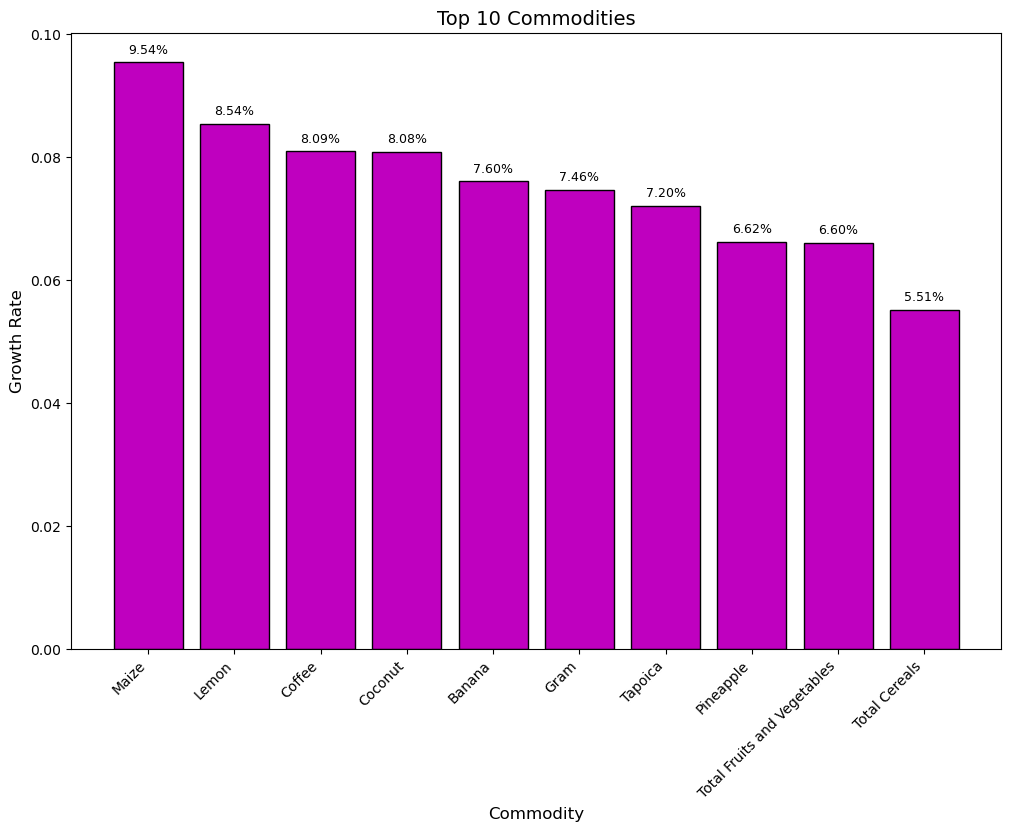

In [212]:
# Convert 'Growth Rate' to numeric values
top_10['Growth Rate'] = top_10['Growth Rate'].str.rstrip('%').astype('float') / 100.0

# Plotting the bar graph with better styling
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10['Commodity'], top_10['Growth Rate'], color='m', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.title('Top 10 Commodities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better visibility
plt.yticks(fontsize=10)


# Display the plot
#plt.tight_layout()
plt.show()

# Gross Value, Percentage change and Growth rate in one DATFRAME

Growth_rate,GVO_PCT,Gross_value

In [213]:
Analysis=pd.merge(Growth_rate,GVO_PCT,on="Commodity",how= "outer")
Analysis=pd.merge(Analysis,Gross_value,on="Commodity",how= "outer")
Analysis

Commodity Growth Rate   % change  Total_Gross_Value
0                       Paddy       4.52%   6.354748            8474454
1                       Wheat       4.27%   6.874894             458904
2                       Jowar       3.87%   9.290093            2693013
3                       Bajra       3.09%  17.620329             369348
4                       Maize       9.54%  13.255510            5236499
..                        ...         ...        ...                ...
69                     Garlic      17.22%  43.237694              40475
70                  Coriander      -3.70%  67.087860               8236
71                   Tamarind      -1.10%   0.441566             370052
72  Other Condiments & Spices      12.07%  87.297125              39875
73  Total Condiments & Spices      14.49%  16.418954           11754940

[74 rows x 4 columns]

In [7]:
#Analysis.to_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\ANALYSIS.csv",index=False)
Analysis=pd.read_csv("C:\\Users\\Anusha\\Desktop\\MBAFB(MBAK2202)\\SEMINAR 2\\Analysis.csv")
#Analysis

In [8]:
Analysis.replace([np.inf],np.nan,inplace=True)

In [9]:
Analysis['% change'].describe()

count     72.000000
mean      18.436603
std       24.639800
min       -4.873259
25%        6.340803
50%       11.715607
75%       20.635776
max      155.610559
Name: % change, dtype: float64

In [10]:
import statistics
PercentChangeMode = statistics.mode(Analysis['% change'])
print(f'% change mode:{PercentChangeMode}')

% change mode:6.354747974758736


In [11]:
Max=Analysis['Growth Rate'].max()
Min=Analysis['Growth Rate'].min()
GRMode = statistics.mode(Analysis['Growth Rate'])
print(f"Maximum:{Max} \n" 
      f"Minimun:{Min} \n"
      f"Growth Rate Mode:{GRMode}\n")

Maximum:9.54% 
Minimun:-0.02% 
Growth Rate Mode:3.45%



In [12]:
Max=Analysis['Total_Gross_Value'].max()
Min=Analysis['Total_Gross_Value'].min()
GrossValueMean=Analysis['Total_Gross_Value'].mean()
GVMode = statistics.mode(Analysis['Total_Gross_Value'])
print(f"Maximum:{Max} \n" 
      f"Minimun:{Min} \n"
      f"Mean:{GrossValueMean} \n"
      f"Gross Value Mode:{GVMode}\n")

Maximum:24488823 
Minimun:1953 
Mean:2018364.5 
Gross Value Mode:8474454



# Trend analysis

In [36]:
# Creating a new column 'Trend' based on the specified criteria
for index, row in Analysis.iterrows():
    if(row['% change'] > 0):
        Analysis.at[index, 'Trend'] = 'Increasing'
    else:
        Analysis.at[index, 'Trend'] = 'Decreasing'

# Displaying the modified DataFrame
Analysis

Commodity Growth Rate   % change  Total_Gross_Value  \
0                       Paddy       4.52%   6.354748            8474454   
1                       Wheat       4.27%   6.874894             458904   
2                       Jowar       3.87%   9.290093            2693013   
3                       Bajra       3.09%  17.620329             369348   
4                       Maize       9.54%  13.255510            5236499   
..                        ...         ...        ...                ...   
69                     Garlic      17.22%  43.237694              40475   
70                  Coriander      -3.70%  67.087860               8236   
71                   Tamarind      -1.10%   0.441566             370052   
72  Other Condiments & Spices      12.07%  87.297125              39875   
73  Total Condiments & Spices      14.49%  16.418954           11754940   

         Trend       Crop_Value  
0   Increasing  High value crop  
1   Increasing   Low value crop  
2   Increasing  High value crop  
3   Increasing   Low value crop  
4   Increasing  High value crop  
..         ...              ...  
69  Increasing   Low value crop  
70  Increasing   Low value crop  
71  Increasing   Low value crop  
72  Increasing   Low value crop  
73  Increasing  High value crop  

[74 rows x 6 columns]

In [37]:
Increasing= Analysis[Analysis['Trend'] == 'Increasing'][['Commodity']]

Increasing.count()

Commodity    66
dtype: int64

In [38]:
Decreasing= Analysis[Analysis['Trend'] == 'Decreasing'][['Commodity']]

Decreasing.count()

Commodity    8
dtype: int64

# Crop classification

In [39]:
for index, row in Analysis.iterrows():
    if row['Total_Gross_Value'] < GrossValueMean:
        Analysis.at[index, 'Crop_Value'] = 'Low value crop'
    else:
        Analysis.at[index, 'Crop_Value'] = 'High value crop'
        
Analysis        

Commodity Growth Rate   % change  Total_Gross_Value  \
0                       Paddy       4.52%   6.354748            8474454   
1                       Wheat       4.27%   6.874894             458904   
2                       Jowar       3.87%   9.290093            2693013   
3                       Bajra       3.09%  17.620329             369348   
4                       Maize       9.54%  13.255510            5236499   
..                        ...         ...        ...                ...   
69                     Garlic      17.22%  43.237694              40475   
70                  Coriander      -3.70%  67.087860               8236   
71                   Tamarind      -1.10%   0.441566             370052   
72  Other Condiments & Spices      12.07%  87.297125              39875   
73  Total Condiments & Spices      14.49%  16.418954           11754940   

         Trend       Crop_Value  
0   Increasing  High value crop  
1   Increasing   Low value crop  
2   Increasing  High value crop  
3   Increasing   Low value crop  
4   Increasing  High value crop  
..         ...              ...  
69  Increasing   Low value crop  
70  Increasing   Low value crop  
71  Increasing   Low value crop  
72  Increasing   Low value crop  
73  Increasing  High value crop  

[74 rows x 6 columns]

In [40]:
HVC= Analysis[Analysis['Crop_Value'] == 'High value crop'][['Commodity']]

HVC.count()

Commodity    19
dtype: int64

In [41]:
HVC

Commodity
0                         Paddy
2                         Jowar
4                         Maize
8                 Total Cereals
9                          Gram
10                     Red Gram
15                 Total Pulses
20                      Coconut
26               Total Oilseeds
27                    Groundnut
28                       Banana
30                        Mango
48                       Tomato
53  Total Fruits and Vegetables
54                    Sugarcane
56                       Cotton
58                       Coffee
68                     Arecanut
73    Total Condiments & Spices

In [42]:
LVC= Analysis[Analysis['Crop_Value'] == 'Low value crop'][['Commodity']]

LVC.count()

Commodity    55
dtype: int64

In [43]:
LVC

Commodity
1                       Wheat
3                       Bajra
5                        Ragi
6               Small Millets
7               Other Cereals
11                        Urd
12                      Moong
13                 Horse Gram
14               Other Pulses
16                    Linseed
17                    Sesamum
18         Rapeseed & Mustard
19                     Castor
21                  Nigerseed
22                  Safflower
23                  Sunflower
24                   Soyabean
25             Other Oilseeds
29                  Cashewnut
31                     Grapes
32                     Papaya
33                    Mosambi
34                      Lemon
35                     Orange
36                  Pineapple
37                     Sapota
38                  Jackfruit
39                      Guava
40                     Potato
41               Sweet Potato
42                    Tapoica
43                      Onion
44                    Brinjal
45                    Cabbage
46                Cauliflower
47                       Okra
49                 Green Peas
50         Other Citrus Fruit
51               Other Fruits
52           Other Vegetables
55                        Gur
57                        Tea
59                    Tobacco
60                      Cocoa
61                     Rubber
62                   Mulberry
63                   Cardamom
64               Dry Chillies
65               Black Pepper
66                 Dry Ginger
67                   Turmeric
69                     Garlic
70                  Coriander
71                   Tamarind
72  Other Condiments & Spices

# LVC Decreasing trend 

In [44]:
# Assuming 'Analysis' is your DataFrame
LVCD = Analysis[(Analysis['Crop_Value'] == 'Low value crop') & (Analysis['Trend'] == 'Decreasing')]

LVCD.count()


Commodity            8
Growth Rate          8
% change             6
Total_Gross_Value    8
Trend                8
Crop_Value           8
dtype: int64

In [45]:
LVCD

Commodity Growth Rate  % change  Total_Gross_Value       Trend  \
16             Linseed      -7.53% -4.873259               8856  Decreasing   
18  Rapeseed & Mustard     -15.12%       NaN               4755  Decreasing   
21           Nigerseed     -12.86% -0.463666              18011  Decreasing   
23           Sunflower      -5.09% -0.972742             904833  Decreasing   
37              Sapota      -4.75% -3.474233             649208  Decreasing   
38           Jackfruit      -6.35% -3.809701             251643  Decreasing   
39               Guava      -2.86% -1.667018             273391  Decreasing   
55                 Gur    -100.00%       NaN             284990  Decreasing   

        Crop_Value  
16  Low value crop  
18  Low value crop  
21  Low value crop  
23  Low value crop  
37  Low value crop  
38  Low value crop  
39  Low value crop  
55  Low value crop

# LVC Increasing trend

In [46]:
# Assuming 'Analysis' is your DataFrame
LVCI = Analysis[(Analysis['Crop_Value'] == 'Low value crop') & (Analysis['Trend'] == 'Increasing')]

LVCI.count()


Commodity            47
Growth Rate          47
% change             47
Total_Gross_Value    47
Trend                47
Crop_Value           47
dtype: int64

In [47]:
LVCI

Commodity Growth Rate    % change  Total_Gross_Value  \
1                       Wheat       4.27%    6.874894             458904   
3                       Bajra       3.09%   17.620329             369348   
5                        Ragi       3.08%   12.025691            1508189   
6               Small Millets       2.18%   20.133867              19881   
7               Other Cereals       4.03%  155.610559               1953   
11                        Urd      12.91%   38.379516             193445   
12                      Moong      10.00%   26.589830             458621   
13                 Horse Gram       2.06%   32.944585             179538   
14               Other Pulses       4.72%   12.274494             278002   
17                    Sesamum      -3.39%    1.630011             180788   
19                     Castor      -4.53%    6.832343              35844   
22                  Safflower      -0.75%    7.867757             126392   
24                   Soyabean      10.33%   15.996132             680748   
25             Other Oilseeds      -1.45%   90.456930               1995   
29                  Cashewnut      19.73%   44.225645             505234   
31                     Grapes      11.00%   12.181087            1060238   
32                     Papaya       3.95%    4.822990             409638   
33                    Mosambi       1.21%    6.298967             146529   
34                      Lemon       8.54%   11.413330             516069   
35                     Orange      14.86%   19.604508             179396   
36                  Pineapple       6.62%    8.517869             263488   
40                     Potato       2.69%    9.678017             308962   
41               Sweet Potato      10.09%   22.141505              31247   
42                    Tapoica       7.20%   10.207961               6908   
43                      Onion      12.64%   23.509127            1506755   
44                    Brinjal       2.22%    5.252796             442479   
45                    Cabbage       4.79%   10.020326             175610   
46                Cauliflower       2.57%    3.376698             124309   
47                       Okra       3.64%    6.081548             144617   
49                 Green Peas      10.31%   14.165063             113999   
50         Other Citrus Fruit       1.98%   48.936308              12946   
51               Other Fruits      -7.74%    2.727345             254390   
52           Other Vegetables       3.45%    7.384319            1610317   
57                        Tea       3.45%    5.421489              28025   
59                    Tobacco      -1.43%    4.780003             847499   
60                      Cocoa      -0.90%   19.389850              13721   
61                     Rubber      14.26%   23.744161             706932   
62                   Mulberry       2.86%    3.688315              74113   
63                   Cardamom      -0.02%   12.017884              77271   
64               Dry Chillies       4.62%    8.318292             821570   
65               Black Pepper      29.21%   40.917128             444399   
66                 Dry Ginger      21.64%   48.984457             726418   
67                   Turmeric      12.38%   23.084039             559301   
69                     Garlic      17.22%   43.237694              40475   
70                  Coriander      -3.70%   67.087860               8236   
71                   Tamarind      -1.10%    0.441566             370052   
72  Other Condiments & Spices      12.07%   87.297125              39875   

         Trend      Crop_Value  
1   Increasing  Low value crop  
3   Increasing  Low value crop  
5   Increasing  Low value crop  
6   Increasing  Low value crop  
7   Increasing  Low value crop  
11  Increasing  Low value crop  
12  Increasing  Low value crop  
13  Increasing  Low value crop  
14  Increasing  Low value crop  
17  Increasing  Low value crop  
19  Incr

# HVC Increasing Trend

In [48]:
# Assuming 'Analysis' is your DataFrame
HVCI = Analysis[(Analysis['Crop_Value'] == 'High value crop') & (Analysis['Trend'] == 'Increasing')]

HVCI.count()


Commodity            19
Growth Rate          19
% change             19
Total_Gross_Value    19
Trend                19
Crop_Value           19
dtype: int64

In [49]:
HVCI

Commodity Growth Rate   % change  Total_Gross_Value  \
0                         Paddy       4.52%   6.354748            8474454   
2                         Jowar       3.87%   9.290093            2693013   
4                         Maize       9.54%  13.255510            5236499   
8                 Total Cereals       5.51%   8.076468           18762241   
9                          Gram       7.46%  10.228670            2105908   
10                     Red Gram      14.13%  30.027485            2727770   
15                 Total Pulses      10.95%  14.574666            5943280   
20                      Coconut       8.08%   9.960819            3215576   
26               Total Oilseeds       4.58%   6.383100            7402478   
27                    Groundnut       4.42%  12.038435            2224680   
28                       Banana       7.60%  16.011114            2594659   
30                        Mango       0.39%   0.926604            3601501   
48                       Tomato       5.40%   6.940946            2092663   
53  Total Fruits and Vegetables       6.60%   7.241583           24488823   
54                    Sugarcane      10.41%  14.278810            7473242   
56                       Cotton      13.24%  22.415675            3739272   
58                       Coffee       8.09%  15.460618            6700281   
68                     Arecanut      15.48%  18.619554            8667340   
73    Total Condiments & Spices      14.49%  16.418954           11754940   

         Trend       Crop_Value  
0   Increasing  High value crop  
2   Increasing  High value crop  
4   Increasing  High value crop  
8   Increasing  High value crop  
9   Increasing  High value crop  
10  Increasing  High value crop  
15  Increasing  High value crop  
20  Increasing  High value crop  
26  Increasing  High value crop  
27  Increasing  High value crop  
28  Increasing  High value crop  
30  Increasing  High value crop  
48  Increasing  High value crop  
53  Increasing  High value crop  
54  Increasing  High value crop  
56  Increasing  High value crop  
58  Increasing  High value crop  
68  Increasing  High value crop  
73  Increasing  High value crop

# HVC Decreasing trend

In [50]:
# Assuming 'Analysis' is your DataFrame
HVCD = Analysis[(Analysis['Crop_Value'] == 'High value crop') & (Analysis['Trend'] == 'Decreasing')]

HVCD.count()



Commodity            0
Growth Rate          0
% change             0
Total_Gross_Value    0
Trend                0
Crop_Value           0
dtype: int64

In [51]:
HVCD

Empty DataFrame
Columns: [Commodity, Growth Rate, % change, Total_Gross_Value, Trend, Crop_Value]
Index: []

# Matrix 

In [53]:
# Assuming 'Analysis' is your DataFrame
# Creating a contingency table
confusion_matrix = pd.crosstab(Analysis['Trend'], Analysis['Crop_Value'], margins=True, margins_name='Total')

# Extracting the confusion matrix without the 'Total' row and column
confusion_matrix_subset = confusion_matrix.iloc[:-1, :-1]

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix_subset, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Matrix')
plt.show()

